In [1]:
#%%appyter init
from appyter import magic
magic.init(lambda _=globals: _())

In [2]:
%%appyter hide_code

{% do SectionField(
    name='primary',
    title='Upload Tumor Expression',
    img='upload.png'
) %}


{% set rna_file = CustomFileField(
    name='rna_expr',
    label='RNA-seq expression',
    description='''
    File should be a tsv/csv of the form:

        Patient 1 Tumor    Patient 2 Tumor       ...
    -------------------------------------------------
    Gene 1    0                      200                     ...
    -------------------------------------------------
    Gene 2    5                      180                     ...
    -------------------------------------------------
      ...           ...                      ...                       ...
    ''',
    default='CPTAC3_HNSCC_tumor_counts.tsv',
    required=False,
    examples={
        'CPTAC3_HNSCC_tumor_counts.tsv': 'https://minio.dev.maayanlab.cloud/x2k-tr/CPTAC3_HNSCC_tumor_counts.tsv',
    },
    section='primary',
) %}


{% set prot_file = CustomFileField(
    name='prot_expr',
    label='protein expression',
    description='''
    File should be a tsv/csv of the form:

        Patient 1 Tumor    Patient 2 Tumor        ...
    -------------------------------------------------
    Gene/Protein 1    0                      200         ...
    -------------------------------------------------
    Gene/Protein 2    5                      180         ...
    -------------------------------------------------
            ...                 ...                       ...           ...
    ''',
    default='HNSCC_proteomics_tumor.tsv',
    required=False,
    examples={
        'HNSCC_proteomics_tumor.tsv': 'https://minio.dev.maayanlab.cloud/x2k-tr/HNSCC_proteomics_gene_abundance_log2_reference_intensity_normalized_Tumor.tsv',
    },
    section='primary',
) %}

{% set phospho_file = CustomFileField(
    name='phospho_expr',
    label='protein phosphorylation',
    description='''
    File should be a tsv/csv of the form:

        Patient 1 Tumor    Patient 2 Tumor             ...
    -------------------------------------------------
    Phosphoprotein 1    0                      200         ...
    -------------------------------------------------
    Phosphoprotein 2    5                      180         ...
    -------------------------------------------------
                ...                 ...                       ...           ...
    ''',
    default='HNSCC_phospho_observed.tsv',
    required=False,
    examples={
        'HNSCC_phospho_observed.tsv': 'https://minio.dev.maayanlab.cloud/x2k-tr/HNSCC_phospho_site_abundance_tumor.tsv',
    },
    section='primary',
) %}

{% set meta_file = CustomFileField(
    name='meta',
    label='sample metadata',
    description='Samples on the rows, metadata on the columns',
    default='HNSCC_meta.txt',
    required=True,
    examples={
        'HNSCC_meta.txt': 'https://minio.dev.maayanlab.cloud/x2k-tr/HNSCC_meta.txt',
    },
    section='primary',
) %}

{% set membrane_screener_ = BoolField(
    name='membrane_screener',
    label='Prioritize membrane genes',
    description='Use a list of genes that encode cell surface proteins to identify targets that might be suitable for immunotherapy.',
    default=True,
    section='primary',
) %}

{% set normalize_to_bg = BoolField(
    name='normalize_to_bg',
    label='Normalize to background',
    description='Normalize the uploaded RNA-seq expression values to the background expression values for target identification through differential gene expression analysis',
    default=True,
    section='primary',
) %}

{% set impute_protein_expr = BoolField(
    name='impute_protein_expr',
    label='Impute protein expression',
    description='Impute missing protein expression values with average of non-missing values in rows with at least 80% non-missing values',
    default=True,
    section='primary',
) %}

{% set impute_phospho_expr = BoolField(
    name='impute_phospho_expr',
    label='Impute protein phosphorylation',
    description='Impute missing protein phosphorylation values with average of non-missing values in rows with at least 80% non-missing values',
    default=True,
    section='primary',
) %}



{% set membrane_screener_list = 'https://appyters.maayanlab.cloud/storage/Tumor_Gene_Target_Screener/surfaceome.csv' %}

{% set membrane_screener = membrane_screener_.raw_value == 'Yes' %}


In [63]:
%%appyter markdown

## Abstract
In its third phase, the Clinical Proteomic Tumor Analysis Consortium (CPTAC) program collected pan-cancer data from 1,020 patients profiling the transcriptome, proteome, and phospho-proteome of tumors and adjacent tissues from ten cancer types. To identify driver cell signaling pathways and potential immunotherapeutic candidates from this CPTAC cohort, we applied the eXpression to Kinases (X2K) and TargetRanger algorithms. For each cancer type, tumor samples were first clustered into subtypes based on cell signaling profiles inferred from RNA-seq data with X2K, and then cell surface targets were prioritized for each cluster. These targets were subsequently confirmed for high protein expression in the tumor subtypes. For each cancer type, the computational pipeline identified key protein kinases and cell surface proteins that may serve as personalized targets. Many of these targets are also robustly differentially expressed at the proteome level. Altogether, this rational approach to identify key cell signaling pathways and potential targets demonstrates a pipeline that can be applied for personalized cancer diagnosis and therapeutic development.

## Summary
A major goal in cancer research is to identify tumor-specific proteins that are targetable with immunotherapies such as targeted therapies, antibody drug conjugates (ADCs), and chimeric antigen receptor (CAR) T-cells. Here we present a computational pipeline that identifies proteins, genes, and transcripts that are highly expressed in tumors compared to most healthy tissues and cell types while prioritizing cell-surface proteins and protein kinases. We applied this pipeline to the Clinical Proteomic Tumor Analysis Consortium (CPTAC) cohort of 1,020 pan-cancer tumors profiled with transcriptomics, proteomics, and phosphoproteomics. With this pipeline we identified a multitude of potential targets for each cancer subtype. Some of these targets are supported by prior publications while many others are new and warrant further investigation. Overall, the pipeline is a robust computational approach to harness tumor multi-omic datasets to identify promising immunotherapeutic and other targets for cancer subtypes. 

## Motivation
Finding targets and key to cell signaling pathways that are uniquely activated in tumor cells while absent from all normal tissues and cell types remains a significant challenge. In addition, targets identified from analyzing transcriptomics do not ensure that the targets are also expressed at the protein level. Furthermore, heterogeneity within the tumor, across patients of the same cancer type, and across cancers, underscore the need for subtype-specific personalized target identification. Our analysis and workflows address some of these challenges by combining phosphoproteomics, proteomics, and transcriptomics with comprehensive normal tissue and cell type atlases to identify safer targets for cancer subtypes. 

<img src='https://minio.dev.maayanlab.cloud/x2k-tr/X2KTR_workflows.png' alt="multiomics2paper workflow">



## Abstract
In its third phase, the Clinical Proteomic Tumor Analysis Consortium (CPTAC) program collected pan-cancer data from 1,020 patients profiling the transcriptome, proteome, and phospho-proteome of tumors and adjacent tissues from ten cancer types. To identify driver cell signaling pathways and potential immunotherapeutic candidates from this CPTAC cohort, we applied the eXpression to Kinases (X2K) and TargetRanger algorithms. For each cancer type, tumor samples were first clustered into subtypes based on cell signaling profiles inferred from RNA-seq data with X2K, and then cell surface targets were prioritized for each cluster. These targets were subsequently confirmed for high protein expression in the tumor subtypes. For each cancer type, the computational pipeline identified key protein kinases and cell surface proteins that may serve as personalized targets. Many of these targets are also robustly differentially expressed at the proteome level. Altogether, this rational approach to identify key cell signaling pathways and potential targets demonstrates a pipeline that can be applied for personalized cancer diagnosis and therapeutic development.

## Summary
A major goal in cancer research is to identify tumor-specific proteins that are targetable with immunotherapies such as targeted therapies, antibody drug conjugates (ADCs), and chimeric antigen receptor (CAR) T-cells. Here we present a computational pipeline that identifies proteins, genes, and transcripts that are highly expressed in tumors compared to most healthy tissues and cell types while prioritizing cell-surface proteins and protein kinases. We applied this pipeline to the Clinical Proteomic Tumor Analysis Consortium (CPTAC) cohort of 1,020 pan-cancer tumors profiled with transcriptomics, proteomics, and phosphoproteomics. With this pipeline we identified a multitude of potential targets for each cancer subtype. Some of these targets are supported by prior publications while many others are new and warrant further investigation. Overall, the pipeline is a robust computational approach to harness tumor multi-omic datasets to identify promising immunotherapeutic and other targets for cancer subtypes. 

## Motivation
Finding targets and key to cell signaling pathways that are uniquely activated in tumor cells while absent from all normal tissues and cell types remains a significant challenge. In addition, targets identified from analyzing transcriptomics do not ensure that the targets are also expressed at the protein level. Furthermore, heterogeneity within the tumor, across patients of the same cancer type, and across cancers, underscore the need for subtype-specific personalized target identification. Our analysis and workflows address some of these challenges by combining phosphoproteomics, proteomics, and transcriptomics with comprehensive normal tissue and cell type atlases to identify safer targets for cancer subtypes. 

<img src='https://minio.dev.maayanlab.cloud/x2k-tr/X2KTR_workflows.png' alt="multiomics2paper workflow">

In [3]:
from helpers import *
import os
import re
import qnorm
from tqdm import tqdm
import numpy as np
import pandas as pd
import scanpy as sc

from matplotlib import cm
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

import networkx as nx

from IPython.display import HTML, display, Markdown, FileLink
from matplotlib.gridspec import GridSpec
from matplotlib_venn import venn2
from maayanlab_bioinformatics.normalization import zscore_normalize, log2_normalize
from scipy.stats import zscore
from maayanlab_bioinformatics.dge import limma_voom_differential_expression
from maayanlab_bioinformatics.harmonization.ncbi_genes import ncbi_genes_lookup
from maayanlab_bioinformatics.api import enrichr_link_from_genes

import warnings
warnings.filterwarnings("ignore")

os.makedirs('results', exist_ok=True)
os.makedirs('figures', exist_ok=True)

lookup = ncbi_genes_lookup(organism='Mammalia/Homo_sapiens')
fig_counter = 1
table_counter = 1

import sys
import contextlib
@contextlib.contextmanager
def suppress_output(stdout=True, stderr=True, dest=os.devnull):
    ''' Usage:
    with suppress_output():
        print('hi')
    '''
    dev_null = open(dest, 'a')
    if stdout:
        _stdout = sys.stdout
        sys.stdout = dev_null
    if stderr:
        _stderr = sys.stderr
        sys.stderr = dev_null
    try:
        yield
    finally:
        if stdout:
            sys.stdout = _stdout
        if stderr:
            sys.stderr = _stderr

In [4]:
%%appyter code_exec
has_rna_file = {{ rna_file }} != ''
has_prot_file = {{ prot_file }} != ''
has_phospho_file = {{ phospho_file }} != ''
has_meta_file = {{ meta_file }} != ''

```python
has_rna_file = 'CPTAC3_HNSCC_tumor_counts.tsv' != ''
has_prot_file = 'HNSCC_proteomics_tumor.tsv' != ''
has_phospho_file = 'HNSCC_phospho_observed.tsv' != ''
has_meta_file = 'HNSCC_meta.txt' != ''
```

In [5]:
%%appyter code_exec
if has_rna_file:
    rna_df = read_table({{ rna_file }})
    rna_filename = {{ rna_file }}.split('.')[0]
if has_prot_file:
    prot_df = read_table({{ prot_file }})
    prot_filename = {{ prot_file }}.split('.')[0]
if has_phospho_file:
    phospho_df = read_table({{ phospho_file }})
    phospho_filename = {{ phospho_file }}.split('.')[0]
if has_meta_file:
    meta_df = read_table({{ meta_file }})

```python
if has_rna_file:
    rna_df = read_table('CPTAC3_HNSCC_tumor_counts.tsv')
    rna_filename = 'CPTAC3_HNSCC_tumor_counts.tsv'.split('.')[0]
if has_prot_file:
    prot_df = read_table('HNSCC_proteomics_tumor.tsv')
    prot_filename = 'HNSCC_proteomics_tumor.tsv'.split('.')[0]
if has_phospho_file:
    phospho_df = read_table('HNSCC_phospho_observed.tsv')
    phospho_filename = 'HNSCC_phospho_observed.tsv'.split('.')[0]
if has_meta_file:
    meta_df = read_table('HNSCC_meta.txt')
```

# __TRANSCRIPTOMICS__

### Cluster Samples from RNA-seq Expression for Target Identification

Grouping patients together who share similar vectors of expression may lead to identification of targets specific to smaller subsets of patients. Clustering is performed on the 5000 most variable log2 normalized genes using the leiden community algorithm [1]. Additionally, differentially expressed genes are submitted to Enrichr [2] for identification of biological pathways from Gene Ontology (GO BP) [3] and Wikipathways [4] and phenotypes from Mouse Genome Informatics (MGI) [5]. Consensus labels are then determined using OpenAI's GPT-4 model and the significantly enriched terms for each cluster.

In [6]:
if has_rna_file:
    rna_df.index = rna_df.index.map(lambda g: g.split('.')[0])
    rna_df.index = rna_df.index.map(lambda g: lookup(g) if lookup(g) else g)

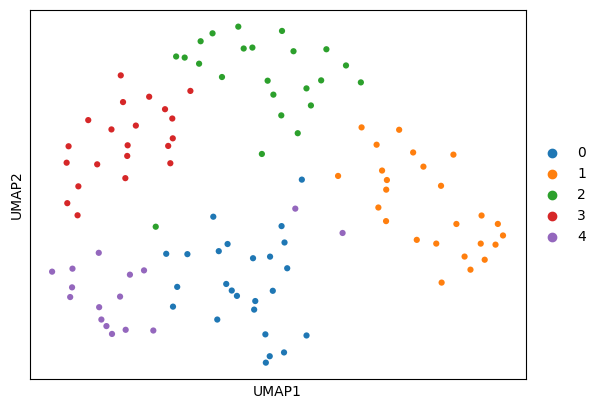

__Figure 36.__ Consensus labels created using GPT-4 and significantly enriched terms for differentially expressed genes from leiden clusters. determined from log2 RNA-seq expression for 5000 most variable genes.

/Users/giacomomarino/X2KTR/figures/CPTAC3_HNSCC_tumor_counts_umap_leiden.png

/Users/giacomomarino/X2KTR/figures/CPTAC3_HNSCC_tumor_counts_umap_leiden.svg

<Figure size 640x480 with 0 Axes>

In [70]:
if has_rna_file:    
    adata = sc.AnnData(log2_normalize(rna_df).T.values, dtype="int")
    adata.var['gene_names'] = rna_df.index.values
    adata.obs['samples'] = rna_df.columns.values
    # Sort genes by variance
    adata.var['var_rank'] = (-np.var(adata.X, axis=0, dtype="float")).argsort()
    adata = adata[:, adata.var.var_rank < 5000]

    min_dist=0.01
    n_neighbors=10
    resolution=1
    # UMAP
    sc.pp.pca(adata)
    sc.pp.neighbors(adata, n_neighbors=n_neighbors)  # create neighborhood graph
    sc.tl.umap(adata, min_dist=min_dist, alpha=0.1)  # embed umap based on neighborhood graph
    sc.tl.leiden(adata, resolution=resolution)  # clustering
    sc.pl.umap(adata, color="leiden", size=80, title='')
    plt.savefig(f'figures/{rna_filename}_umap_leiden.png', bbox_inches='tight')
    plt.savefig(f'figures/{rna_filename}_umap_leiden.svg', bbox_inches='tight')
    display(Markdown(f"__Figure {fig_counter}.__ Consensus labels created using GPT-4 and significantly enriched terms for differentially expressed genes from leiden clusters. determined from log2 RNA-seq expression for 5000 most variable genes."))
    display(FileLink(f'figures/{rna_filename}_umap_leiden.png', result_html_prefix='Leiden clusters UMAP PNG: '))
    display(FileLink(f'figures/{rna_filename}_umap_leiden.svg', result_html_prefix='Leiden clusters UMAP SVG: '))
    fig_counter += 1

In [8]:
if has_rna_file:
    leiden_df = pd.DataFrame([adata.obs['leiden'], adata.obs['samples']]).T.set_index('samples')
    clusters = list(leiden_df['leiden'].unique())
    leiden_df.value_counts()

In [9]:
if has_rna_file:
    cluster_dges = {}
    for c in sorted(clusters):
        cluster_dges[c] = {}
        cluster_samples = list(leiden_df[leiden_df['leiden'] == c].index.values)
        other_samples = [s for s in rna_df.columns if s not in cluster_samples]

        with suppress_output():
            dge = limma_voom_differential_expression(
                rna_df[other_samples], rna_df[cluster_samples],
                voom_design=True,
            )
        dge_filename = f'results/{rna_filename}_cluster_{c}_vs_rest_dge_limma.tsv'
        dge.sort_values(by="adj.P.Val", ascending=True).to_csv(dge_filename, sep='\t')
        sig_dge = dge[dge['adj.P.Val'] < 0.01]
        cluster_dges[c]['up'] = list(sig_dge[sig_dge['logFC'] > 0].index.values)
        cluster_dges[c]['down'] = list(sig_dge[sig_dge['logFC'] < 0].index.values)
        print('Identified', len(cluster_dges[c]['up']), 'upregulated genes and', len(cluster_dges[c]['down']), 'downregulated genes for cluster', c)
        display(FileLink(dge_filename, result_html_prefix=f'Differential expression for cluster {c}: '))

Identified 903 upregulated genes and 158 downregulated genes for cluster 0


/Users/giacomomarino/X2KTR/results/CPTAC3_HNSCC_tumor_counts_cluster_0_vs_rest_dge_limma.tsv

Identified 1861 upregulated genes and 1371 downregulated genes for cluster 1


/Users/giacomomarino/X2KTR/results/CPTAC3_HNSCC_tumor_counts_cluster_1_vs_rest_dge_limma.tsv

Identified 19075 upregulated genes and 1640 downregulated genes for cluster 2


/Users/giacomomarino/X2KTR/results/CPTAC3_HNSCC_tumor_counts_cluster_2_vs_rest_dge_limma.tsv

Identified 818 upregulated genes and 1348 downregulated genes for cluster 3


/Users/giacomomarino/X2KTR/results/CPTAC3_HNSCC_tumor_counts_cluster_3_vs_rest_dge_limma.tsv

Identified 1508 upregulated genes and 775 downregulated genes for cluster 4


/Users/giacomomarino/X2KTR/results/CPTAC3_HNSCC_tumor_counts_cluster_4_vs_rest_dge_limma.tsv

In [10]:
if has_rna_file:
    enrichr_lists = {}

    for c in sorted(clusters):
        try:
            # filter for only protein coding genes to match Enrichr background.
            up_protein_coding = [g for g in cluster_dges[c]['up'] if lookup(g)]
            dn_protein_coding = [g for g in cluster_dges[c]['down'] if lookup(g)]
            up = enrichr_link_from_genes(up_protein_coding, f'Upregulated genes in cluster {c}')
            dn = enrichr_link_from_genes(dn_protein_coding, f'Downregulated genes in cluster {c}')
            display(HTML(f"<a href='{up['link']}' target='_blank'>Upregulated genes in cluster {c} Enrichr results", ))
            display(HTML(f"<a href='{dn['link']}' target='_blank'>Downregulated genes in cluster {c} Enrichr results", ))
            enrichr_lists[c] = (up, dn)
        except Exception as e:
            display(f'Error processing cluster {c}:', e)

### Cluster 0

#### Upregulated genes

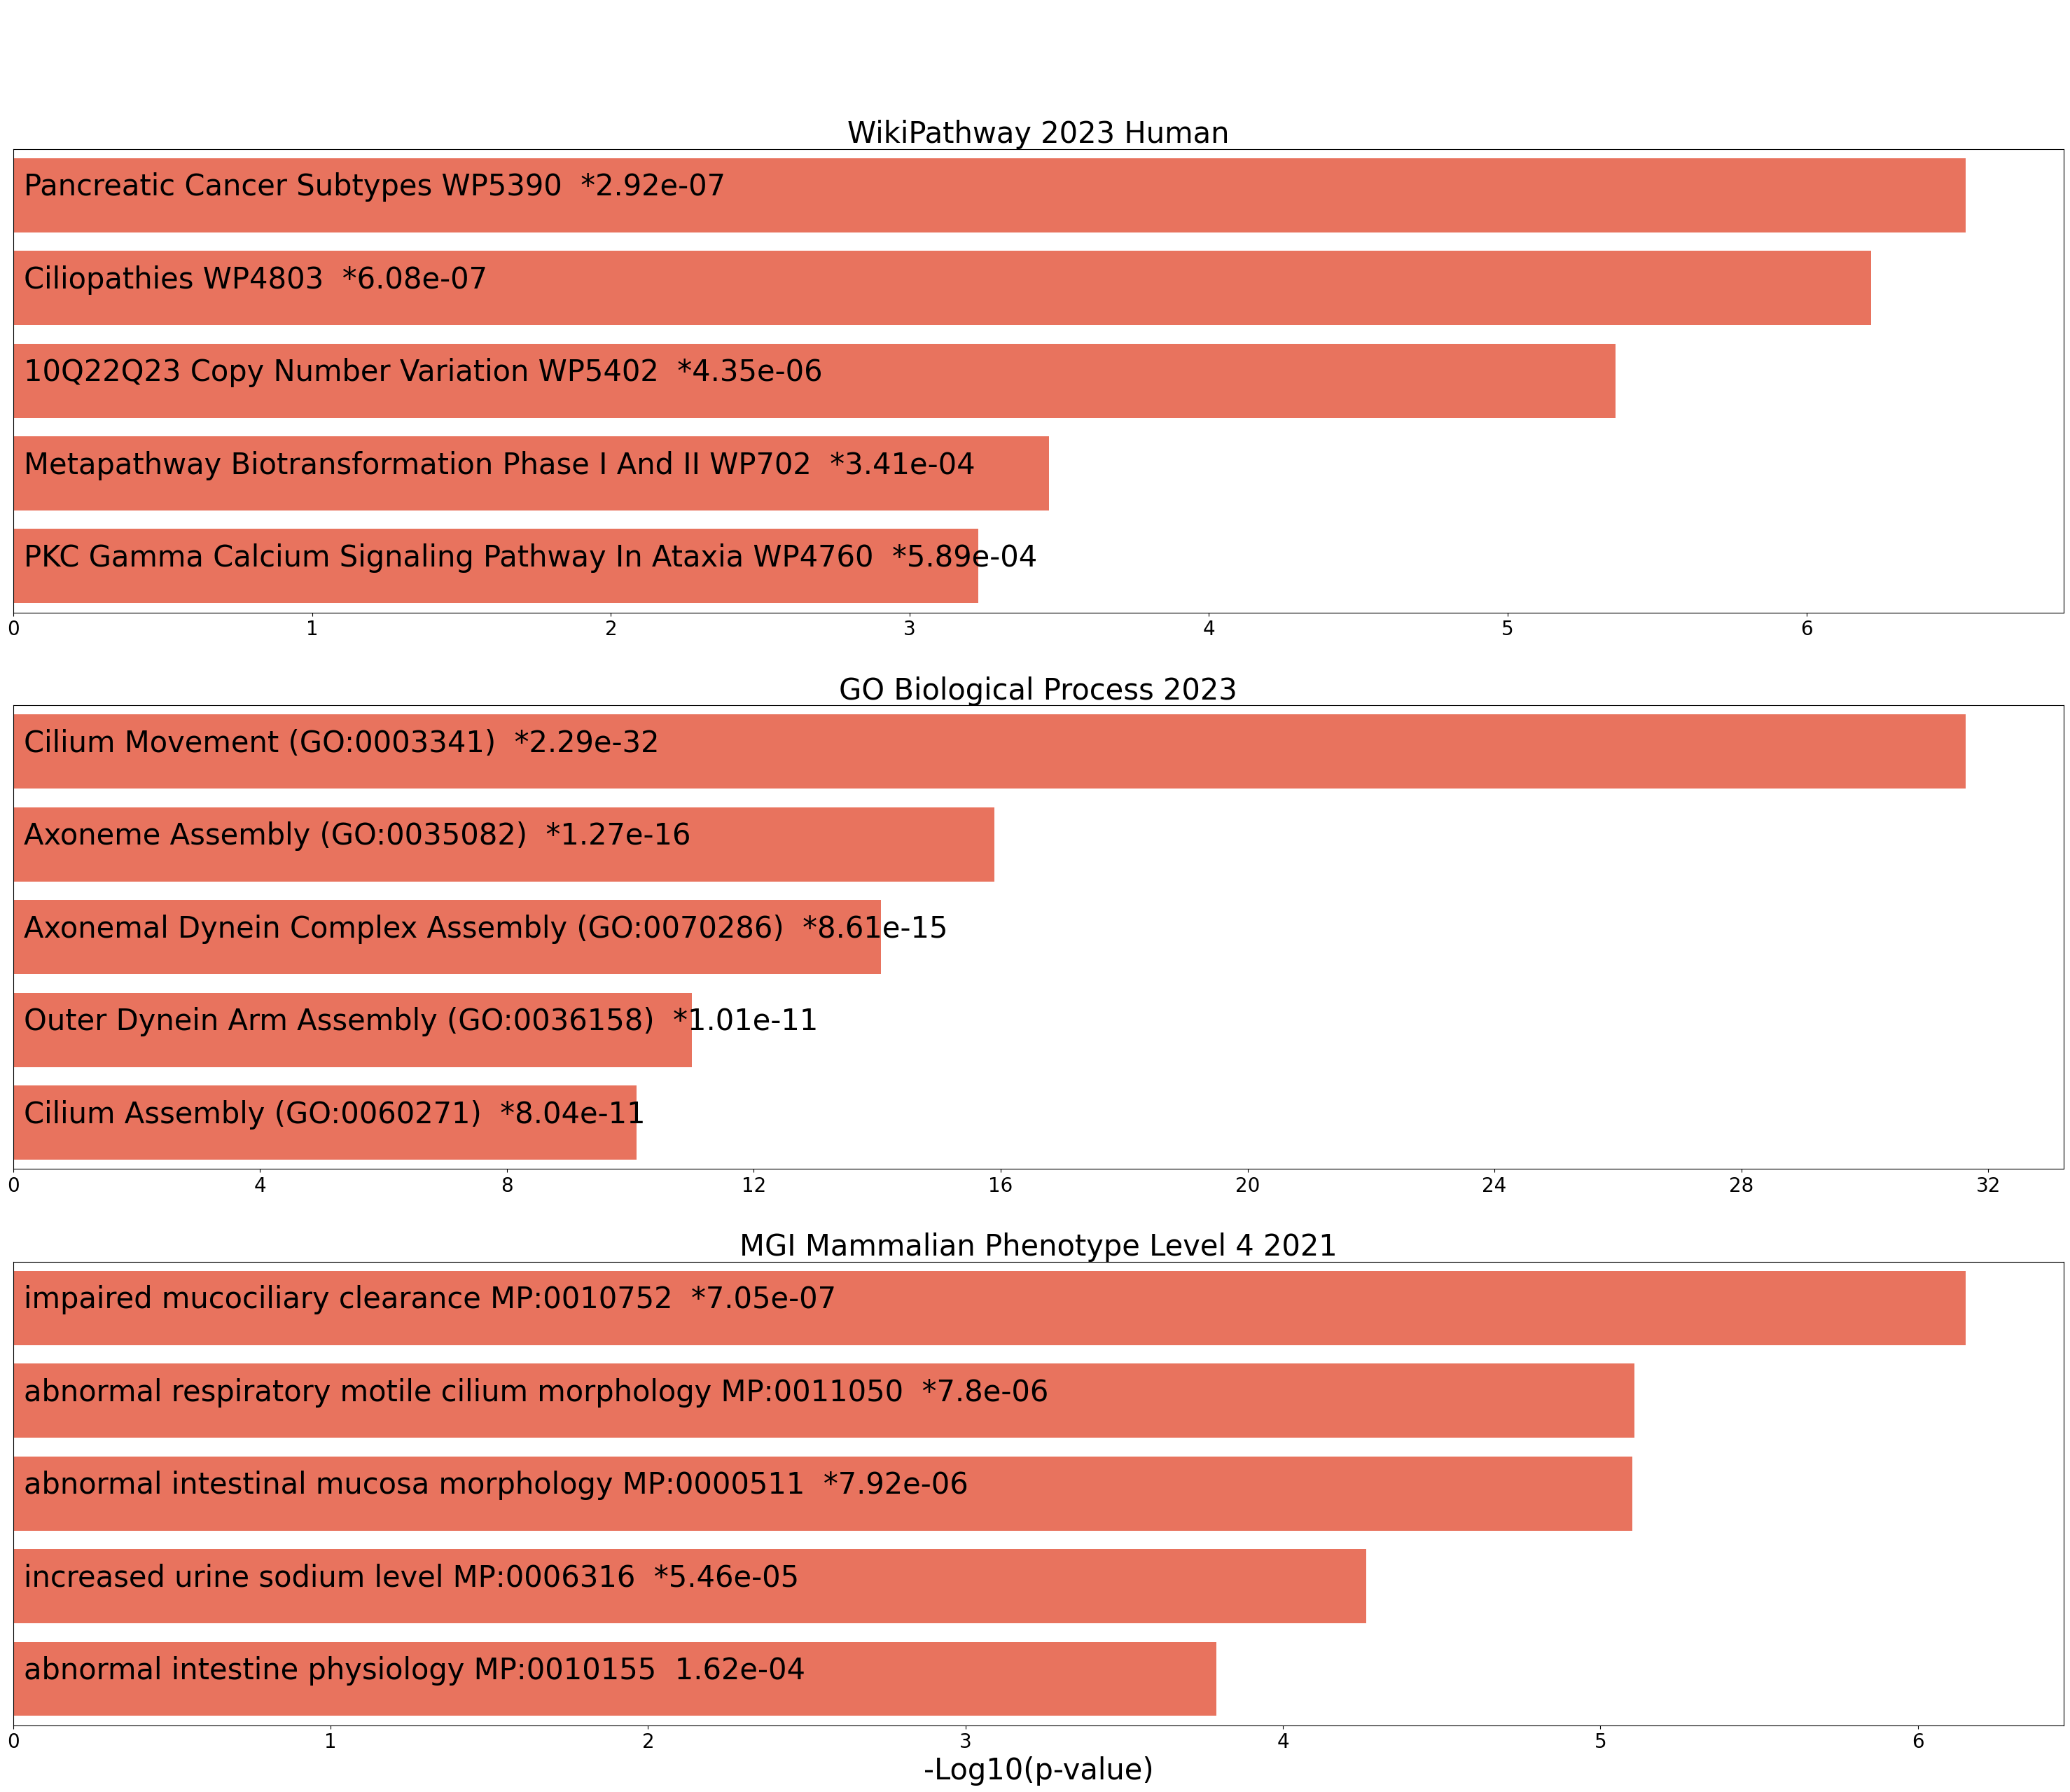

__Figure 2.__ Enrichr results for up-regulated genes in cluster 0 from GO BP, Wikipathways, and MGI. \* indicates adjusted p-value < 0.01.

/Users/giacomomarino/X2KTR/figures/enrichr_up_cluster_0.png

/Users/giacomomarino/X2KTR/figures/enrichr_up_cluster_0.svg

#### Downregulated genes

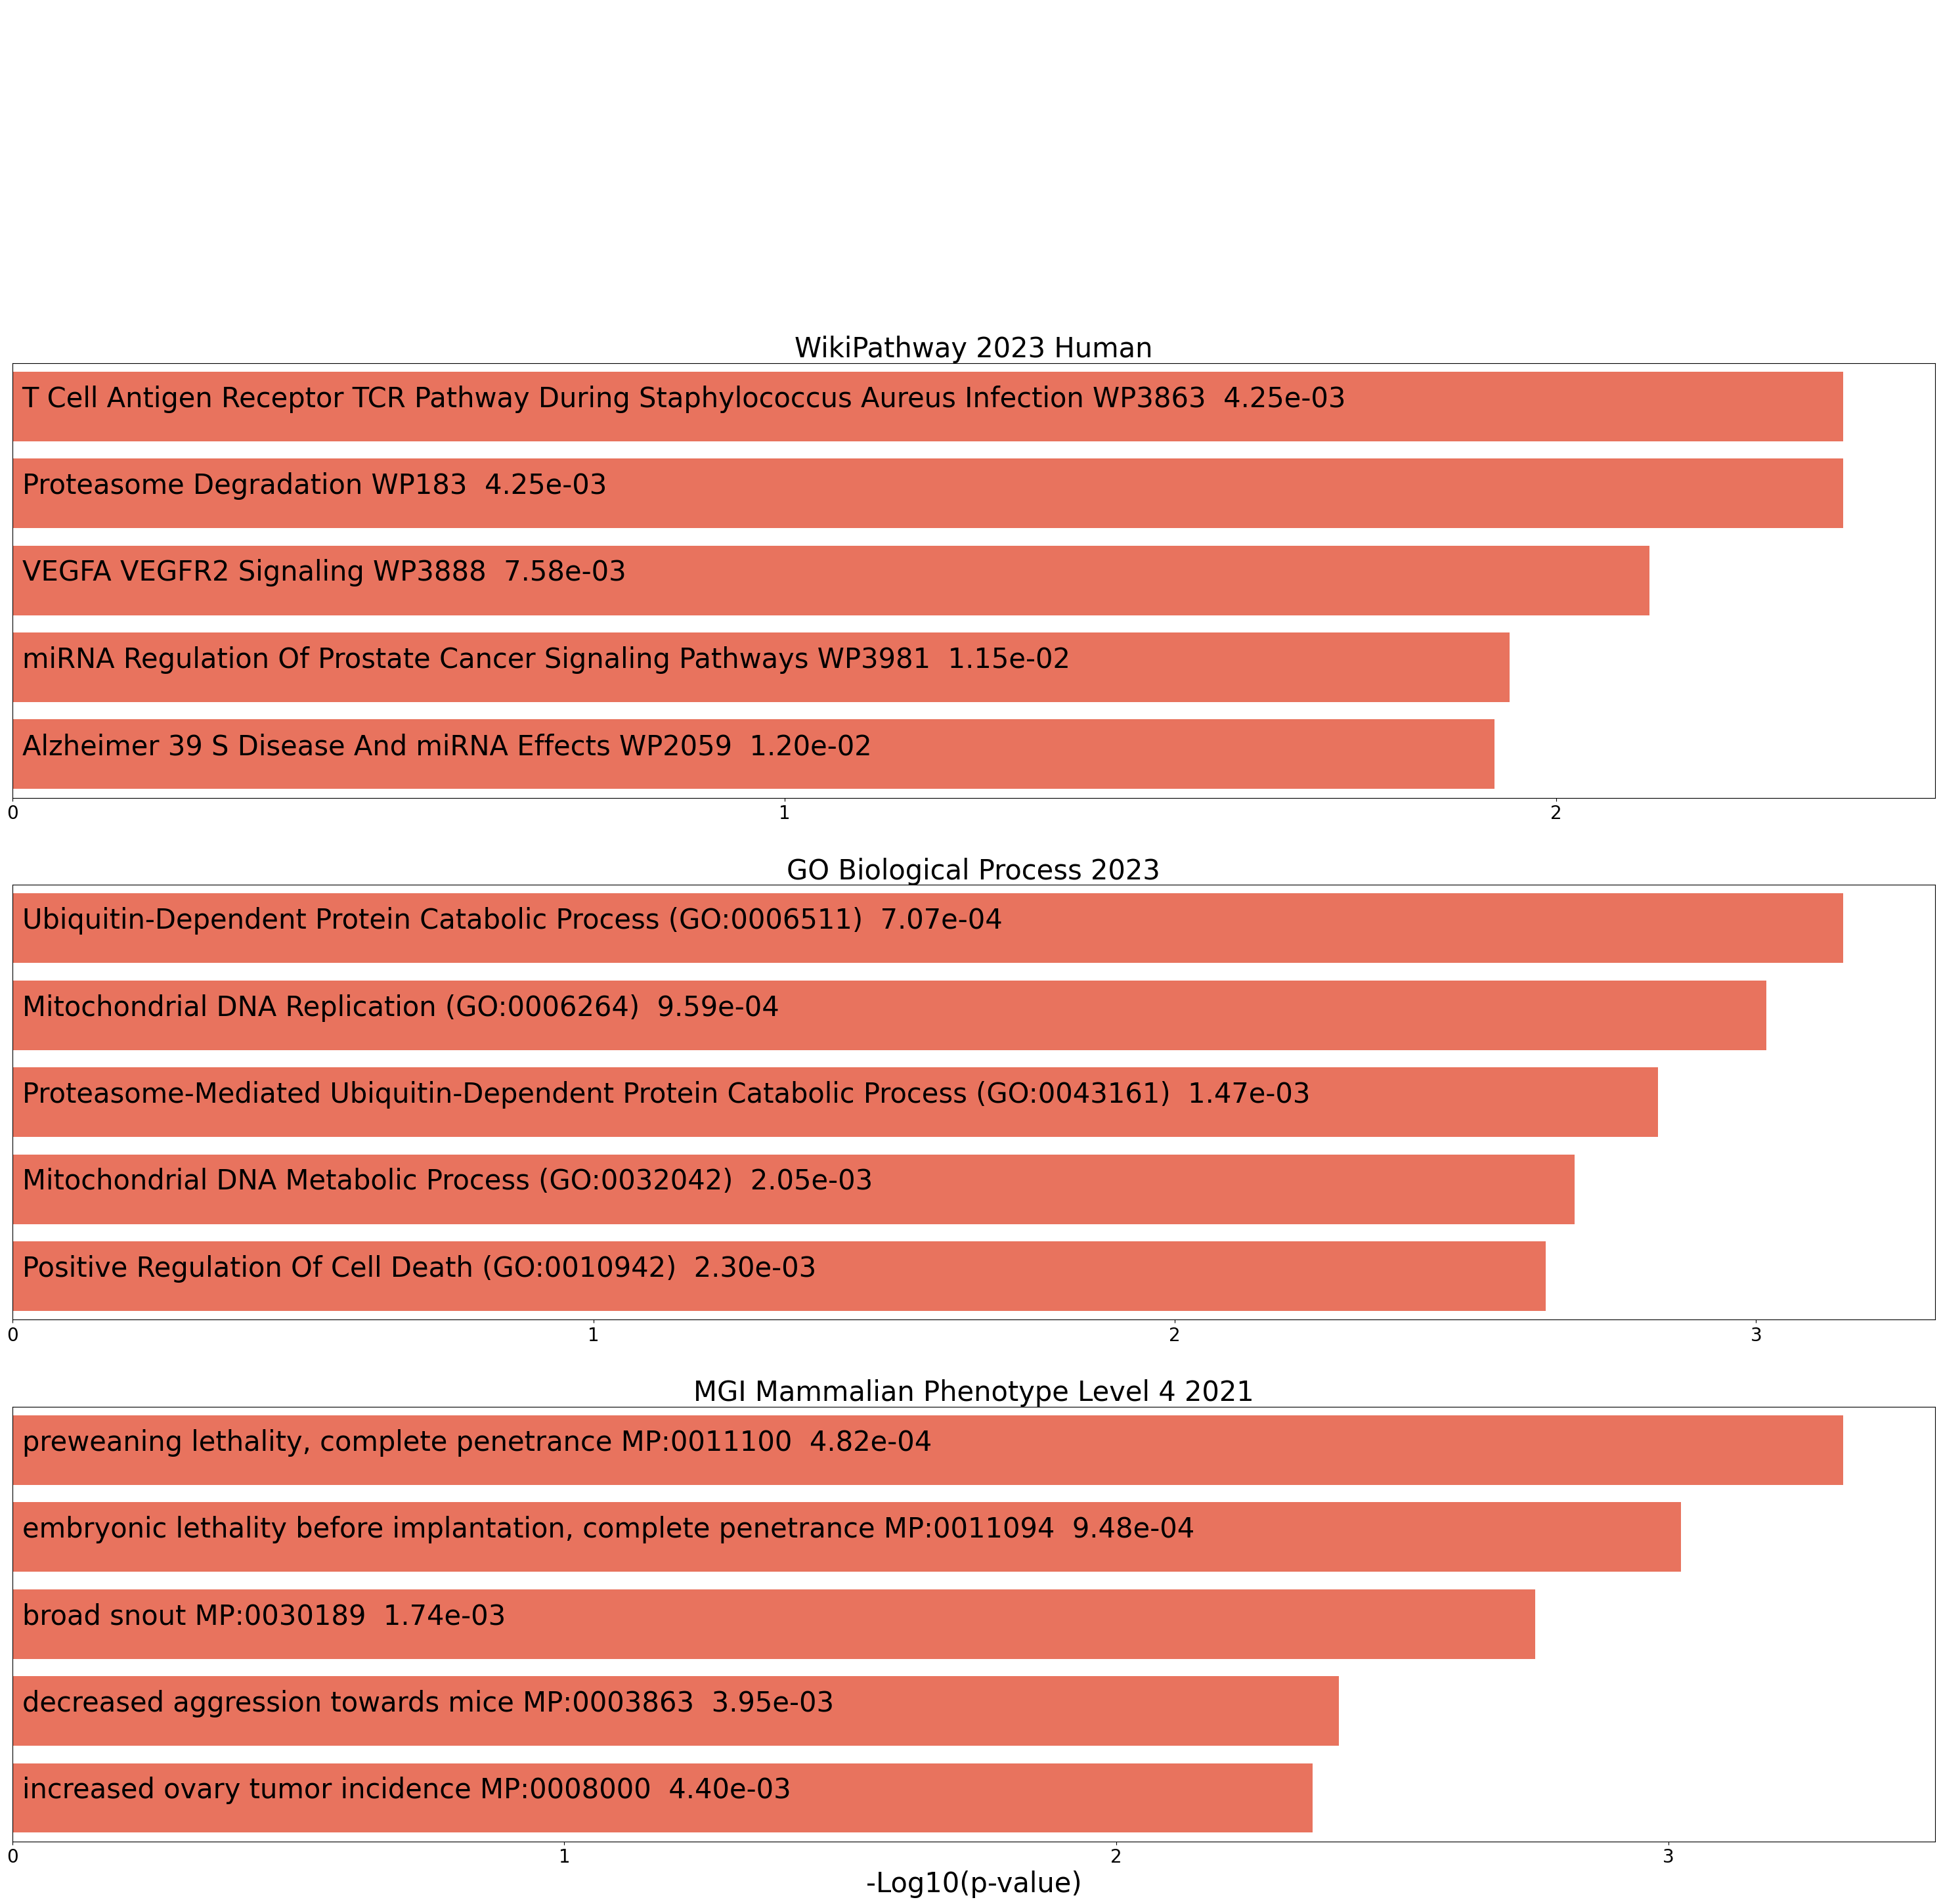

__Figure 3.__ Enrichr results for down-regulated genes in cluster 0 from GO BP, Wikipathways, and MGI. \* indicates adjusted p-value < 0.01.

/Users/giacomomarino/X2KTR/figures/enrichr_dn_cluster_0.png

/Users/giacomomarino/X2KTR/figures/enrichr_dn_cluster_0.svg

### Cluster 1

#### Upregulated genes

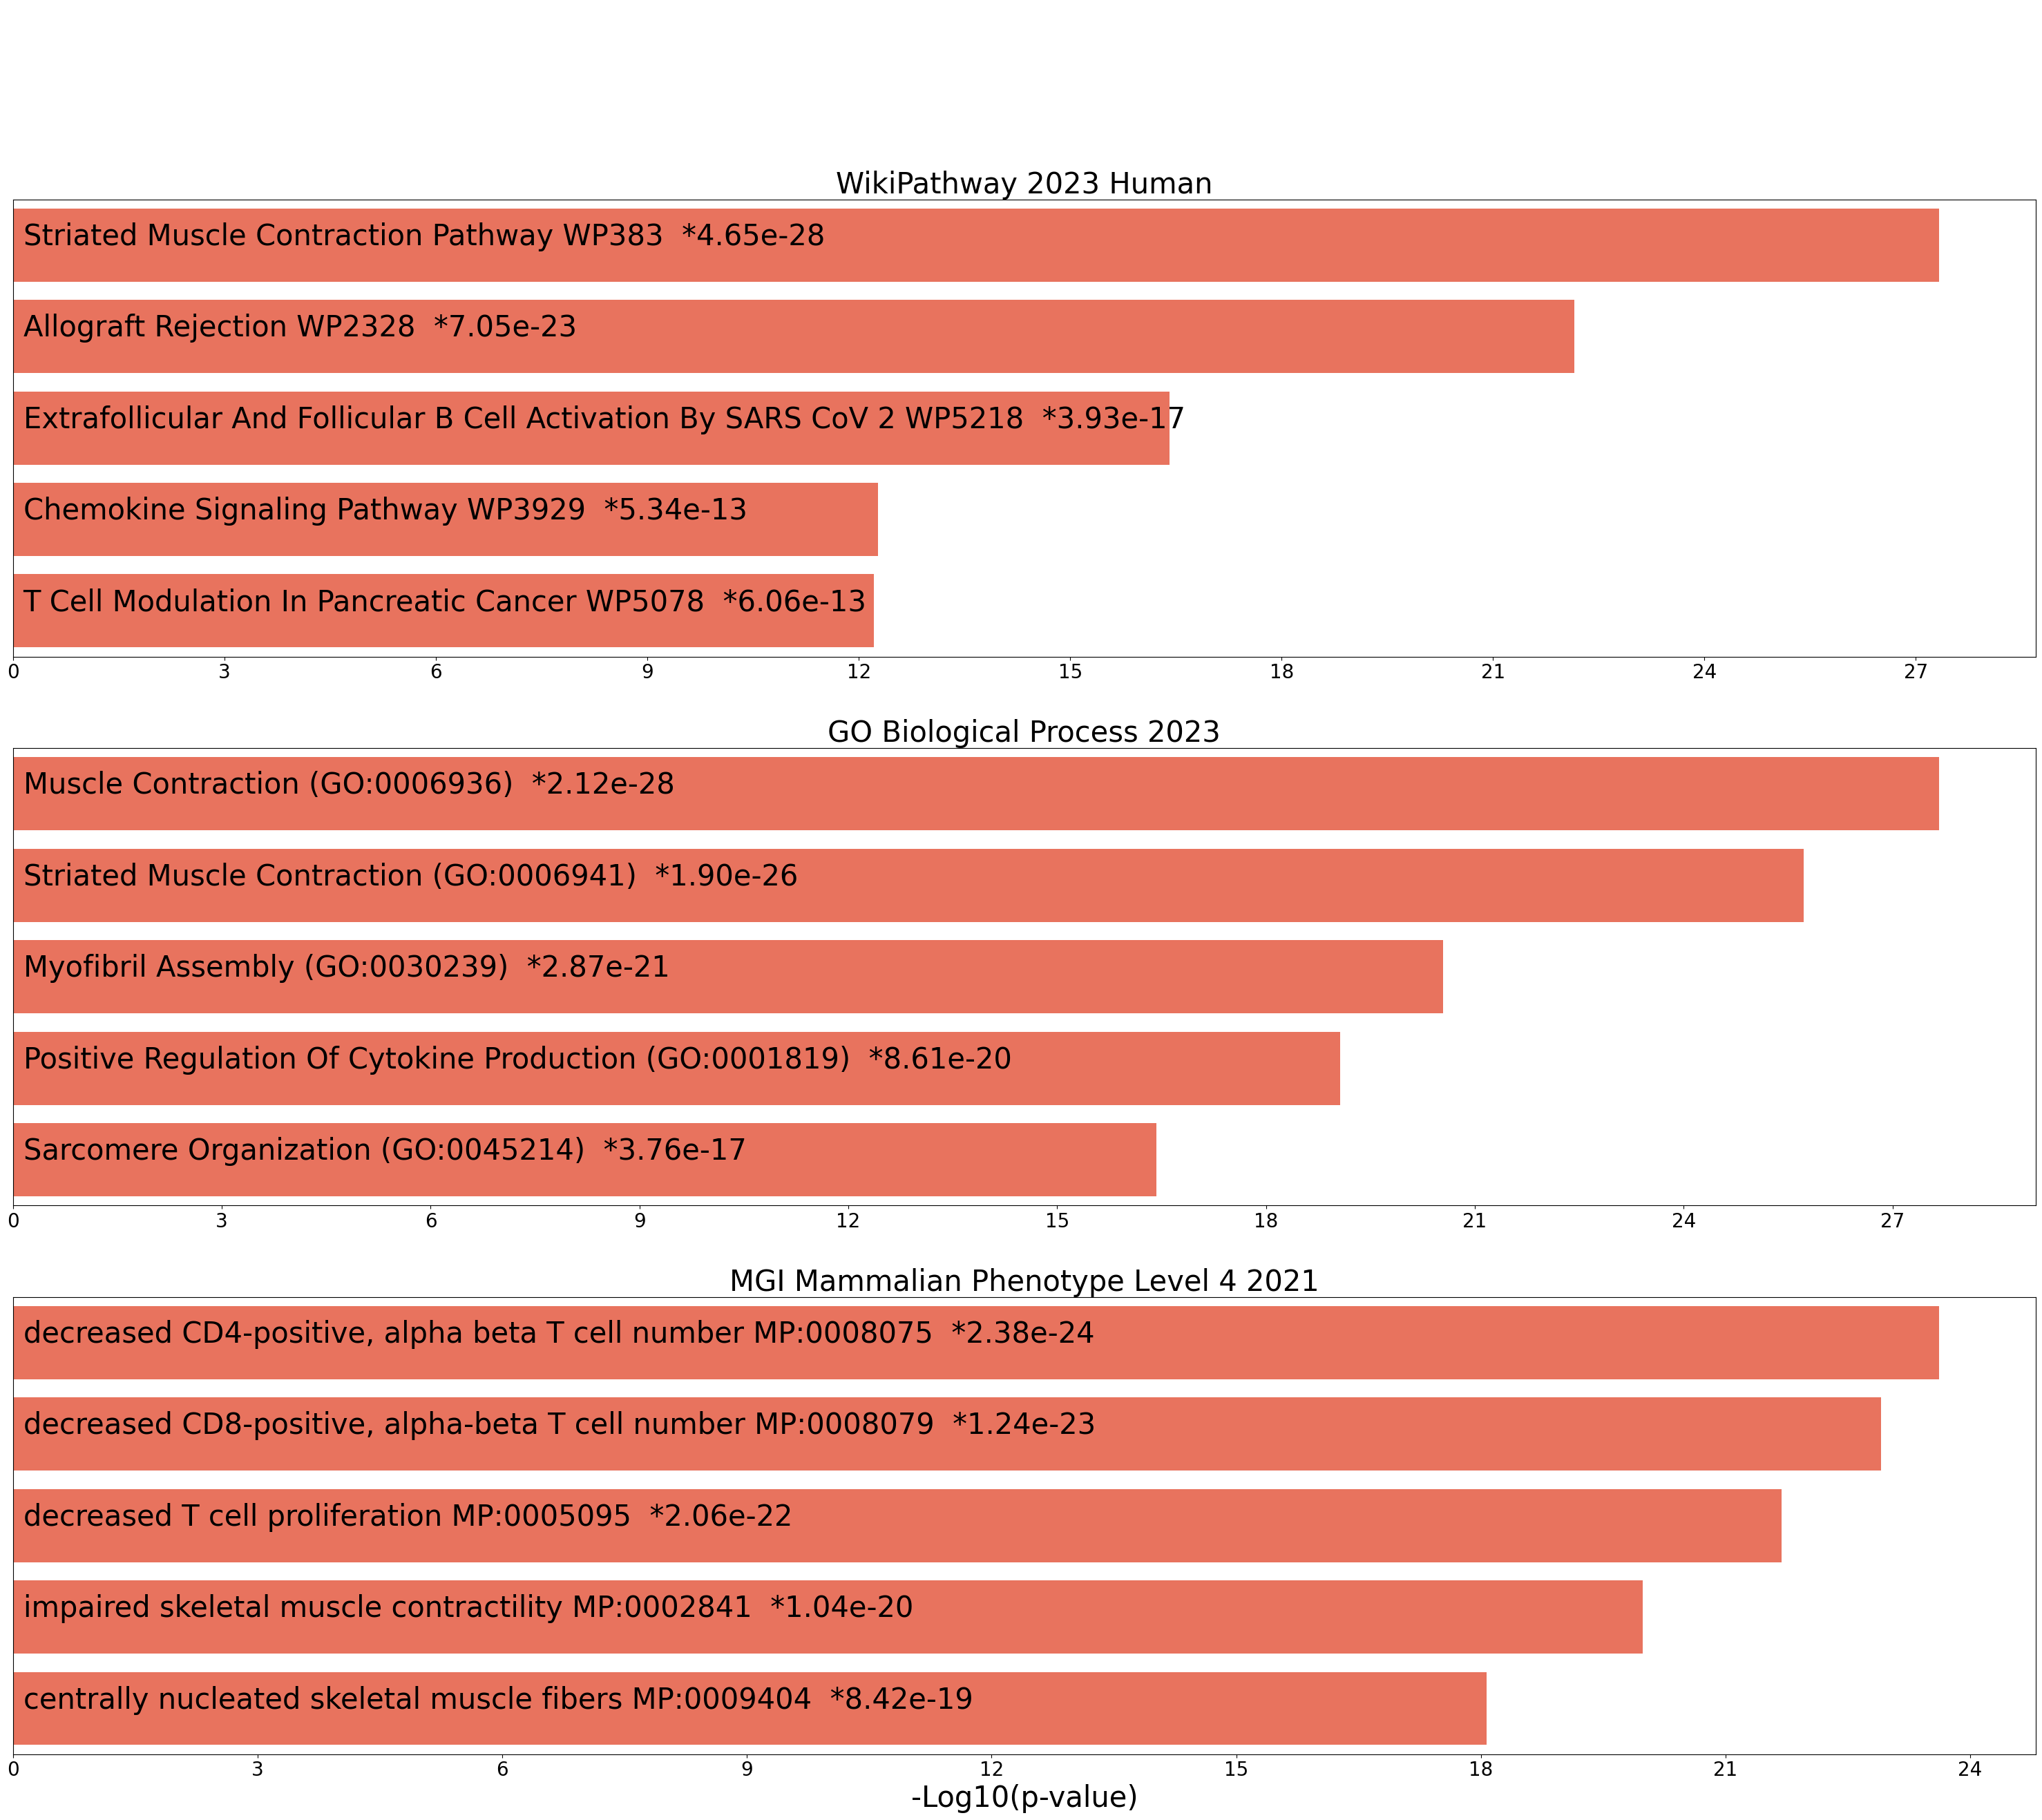

__Figure 4.__ Enrichr results for up-regulated genes in cluster 1 from GO BP, Wikipathways, and MGI. \* indicates adjusted p-value < 0.01.

/Users/giacomomarino/X2KTR/figures/enrichr_up_cluster_1.png

/Users/giacomomarino/X2KTR/figures/enrichr_up_cluster_1.svg

#### Downregulated genes

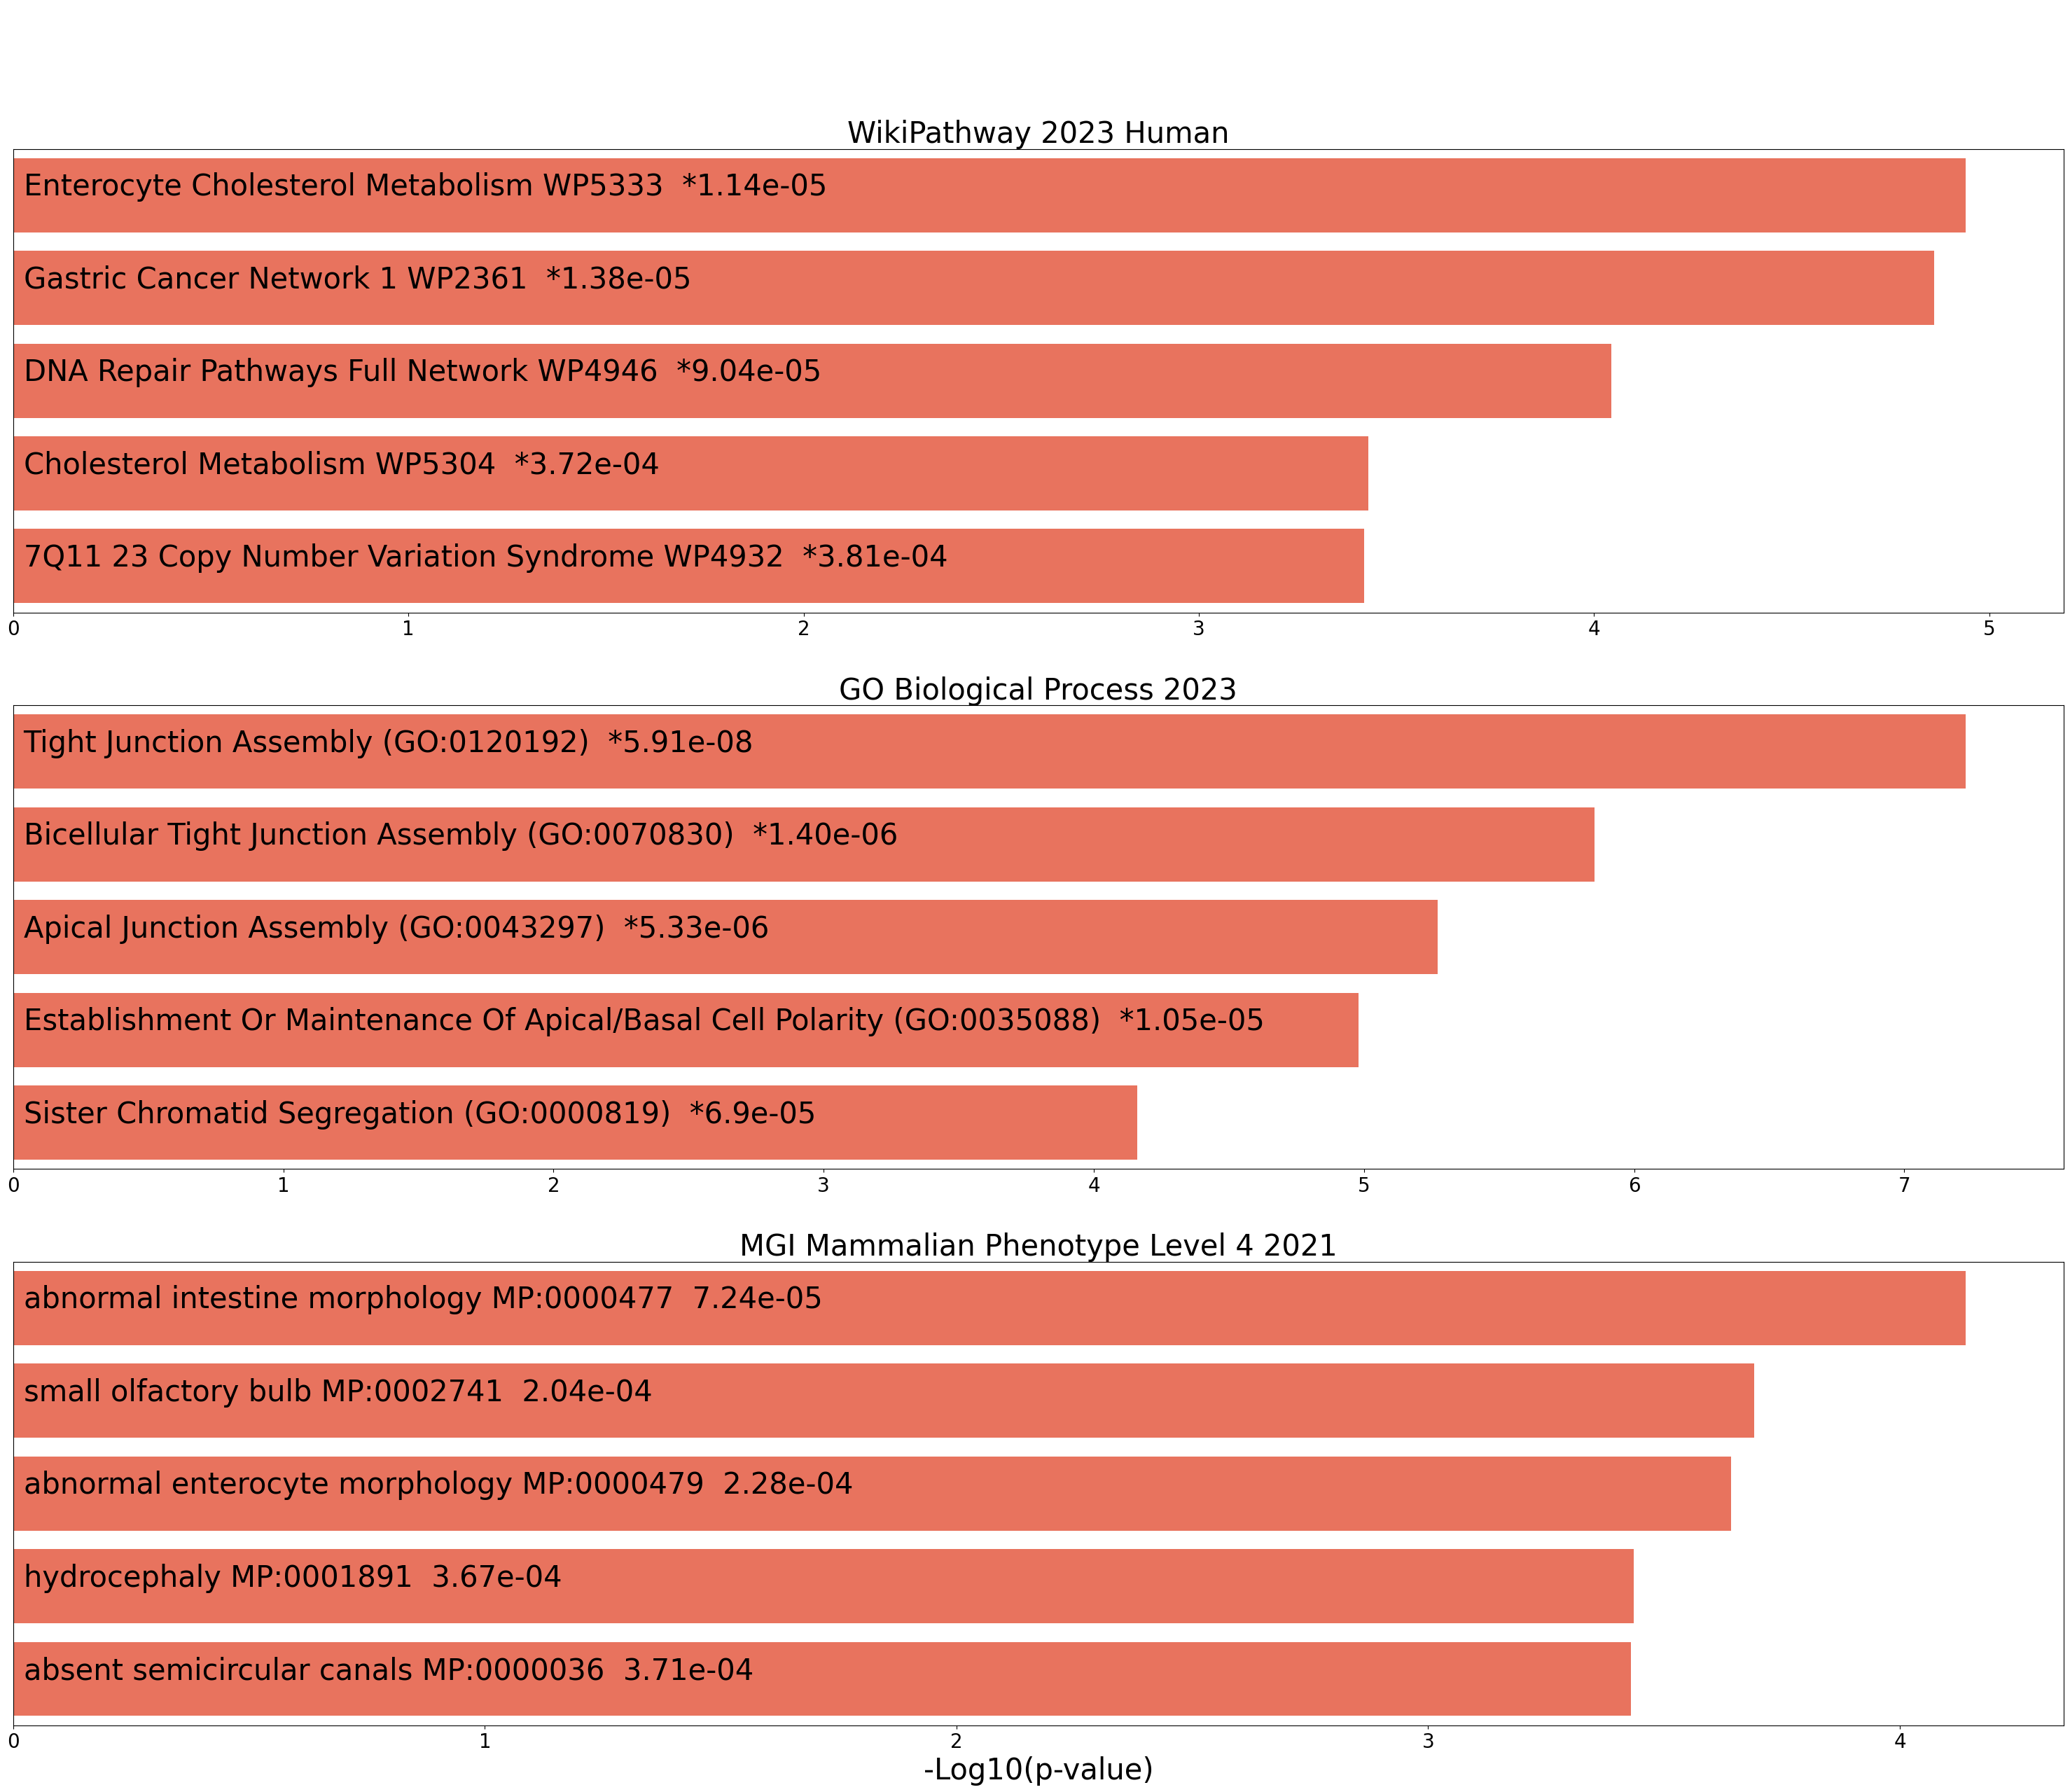

__Figure 5.__ Enrichr results for down-regulated genes in cluster 1 from GO BP, Wikipathways, and MGI. \* indicates adjusted p-value < 0.01.

/Users/giacomomarino/X2KTR/figures/enrichr_dn_cluster_1.png

/Users/giacomomarino/X2KTR/figures/enrichr_dn_cluster_1.svg

### Cluster 2

#### Upregulated genes

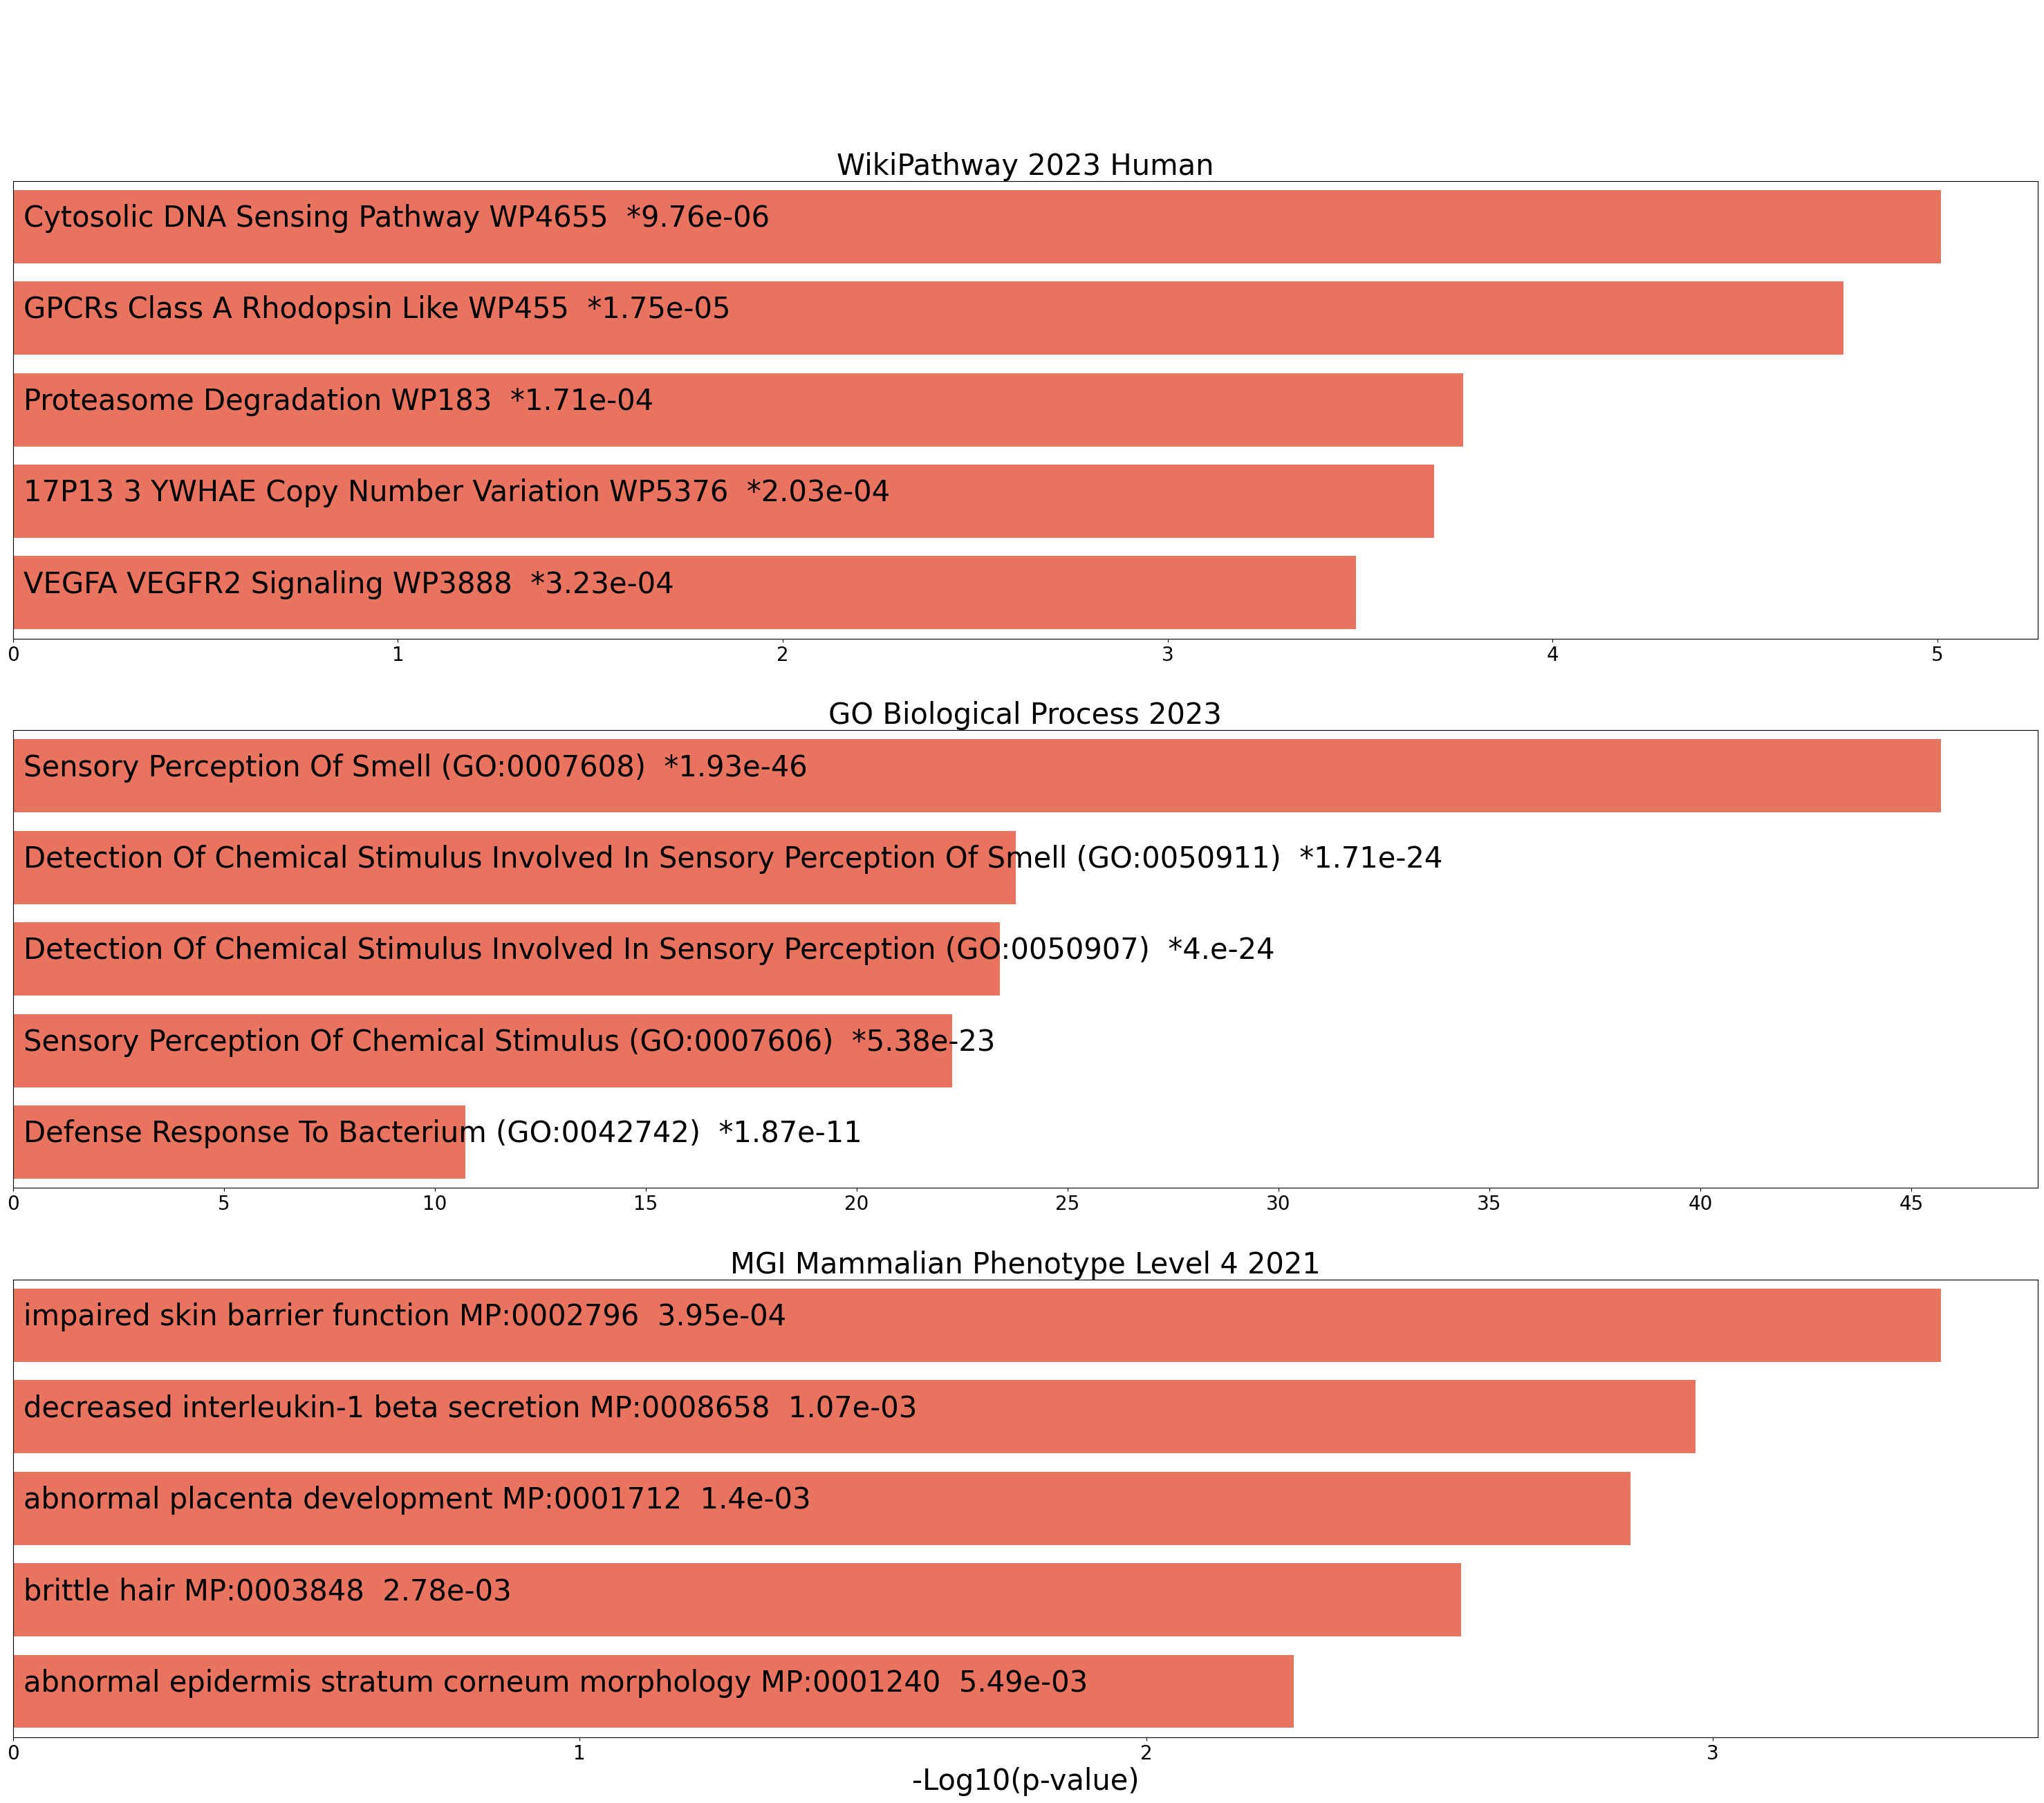

__Figure 6.__ Enrichr results for up-regulated genes in cluster 2 from GO BP, Wikipathways, and MGI. \* indicates adjusted p-value < 0.01.

/Users/giacomomarino/X2KTR/figures/enrichr_up_cluster_2.png

/Users/giacomomarino/X2KTR/figures/enrichr_up_cluster_2.svg

#### Downregulated genes

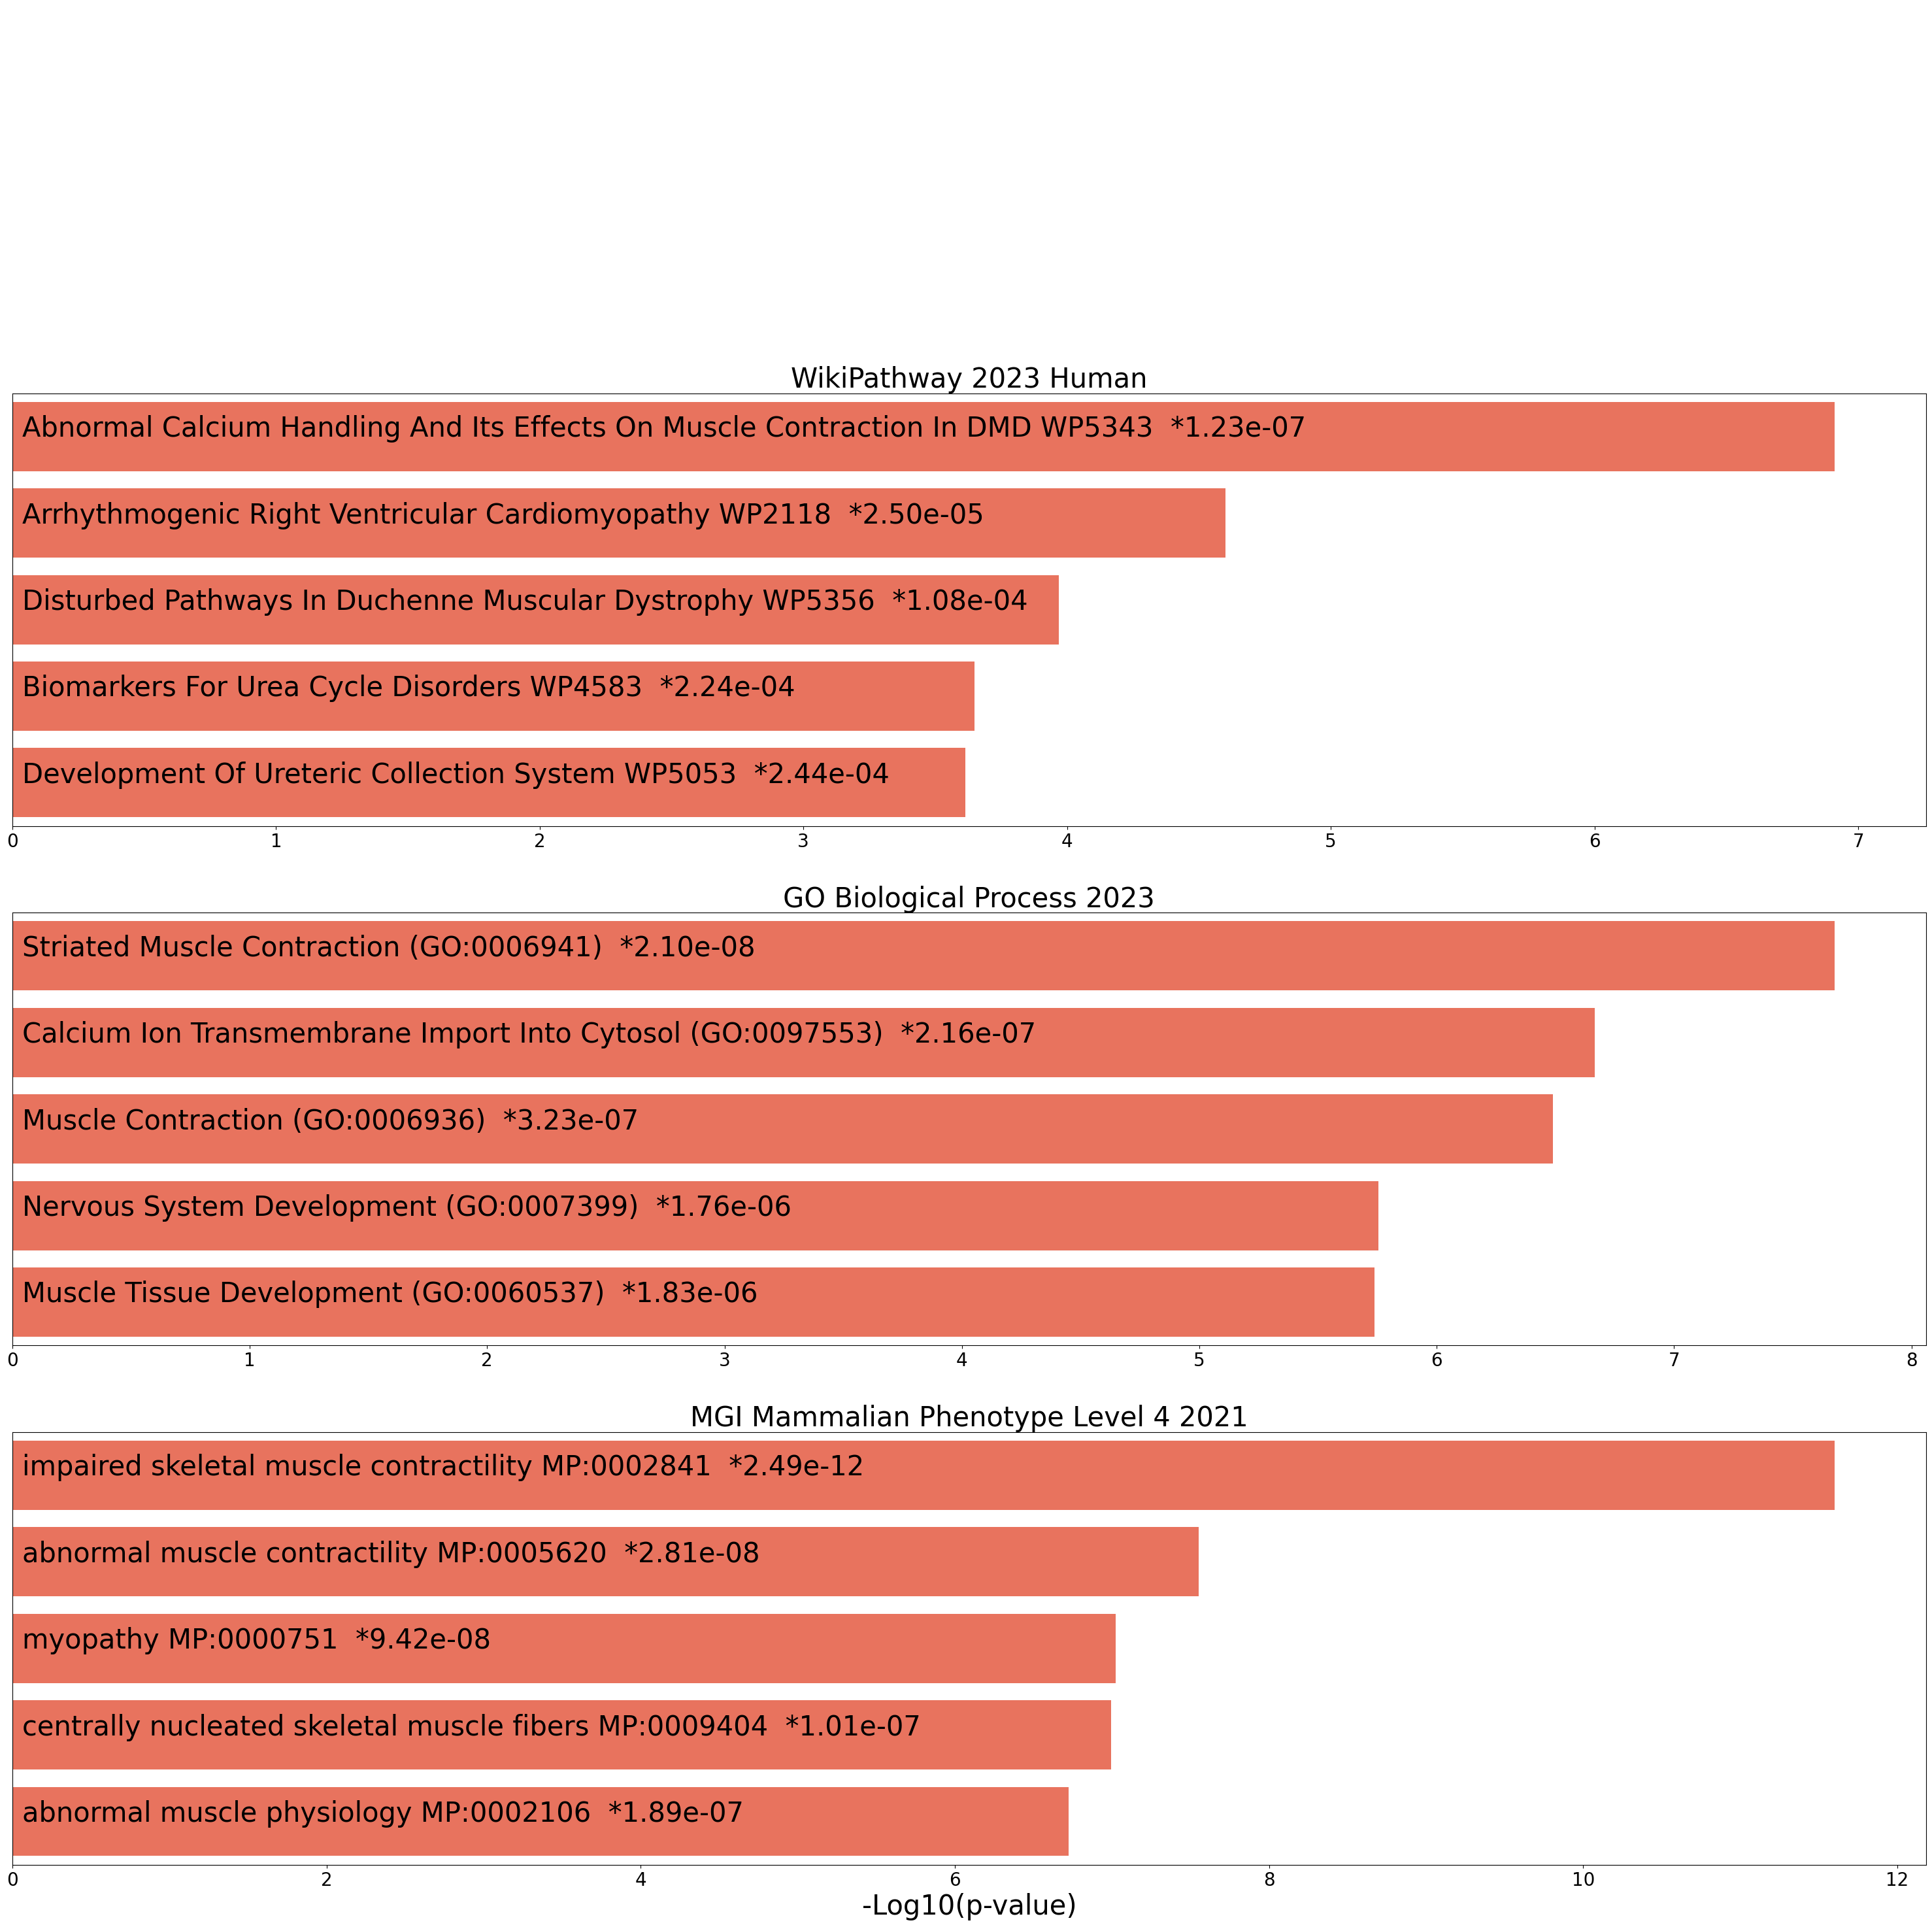

__Figure 7.__ Enrichr results for down-regulated genes in cluster 2 from GO BP, Wikipathways, and MGI. \* indicates adjusted p-value < 0.01.

/Users/giacomomarino/X2KTR/figures/enrichr_dn_cluster_2.png

/Users/giacomomarino/X2KTR/figures/enrichr_dn_cluster_2.svg

### Cluster 3

#### Upregulated genes

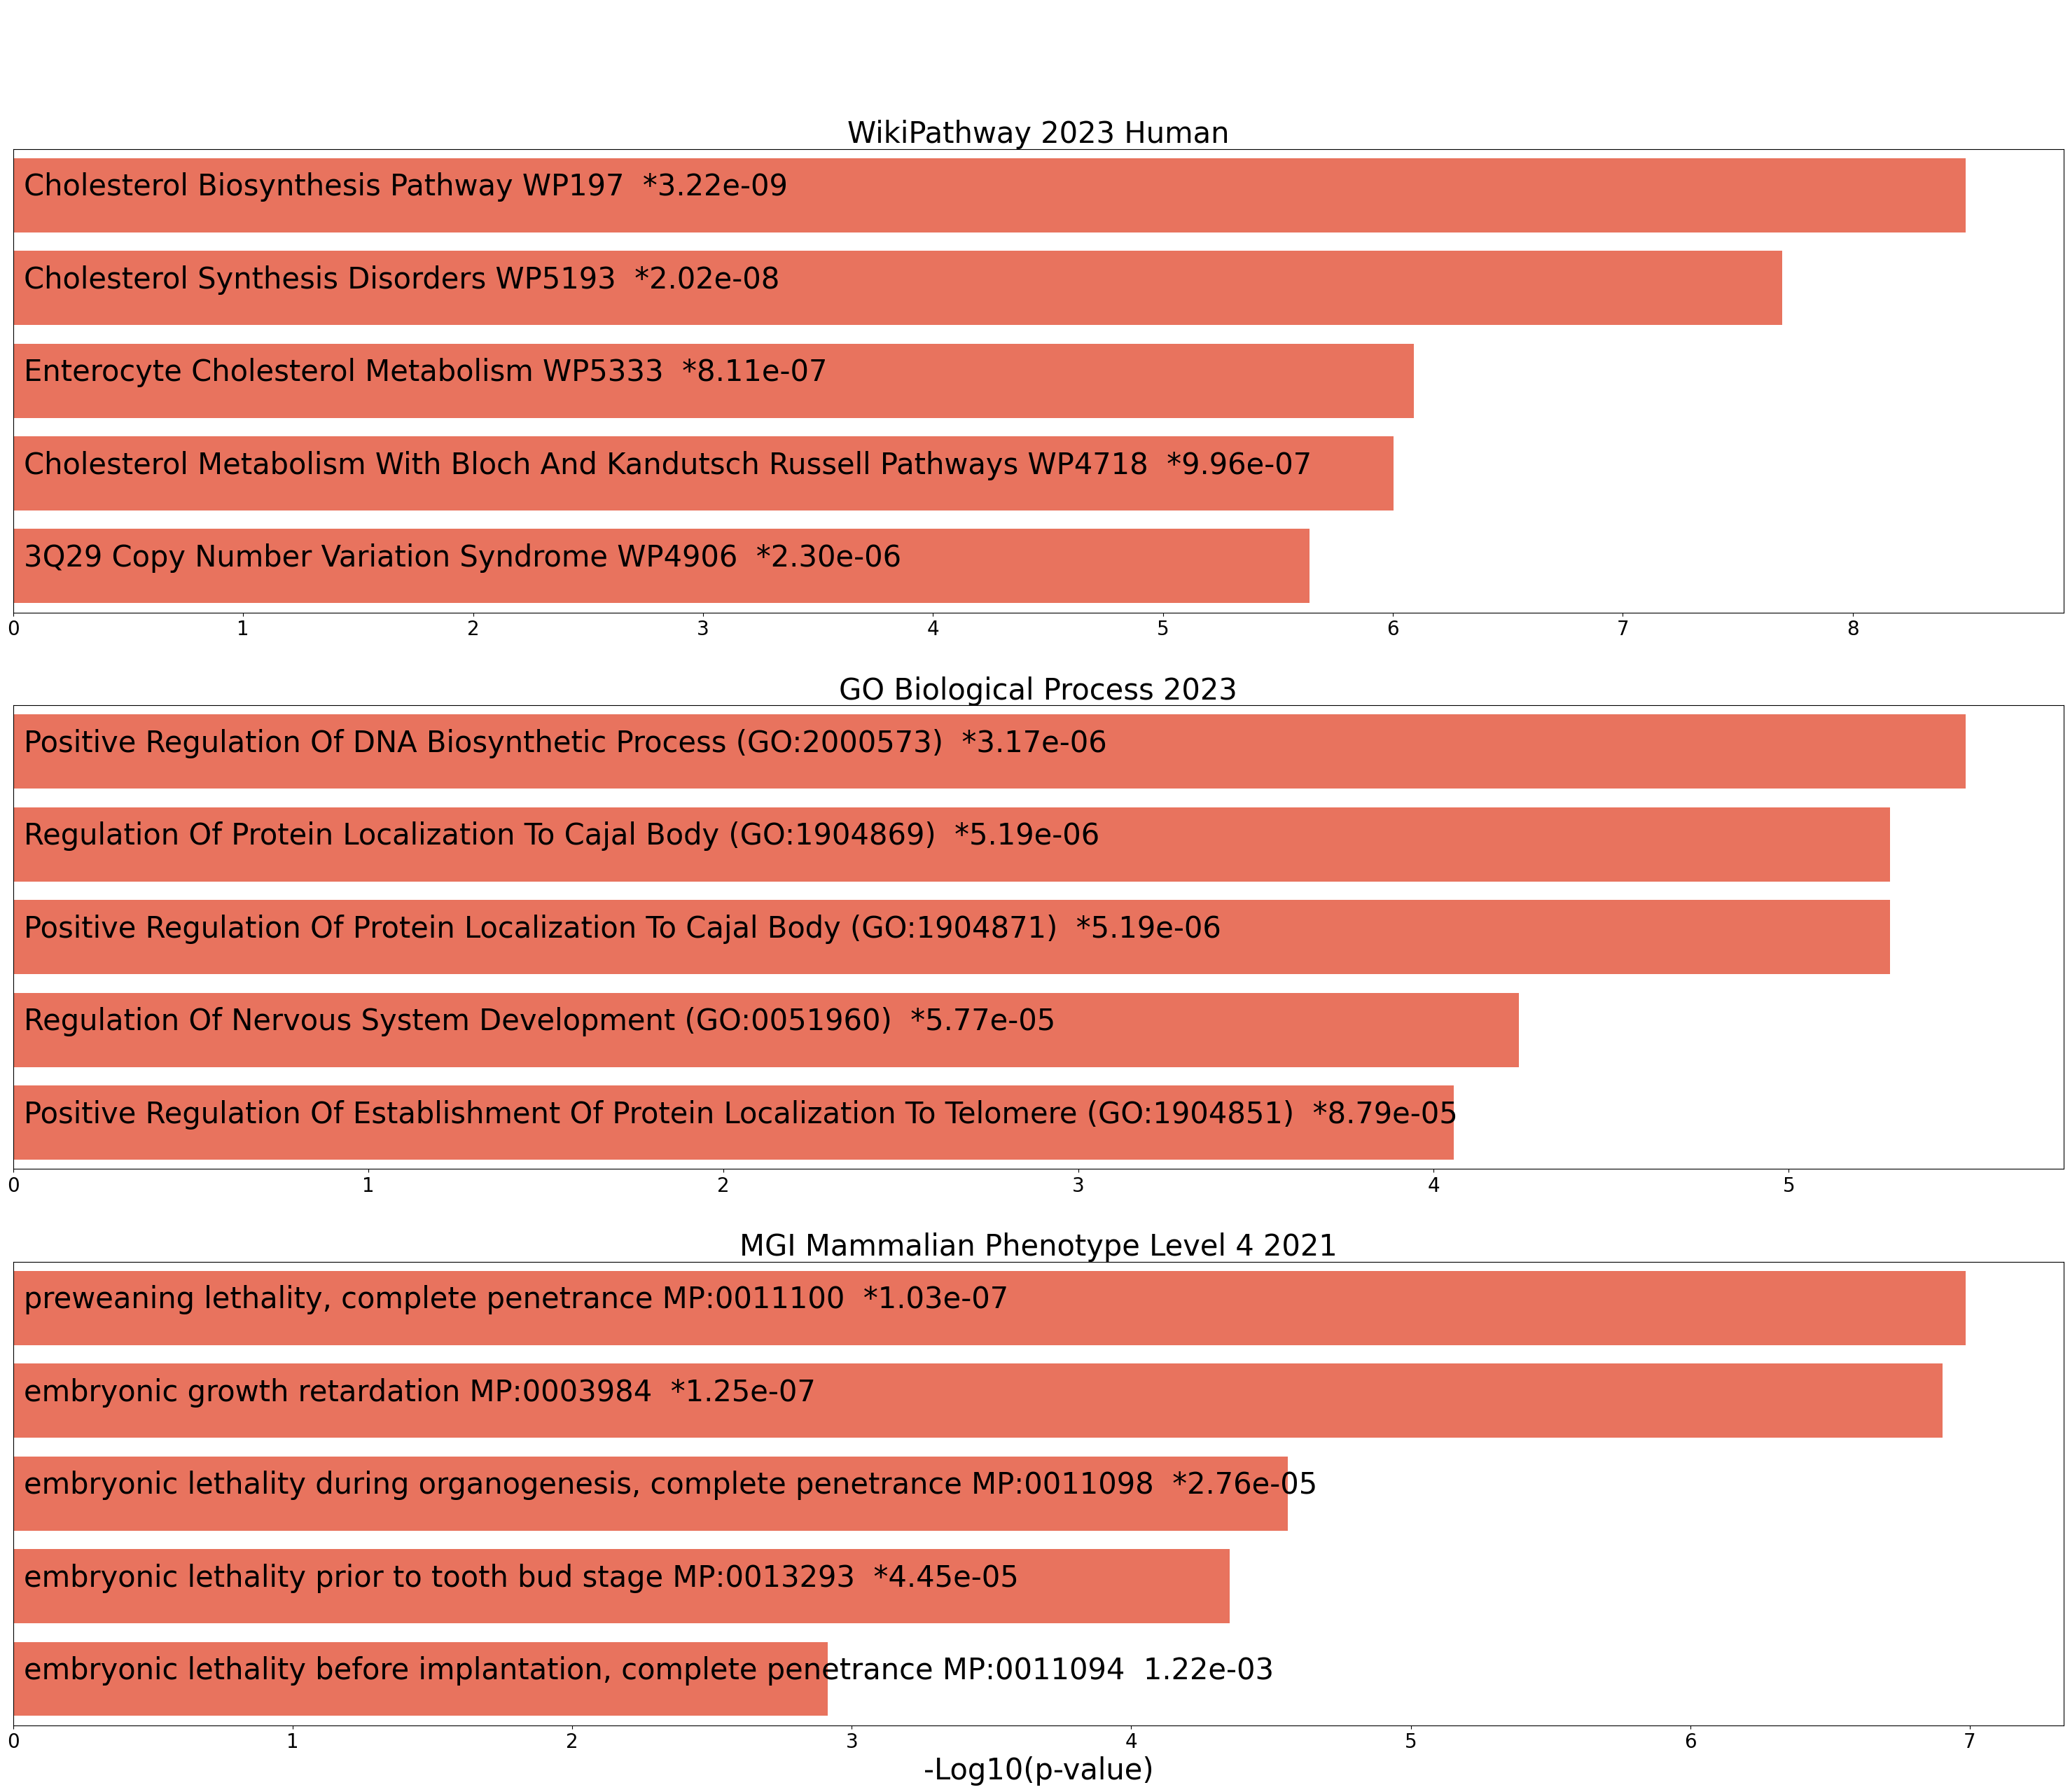

__Figure 8.__ Enrichr results for up-regulated genes in cluster 3 from GO BP, Wikipathways, and MGI. \* indicates adjusted p-value < 0.01.

/Users/giacomomarino/X2KTR/figures/enrichr_up_cluster_3.png

/Users/giacomomarino/X2KTR/figures/enrichr_up_cluster_3.svg

#### Downregulated genes

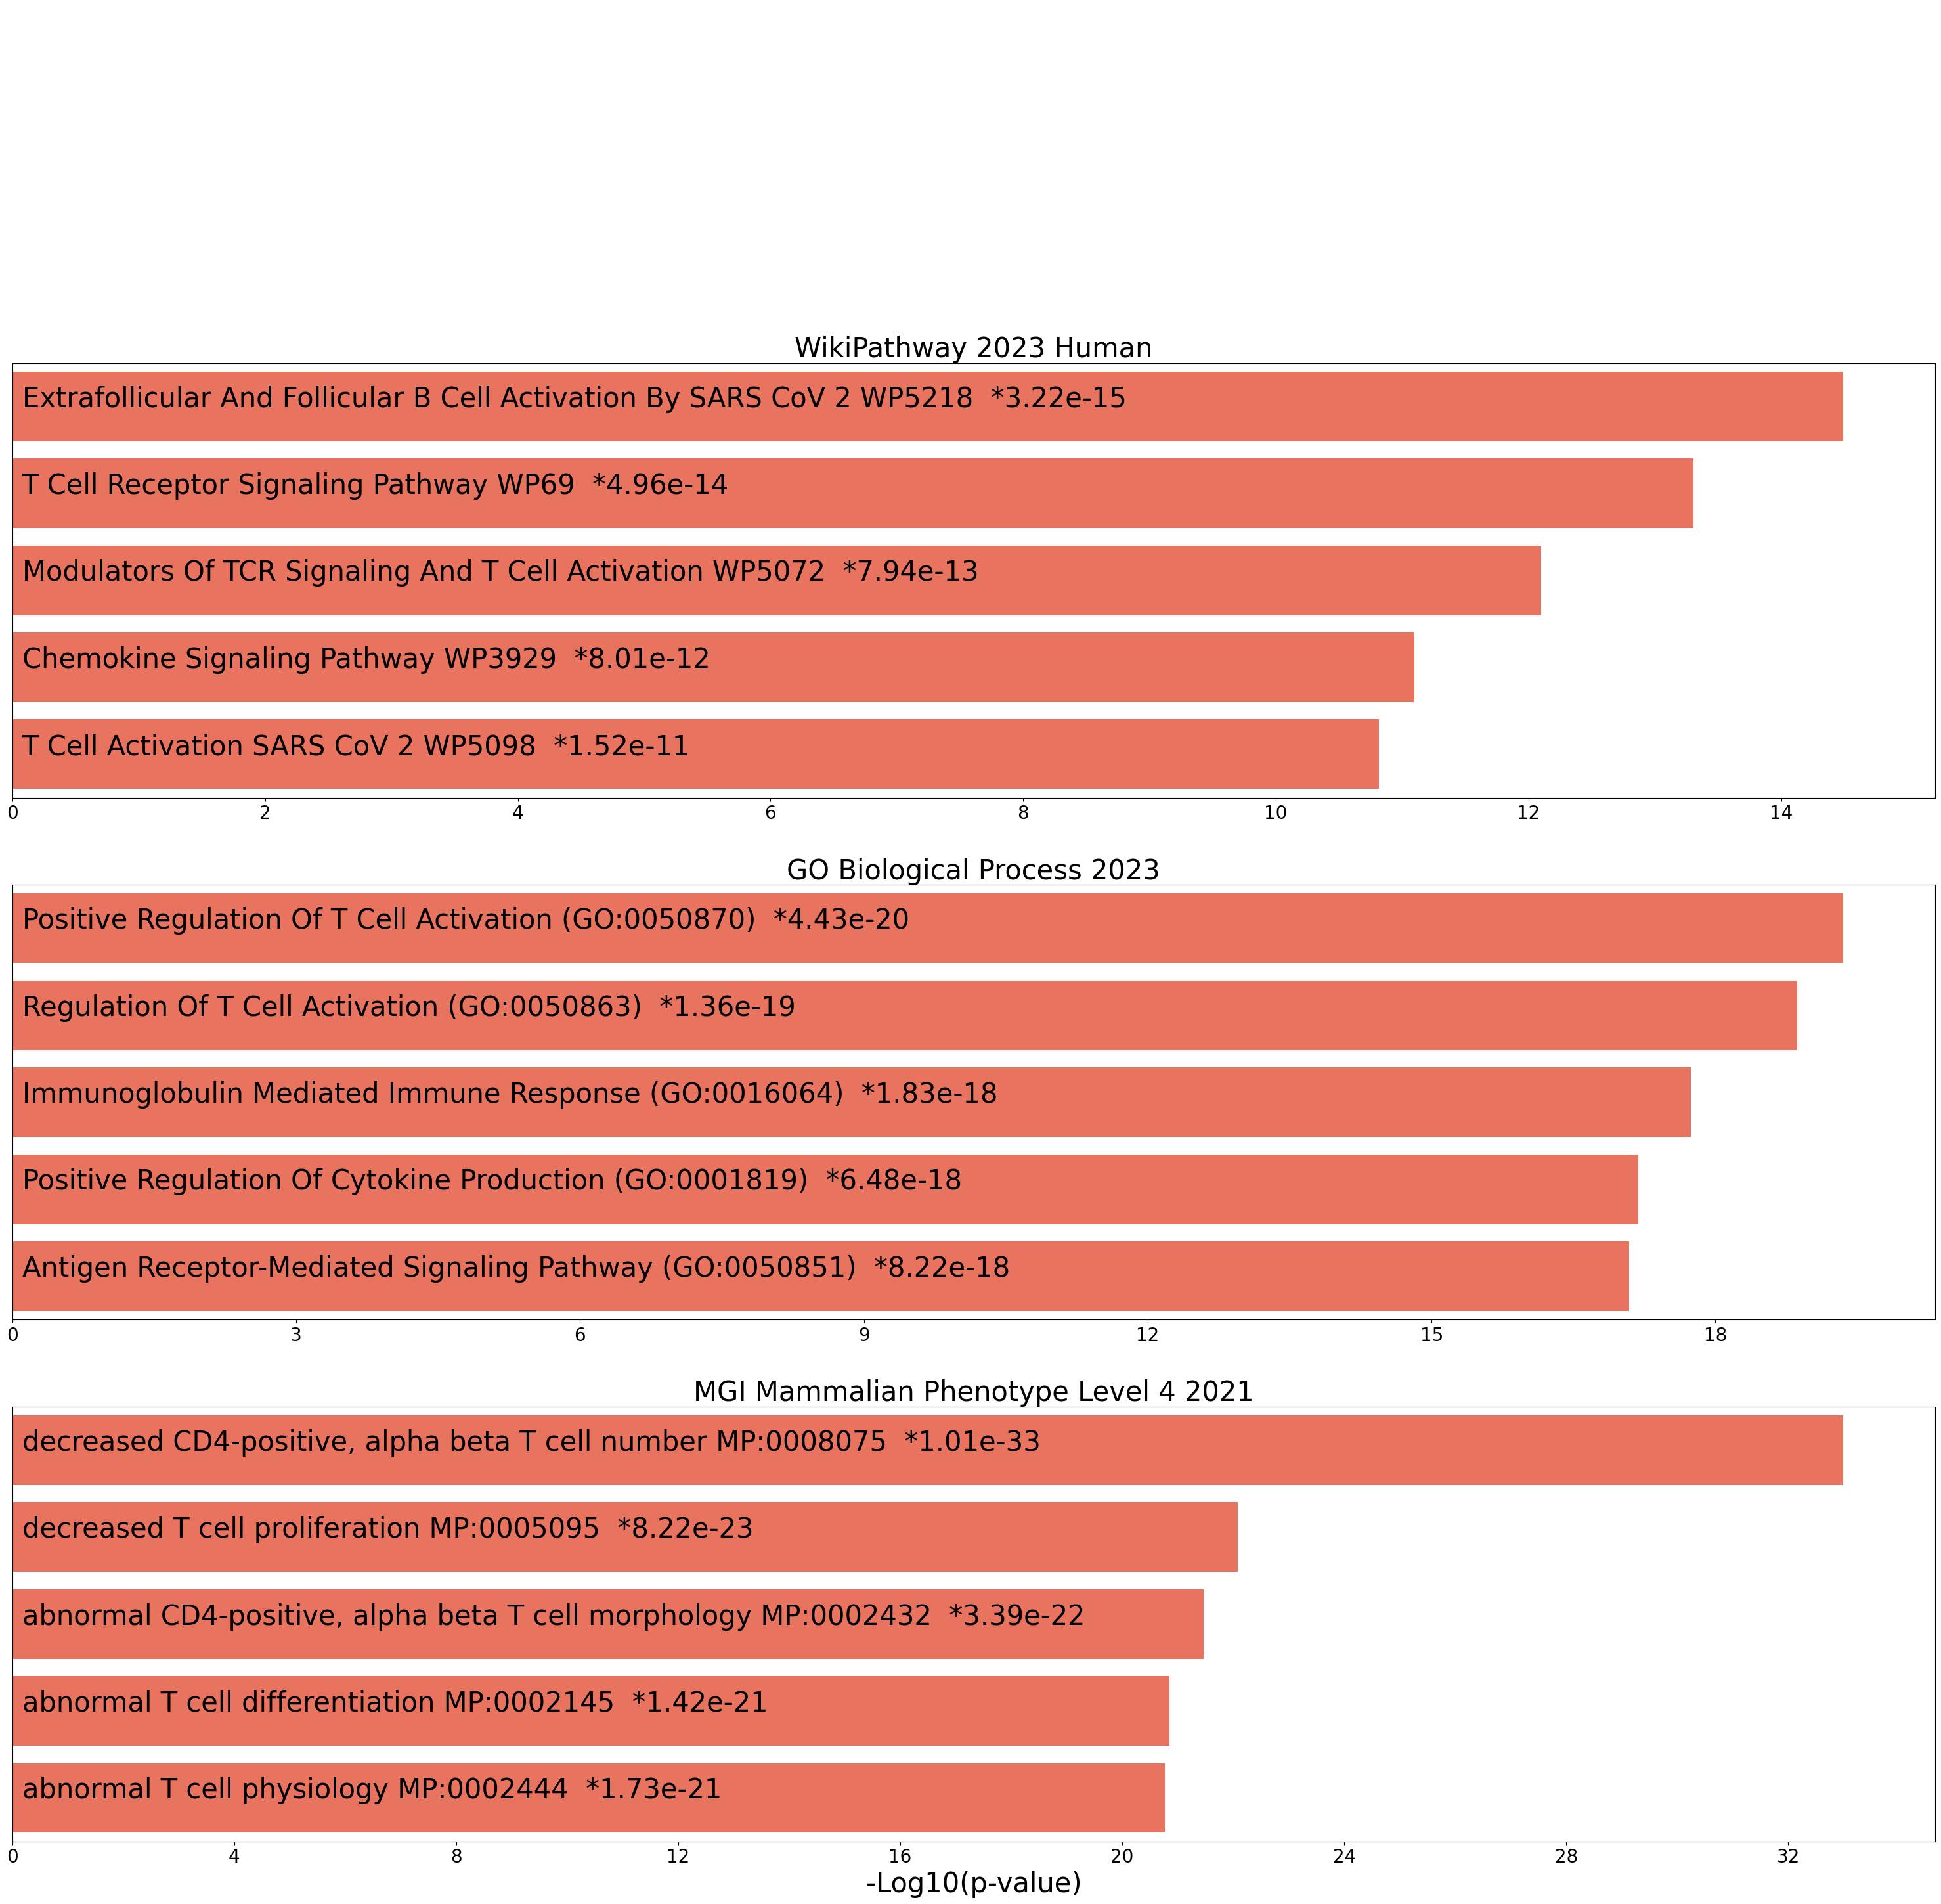

__Figure 9.__ Enrichr results for down-regulated genes in cluster 3 from GO BP, Wikipathways, and MGI. \* indicates adjusted p-value < 0.01.

/Users/giacomomarino/X2KTR/figures/enrichr_dn_cluster_3.png

/Users/giacomomarino/X2KTR/figures/enrichr_dn_cluster_3.svg

### Cluster 4

#### Upregulated genes

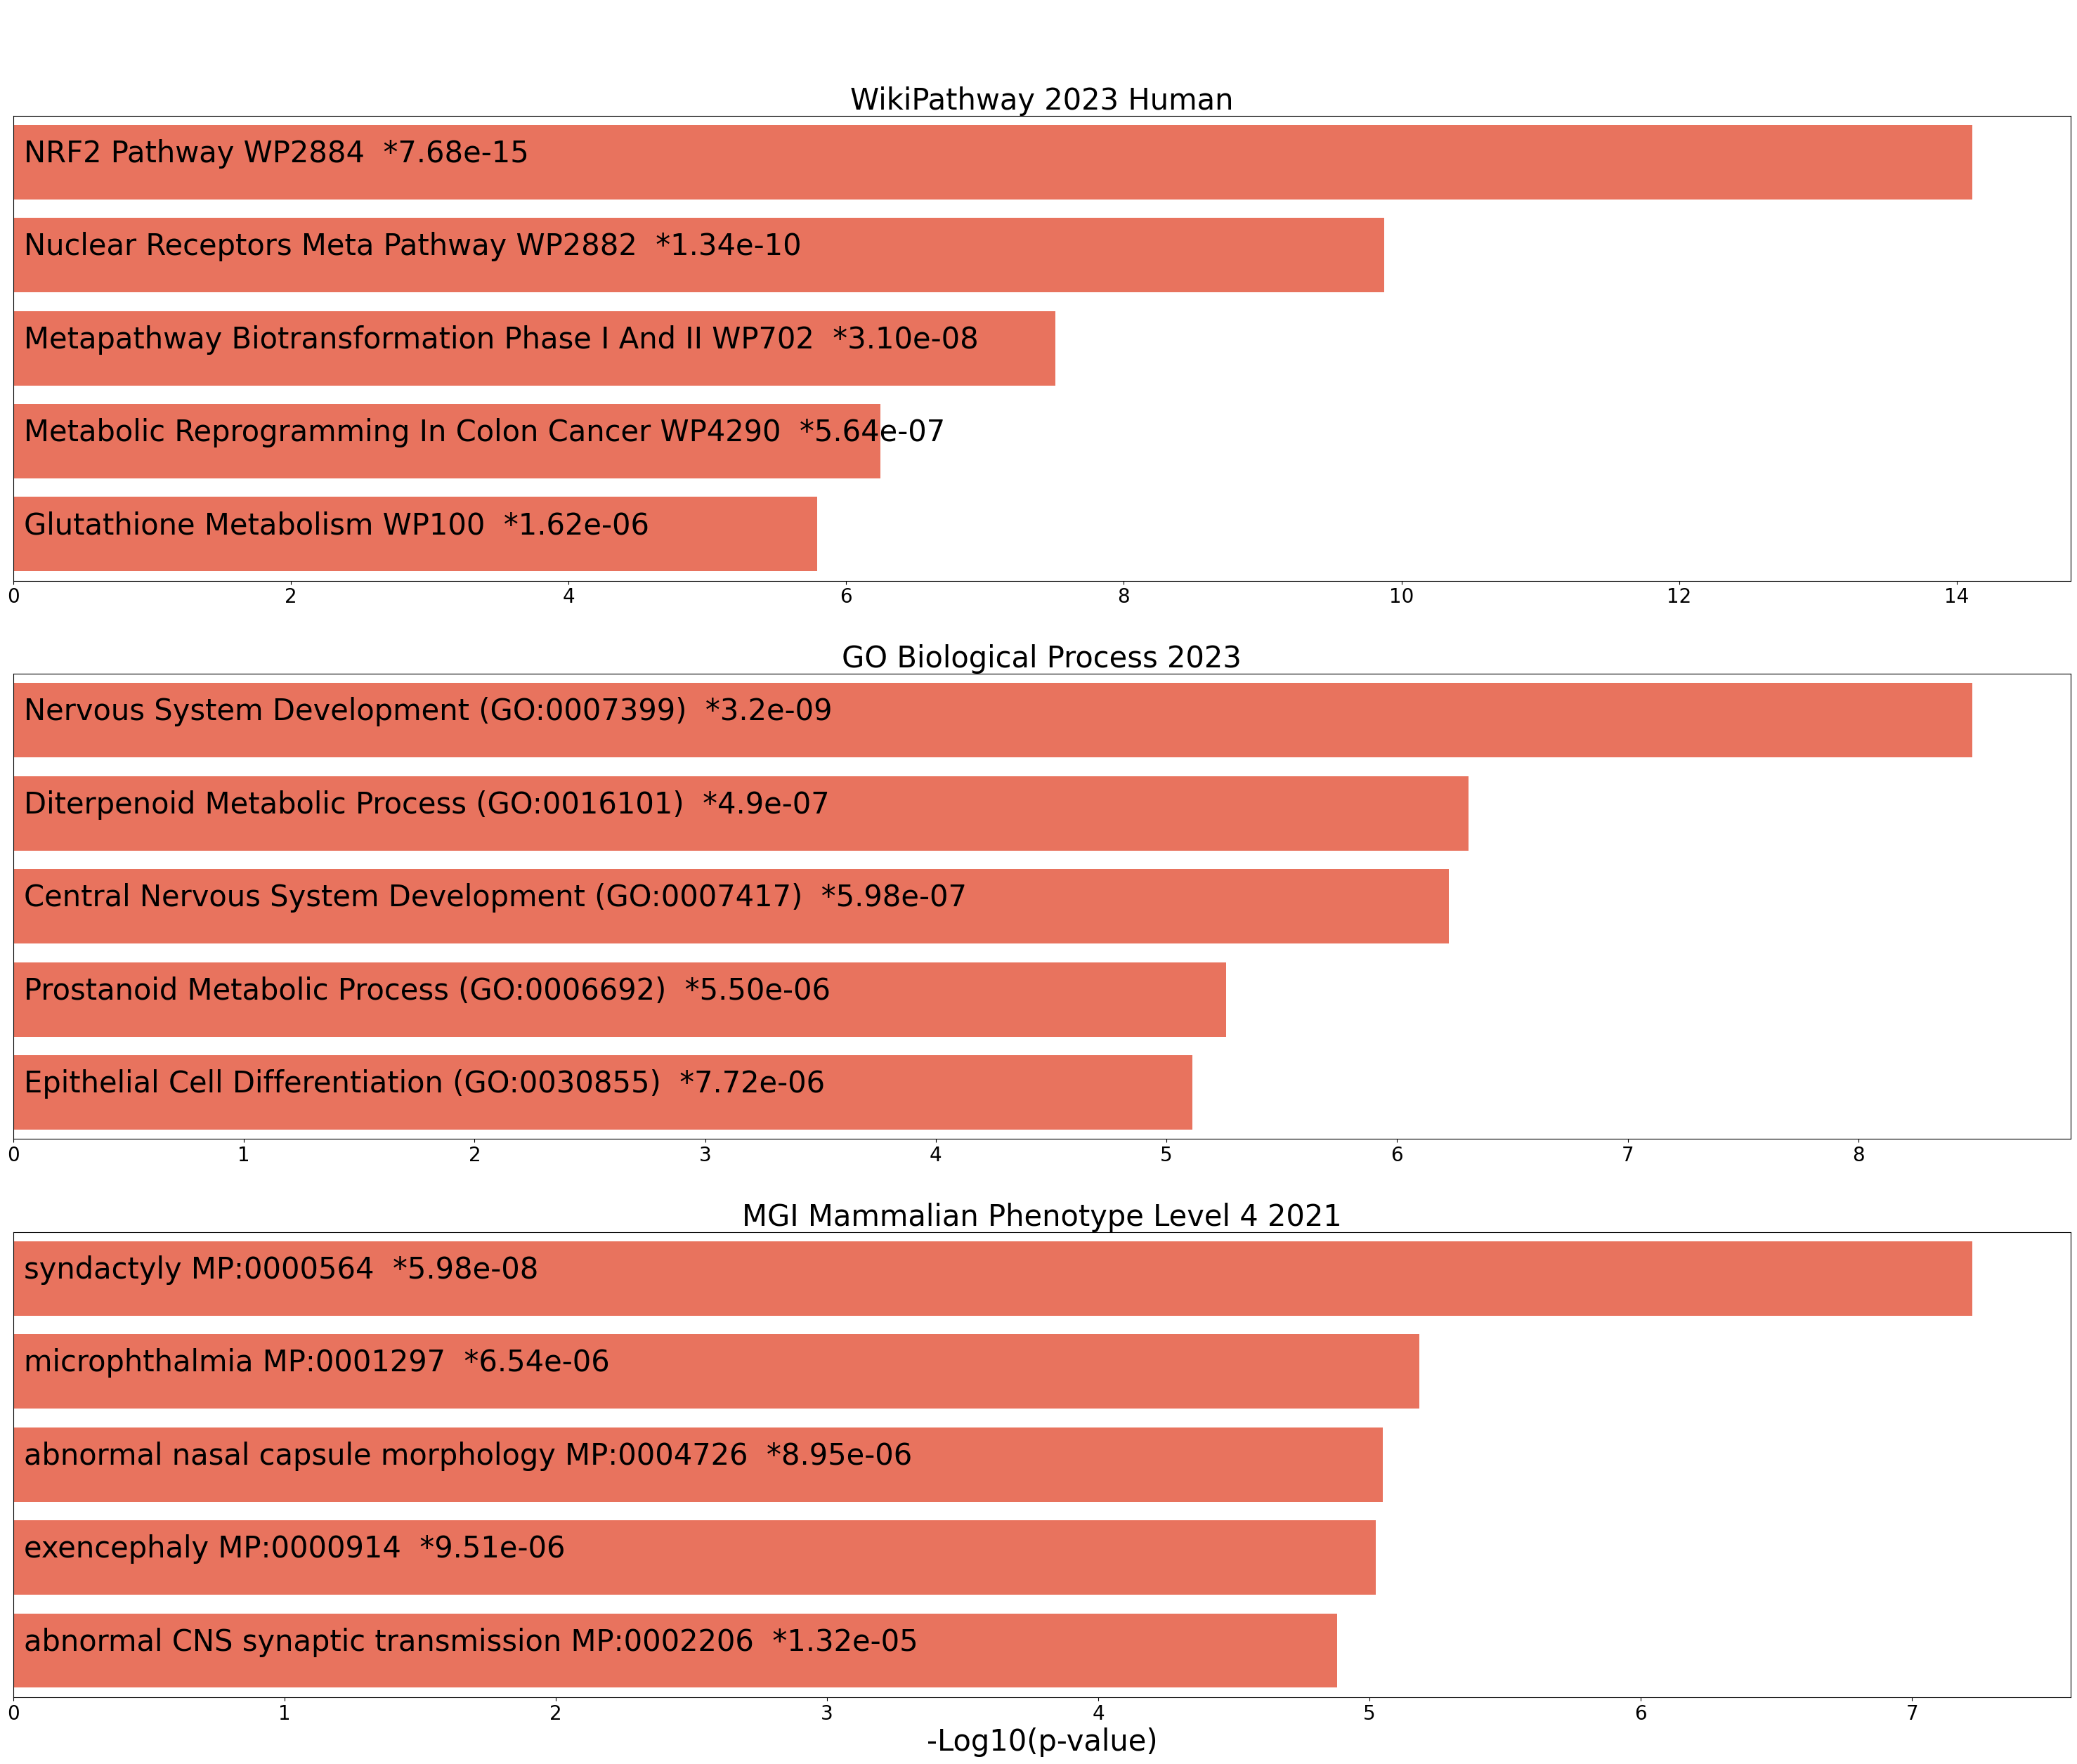

__Figure 10.__ Enrichr results for up-regulated genes in cluster 4 from GO BP, Wikipathways, and MGI. \* indicates adjusted p-value < 0.01.

/Users/giacomomarino/X2KTR/figures/enrichr_up_cluster_4.png

/Users/giacomomarino/X2KTR/figures/enrichr_up_cluster_4.svg

#### Downregulated genes

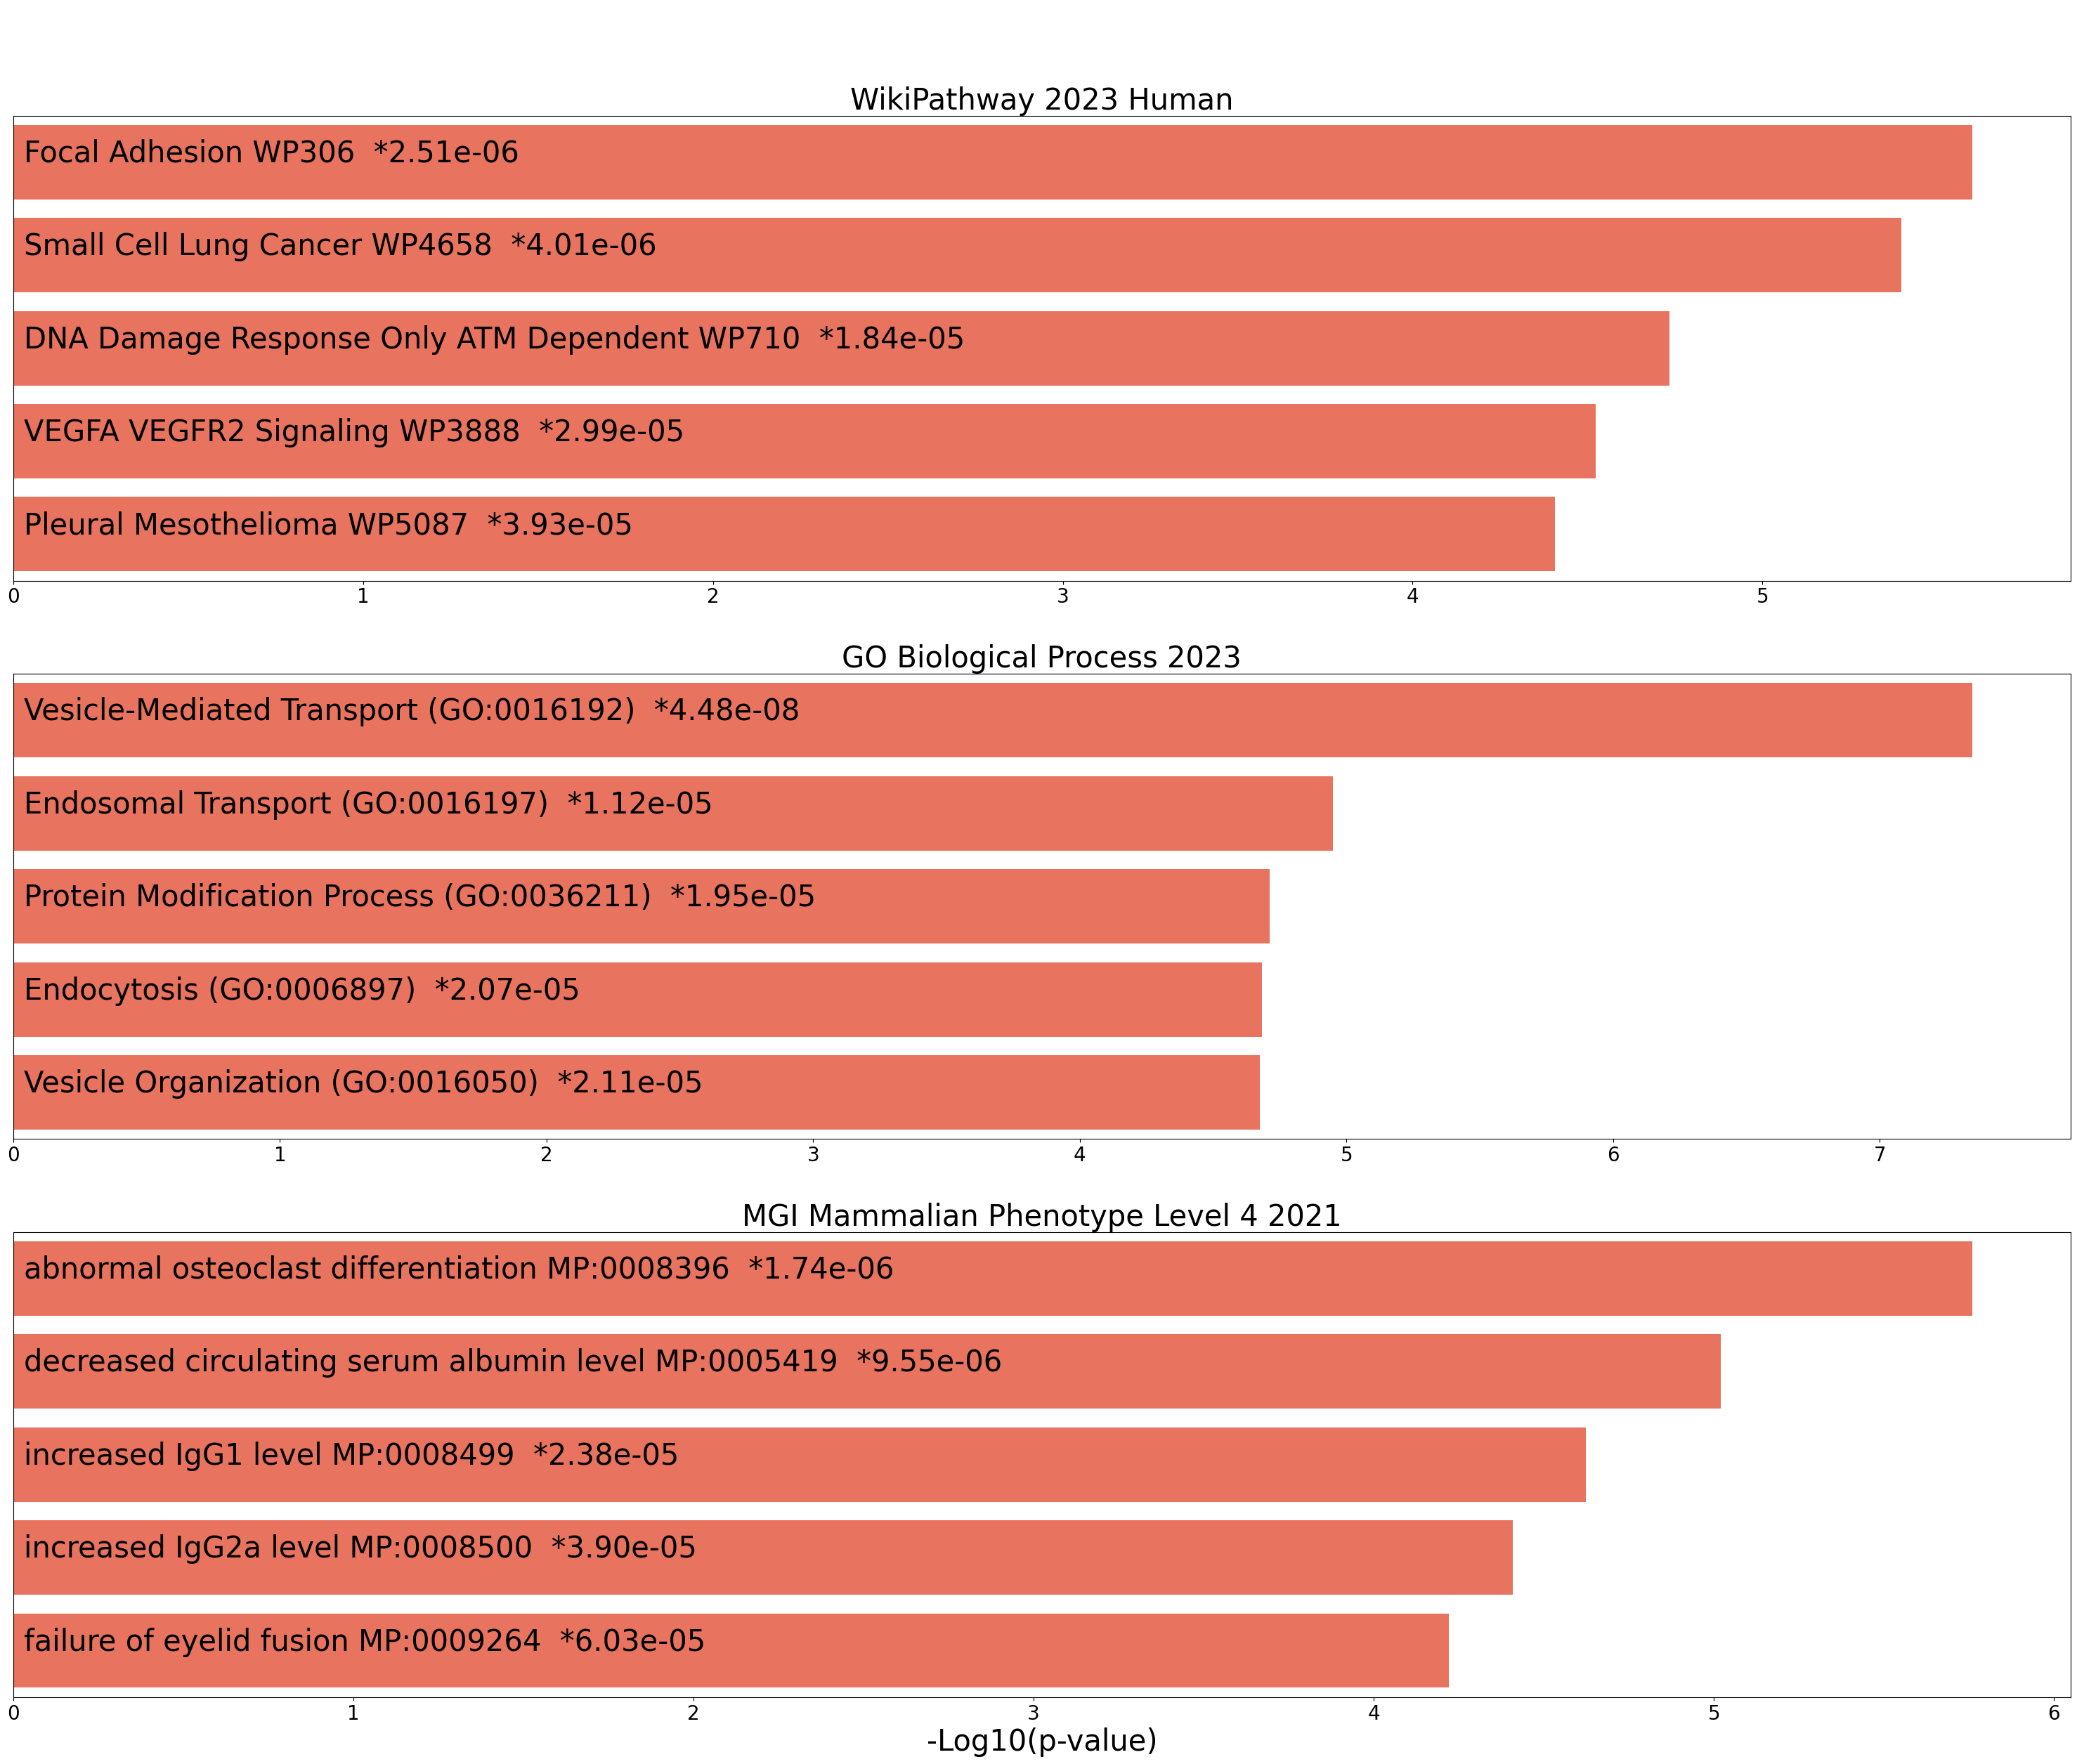

__Figure 11.__ Enrichr results for down-regulated genes in cluster 4 from GO BP, Wikipathways, and MGI. \* indicates adjusted p-value < 0.01.

/Users/giacomomarino/X2KTR/figures/enrichr_dn_cluster_4.png

/Users/giacomomarino/X2KTR/figures/enrichr_dn_cluster_4.svg

In [11]:
if has_rna_file:
    enrichr_labels = {}
    for cluster in enrichr_lists:
        enrichr_labels[cluster] = {}
        up, dn = enrichr_lists[cluster]
        display(Markdown(f'### Cluster {cluster}'))
        display(Markdown(f'#### Upregulated genes'))
        try:
            res_list = enrich_libraries(up['userListId'])
            enrichr_labels[cluster]['up'] = res_list
        except Exception as e:
            print(f'Error processing cluster {cluster} upregulated genes:', e)
        fig = enrichr_figure(res_list)
        fig.savefig(f'figures/enrichr_up_cluster_{cluster}.png', bbox_inches='tight')
        fig.savefig(f'figures/enrichr_up_cluster_{cluster}.svg', bbox_inches='tight')
        display(Markdown(f"__Figure {fig_counter}.__ Enrichr results for up-regulated genes in cluster {cluster} from GO BP, Wikipathways, and MGI. \* indicates adjusted p-value < 0.01."))
        fig_counter += 1
        display(FileLink(f'figures/enrichr_up_cluster_{cluster}.png', result_html_prefix='Enrichr figure for upregulated genes in cluster PNG: '))
        display(FileLink(f'figures/enrichr_up_cluster_{cluster}.svg', result_html_prefix='Enrichr figure for upregulated genes in cluster SVG: '))
        display(Markdown(f'#### Downregulated genes'))
        try:
            res_list = enrich_libraries(dn['userListId'])
            enrichr_labels[cluster]['down'] = res_list
        except Exception as e:
            print(f'Error processing cluster {cluster} downregulated genes:', e)
        fig = enrichr_figure(res_list)
        fig.savefig(f'figures/enrichr_dn_cluster_{cluster}.png', bbox_inches='tight')
        fig.savefig(f'figures/enrichr_dn_cluster_{cluster}.svg', bbox_inches='tight')
        display(Markdown(f"__Figure {fig_counter}.__ Enrichr results for down-regulated genes in cluster {cluster} from GO BP, Wikipathways, and MGI. \* indicates adjusted p-value < 0.01."))
        fig_counter += 1
        display(FileLink(f'figures/enrichr_dn_cluster_{cluster}.png', result_html_prefix='Enrichr figure for downregulated genes in cluster PNG: '))
        display(FileLink(f'figures/enrichr_dn_cluster_{cluster}.svg', result_html_prefix='Enrichr figure for downregulated genes in cluster SVG: '))

### Consensus Cluster Labels
We can utilize GPT-4 and significantly enriched terms from Enrichr to compute 'consensus' labels for each identified cluster.

100%|██████████| 5/5 [00:06<00:00,  1.26s/it]


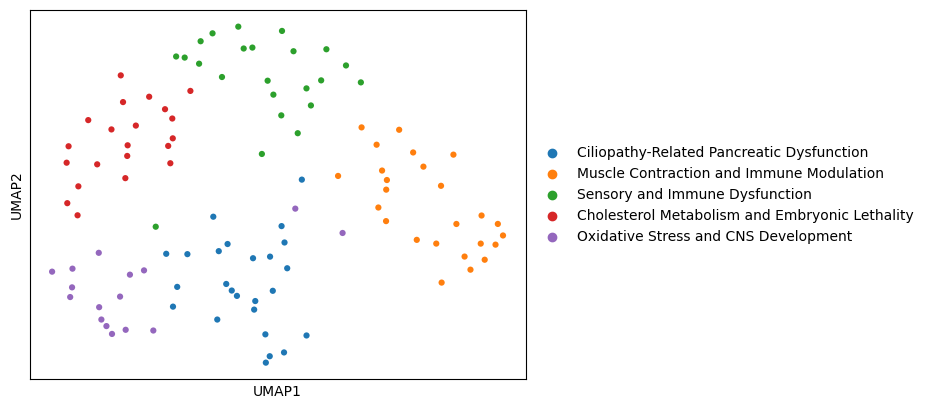

__Figure 38.__ Consensus labels created using GPT-4 and significantly enriched terms for differentially expressed genes from leiden clusters.

/Users/giacomomarino/X2KTR/figures/CPTAC3_HNSCC_tumor_counts_clusters_labeled.png

/Users/giacomomarino/X2KTR/figures/CPTAC3_HNSCC_tumor_counts_clusters_labeled.svg

<Figure size 640x480 with 0 Axes>

In [72]:
if has_rna_file:
    labels = label_clusters(enrichr_labels)
    adata.obs['label'] = adata.obs['leiden'].map(lambda c: labels.get(c, ''))
    sc.pl.umap(adata, color="label", size=80, title='')
    plt.savefig(f'figures/{rna_filename}_clusters_labeled.png', bbox_inches='tight')
    plt.savefig(f'figures/{rna_filename}_clusters_labeled.svg', bbox_inches='tight')
    display(Markdown(f"__Figure {fig_counter}.__ Consensus labels created using GPT-4 and significantly enriched terms for differentially expressed genes from leiden clusters."))
    fig_counter += 1
    display(FileLink(f'figures/{rna_filename}_clusters_labeled.png', result_html_prefix='Clusters labeled UMAP PNG: '))
    display(FileLink(f'figures/{rna_filename}_clusters_labeled.svg', result_html_prefix='Clusters labeled UMAP SVG: '))

In [73]:
%%appyter markdown
### Membrane Proteins for Screening
Membrane proteins are ideal targets. This membrane/surface protein filter was created from the intersection of two data sources:
[COMPARTMENTS](https://compartments.jensenlab.org/About) knowledge predictions for human genes where a filter was applied for "Plasma membrane" and "Cell surface" subcellular localization with a confidence score greater than or equal to 3 and [Human Protein Atlas](https://www.proteinatlas.org/) membrane proteins where a filter was applied for "Evidence at protein level" and removal of genes with "Low tissue specificity."

### Membrane Proteins for Screening
Membrane proteins are ideal targets. This membrane/surface protein filter was created from the intersection of two data sources:
[COMPARTMENTS](https://compartments.jensenlab.org/About) knowledge predictions for human genes where a filter was applied for "Plasma membrane" and "Cell surface" subcellular localization with a confidence score greater than or equal to 3 and [Human Protein Atlas](https://www.proteinatlas.org/) membrane proteins where a filter was applied for "Evidence at protein level" and removal of genes with "Low tissue specificity."

In [74]:
proteins = pd.read_csv('https://appyters.maayanlab.cloud/storage/Tumor_Gene_Target_Screener/surfaceome.csv')
membrane_proteins = list(proteins['genename'].map(lookup).dropna().values)

### Cell Surface Target Identification

By comparing the inputted samples with processed RNA-seq from several atlases containing healthy expression (GTEx [2], ARCHS4 [3], and Tabula Sapiens [4]), we identify genes that are highly expressed in the target cells while lowly expressed across normal human cell types, and tissues.

In [15]:
if has_rna_file:    
    targets = {}
    bgs = {'GTEx': 'gtex-gene-stats.tsv', 'ARCHS4': 'archs4-gene-stats.tsv', 'TS': 'ts_10x_cell-ontology-class_donors_tissue-labels_v1.tsv'}
    def find_targets(rna_df, bg, targets):
        df_bg_stats = pd.read_csv(f"https://appyters.maayanlab.cloud/storage/Tumor_Gene_Target_Screener/{bgs[bg]}", sep='\t', index_col=[0,1])
        df_bg_genes = df_bg_stats.unstack().index.map(lambda idx: lookup(idx.partition('.')[0]))
        df_bg_stats = df_bg_stats.unstack().groupby(df_bg_genes, observed=True).median().stack()
        df_bg_expr = df_bg_stats.loc[(slice(None), ['25%', '50%', '75%']), :].unstack()
        common_index = list(set(rna_df.index) & set(df_bg_expr.index))
        target_distribution = df_bg_expr.loc[common_index, :].median(axis=1)
        expr_df = rna_df.loc[common_index, :]
        expr_df.reset_index(inplace=True)
        expr_df.drop_duplicates(subset='gene_id', inplace=True)
        expr_df.set_index('gene_id', inplace=True, drop=True)
        df_expr_norm = qnorm.quantile_normalize(expr_df.loc[common_index, :], target=target_distribution)
        df_bg_expr_norm = qnorm.quantile_normalize(df_bg_expr.loc[common_index, :], target=target_distribution)
        for cluster in tqdm(clusters):
            if cluster not in targets: targets[cluster] = {}
            cluster_samples = list(leiden_df[leiden_df['leiden'] == cluster].index.values)
            with suppress_output():
                df_bg_expr_norm.columns = df_bg_expr_norm.columns.to_flat_index().map(lambda s: ', '.join(s))
                dge = limma_voom_differential_expression(
                    df_bg_expr_norm, df_expr_norm[cluster_samples],
                    voom_design=True,
                )
                targets[cluster][bg] = dge[(dge['adj.P.Val'] < 0.01) & (dge['t'] > 0)].sort_values('t', ascending=False).index.values 

In [16]:
if has_rna_file: 
    print('Finding Targets using ARCHS4')
    find_targets(rna_df, 'ARCHS4', targets)

Finding Targets using ARCHS4


100%|██████████| 5/5 [03:27<00:00, 41.49s/it]


In [17]:
if has_rna_file:    
    print('Finding Targets using GTEx')
    find_targets(rna_df, 'GTEx', targets)

Finding Targets using GTEx


100%|██████████| 5/5 [00:34<00:00,  6.87s/it]


In [18]:
if has_rna_file:      
    print('Finding Targets using Tabula Sapiens')
    find_targets(rna_df, 'TS', targets)

Finding Targets using Tabula Sapiens


100%|██████████| 5/5 [03:52<00:00, 46.54s/it]


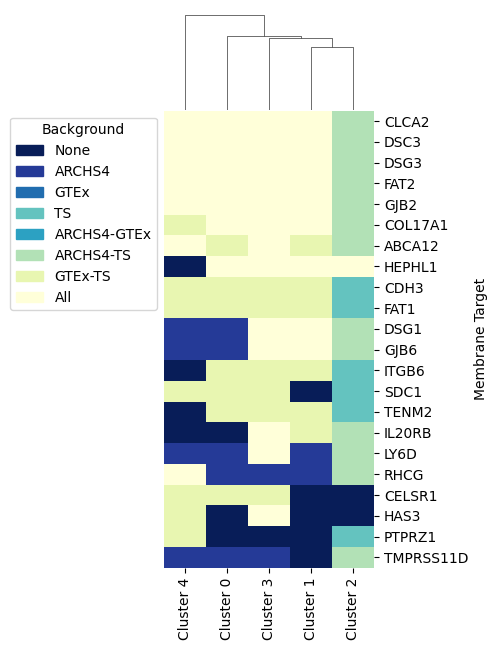

__Figure 13.__ Top 100 consensus targets for each cluster with adjusted p-value < 0.01 compared to ARCHS4, GTEx, and Tabula Sapiens (TS) healthy backgrounds with limma voom.

/Users/giacomomarino/X2KTR/results/CPTAC3_HNSCC_tumor_counts_membrane_target_mat.csv

/Users/giacomomarino/X2KTR/figures/CPTAC3_HNSCC_tumor_counts_membrane_target_matrix.png

/Users/giacomomarino/X2KTR/figures/CPTAC3_HNSCC_tumor_counts_membrane_target_matrix.svg

In [19]:
if has_rna_file:
    YlGnBu = cm.get_cmap('YlGnBu_r', 8)
    cmap = {"None":YlGnBu(0), "ARCHS4": YlGnBu(1), "GTEx":YlGnBu(2), "TS": YlGnBu(4), "ARCHS4-GTEx":YlGnBu(3),  "ARCHS4-TS": YlGnBu(5), "GTEx-TS": YlGnBu(6), "All": YlGnBu(7)}

    top_targets_n = 100
    target_list = []
    for cluster in targets:
        for bg in targets[cluster]:
            target_list.extend(list(filter(lambda g: g in membrane_proteins, targets[cluster][bg][:top_targets_n])))
    data1, data2, data3 = [], [], []
    similarity = []
    target_list = list(set(target_list))

    for gene in target_list:
        a = [1 if gene in targets[c]['ARCHS4'][:top_targets_n] else 0 for c in clusters]
        g = [2 if gene in targets[c]['GTEx'][:top_targets_n] else 0 for c in clusters]
        l = [4 if gene in targets[c]['TS'][:top_targets_n] else 0 for c in clusters]
        data1.append(a)
        data2.append(g)
        data3.append(l)
        similarity.append(np.dot(np.dot(np.array(a), np.array(g)), np.array(l)))

    data = np.add(np.add(data1, data2), data3)

    membrane_target_mat = pd.DataFrame(data)
    membrane_target_mat.columns = [f"Cluster {c}" for c in clusters]
    membrane_target_mat.index = target_list

    membrane_target_mat['count'] = membrane_target_mat.sum(axis=1)
    membrane_target_mat = membrane_target_mat[membrane_target_mat['count'] >= 7]
    membrane_target_mat = membrane_target_mat.rename_axis('Membrane Target').sort_values(by = ['count', 'Membrane Target'], ascending = [False, True]).drop('count', axis=1)

    h = membrane_target_mat.shape[0]



    g = sns.clustermap(membrane_target_mat, figsize=(4,0.3*h+2*(h<15)), cmap=YlGnBu, cbar_pos=None, dendrogram_ratio=0.1-(h<40)*0.01*(h-30), row_cluster=False, xticklabels=True, yticklabels=True, standard_scale=1)
    g.ax_row_dendrogram.legend(handles=[Rectangle((0, 0), 0, 0, color=val, label=key) for key, val in cmap.items()],
                                    title='Background', loc='upper right')

    plt.show()

    g.savefig(f'figures/{rna_filename}_membrane_target_matrix.png', dpi=300, bbox_inches='tight')
    g.savefig(f'figures/{rna_filename}_membrane_target_matrix.svg', dpi=300, bbox_inches='tight')
    membrane_target_mat.to_csv(f'results/{rna_filename}_membrane_target_mat.csv')
    display(Markdown(f"__Figure {fig_counter}.__ Top 100 consensus targets for each cluster with adjusted p-value < 0.01 compared to ARCHS4, GTEx, and Tabula Sapiens (TS) healthy backgrounds with limma voom."))
    fig_counter += 1
    display(FileLink(f'results/{rna_filename}_membrane_target_mat.csv', result_html_prefix='Download Membrane Target Matrix: '))
    display(FileLink(f'figures/{rna_filename}_membrane_target_matrix.png', result_html_prefix='Membrane Target Matrix PNG: '))
    display(FileLink(f'figures/{rna_filename}_membrane_target_matrix.svg', result_html_prefix='Membrane Target Matrix SVG: '))

### Transcription Factor Enrichment Analysis with ChEA3

To assess enriched transcription factors (TFs) from indiviudal samples, we normalize and z-score the uploaded RNA-seq data and submit upregulated and downregulated genes to ChEA3 [11] to retrieved ranked lists of TFs.

In [20]:
if has_rna_file:
    rna_df_log2_zscore = zscore(log2_normalize(rna_df), axis=0)
    rna_df_log2_zscore

In [21]:
if has_rna_file:    
    chea_res = {}
    for patient in tqdm(rna_df_log2_zscore.columns.values):
        chea_res[patient] = {}
        down_rows = rna_df_log2_zscore[patient].astype(float).sort_values(ascending=True)[:500]
        up_rows = rna_df_log2_zscore[patient].astype(float).sort_values(ascending=False)[:500]

        down_genes = list(set(down_rows.index.map(lambda g: lookup(g.split('.')[0]) if lookup(g.split('.')[0]) else g.split('.')[0])))
        up_genes = list(set(up_rows.index.map(lambda g: lookup(g.split('.')[0]) if lookup(g.split('.')[0]) else g.split('.')[0])))

        chea_down = get_chea3_results(down_genes, f'{patient}_down_genes')
        chea_up = get_chea3_results(up_genes, f'{patient}_up_genes')
        chea_res[patient]['down'] = chea_down
        chea_res[patient]['up'] = chea_up

100%|██████████| 110/110 [06:35<00:00,  3.60s/it]


#### Full ChEA Heatmap - Up Genes

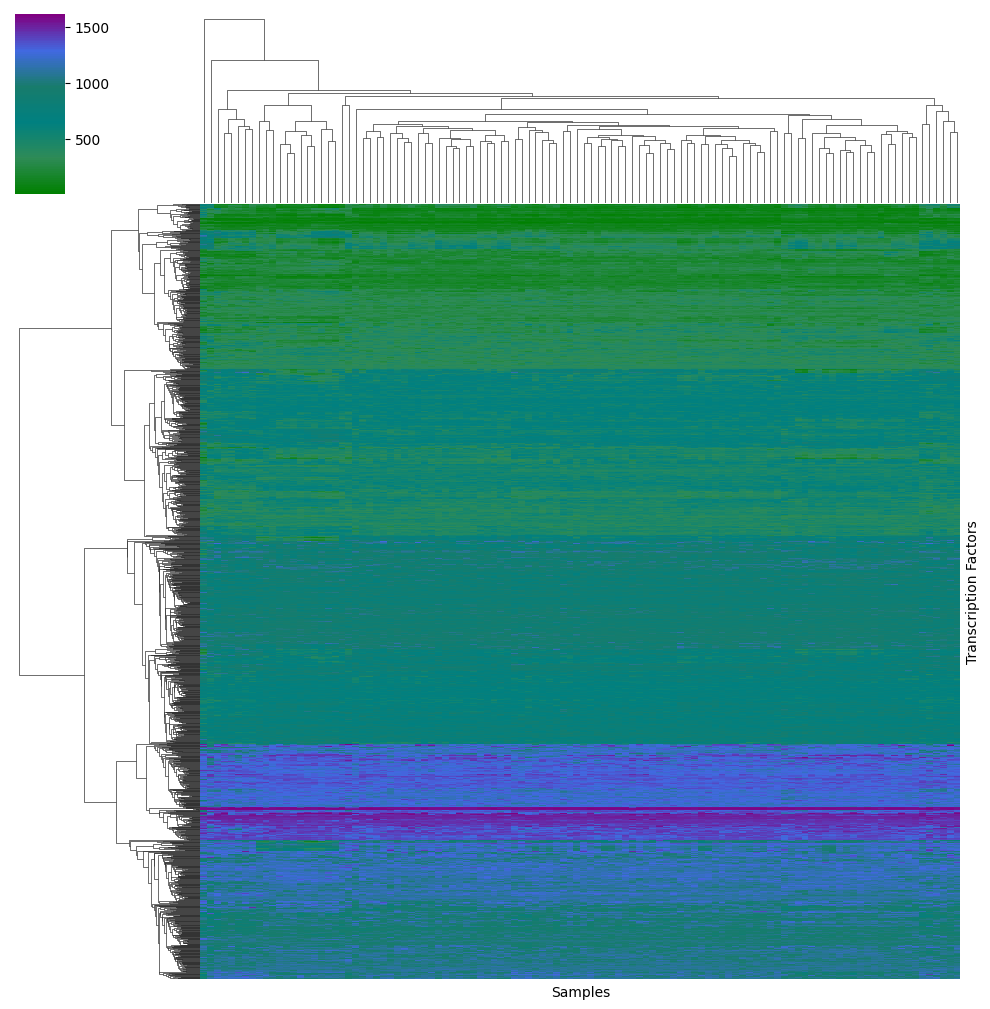

In [77]:
if has_rna_file:    
    grn_prpl_cmap = LinearSegmentedColormap.from_list('grn_scale', ["green", "seagreen", "teal", "#187c6c", "royalblue", "purple"], N=100)
    up_chea_comb = pd.concat([chea_res[p]['up'] for p in chea_res], axis=1)
    g = sns.clustermap(up_chea_comb.astype(float), cmap=grn_prpl_cmap, xticklabels=False, yticklabels=False)
    ax = g.ax_heatmap
    ax.set_ylabel('Transcription Factors')
    ax.set_xlabel('Samples')
    g.savefig(f'figures/{rna_filename}_chea_up_heatmap.png', dpi=300, bbox_inches='tight')
    g.savefig(f'figures/{rna_filename}_chea_up_heatmap.svg', dpi=300, bbox_inches='tight')

In [80]:
if has_rna_file:
    display(Markdown(f"__Figure {fig_counter}.__ Integrated Mean Rank from ChEA3 from up-regulated genes for all samples and all transcription factors based on z-scored expression."))
    fig_counter += 1
    display(FileLink(f'figures/{rna_filename}_chea_up_heatmap.png', result_html_prefix='ChEA3 Up Heatmap PNG: '))
    display(FileLink(f'figures/{rna_filename}_chea_up_heatmap.svg', result_html_prefix='ChEA3 Up Heatmap SVG: '))

__Figure 40.__ Integrated Mean Rank from ChEA3 from up-regulated genes for all samples and all transcription factors based on z-scored expression.

/Users/giacomomarino/X2KTR/figures/CPTAC3_HNSCC_tumor_counts_chea_up_heatmap.png

/Users/giacomomarino/X2KTR/figures/CPTAC3_HNSCC_tumor_counts_chea_up_heatmap.svg

### Top 20 Variable TFs - ChEA Heatmap (Up Genes)

__Figure 15.__ Integrated Mean Rank from ChEA3 from up-regulated genes for all samples and the top 20 most variable transcription factors based on z-scored expression.

/Users/giacomomarino/X2KTR/figures/CPTAC3_HNSCC_tumor_counts_top_var_tfs_up_heatmap.png

/Users/giacomomarino/X2KTR/figures/CPTAC3_HNSCC_tumor_counts_top_var_tfs_up_heatmap.svg

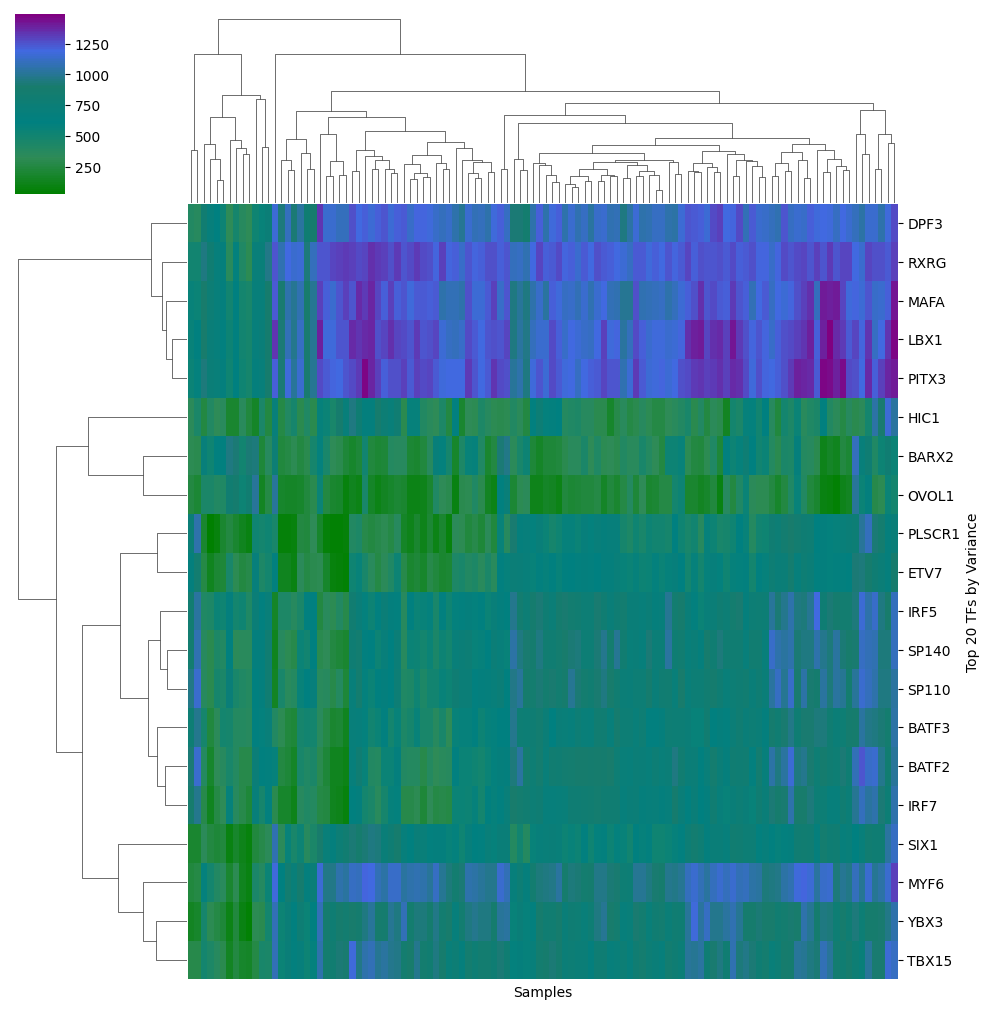

In [23]:
if has_rna_file: 
    top_20_var_tfs = up_chea_comb.var(axis=1).sort_values(ascending=False).index[:20]
    g = sns.clustermap(up_chea_comb.loc[top_20_var_tfs].astype(float), cmap=grn_prpl_cmap, xticklabels=False)
    ax = g.ax_heatmap
    ax.set_ylabel('Top 20 TFs by Variance')
    ax.set_xlabel('Samples')
    g.savefig(f'figures/{rna_filename}_top_var_tfs_up_heatmap.png', dpi=300, bbox_inches='tight')
    g.savefig(f'figures/{rna_filename}_top_var_tfs_up_heatmap.svg', dpi=300, bbox_inches='tight')

In [81]:
if has_rna_file:    
    display(Markdown(f"__Figure {fig_counter}.__ Integrated Mean Rank from ChEA3 from up-regulated genes for all samples and the top 20 most variable transcription factors based on z-scored expression."))
    fig_counter += 1
    display(FileLink(f'figures/{rna_filename}_top_var_tfs_up_heatmap.png', result_html_prefix='Most Variable TFs Heatmap (up genes) PNG: '))
    display(FileLink(f'figures/{rna_filename}_top_var_tfs_up_heatmap.svg', result_html_prefix='Most Variable TFs Heatmap (up genes) SVG: '))

__Figure 41.__ Integrated Mean Rank from ChEA3 from up-regulated genes for all samples and the top 20 most variable transcription factors based on z-scored expression.

/Users/giacomomarino/X2KTR/figures/CPTAC3_HNSCC_tumor_counts_top_var_tfs_up_heatmap.png

/Users/giacomomarino/X2KTR/figures/CPTAC3_HNSCC_tumor_counts_top_var_tfs_up_heatmap.svg

#### Full ChEA Heatmap - Down Genes

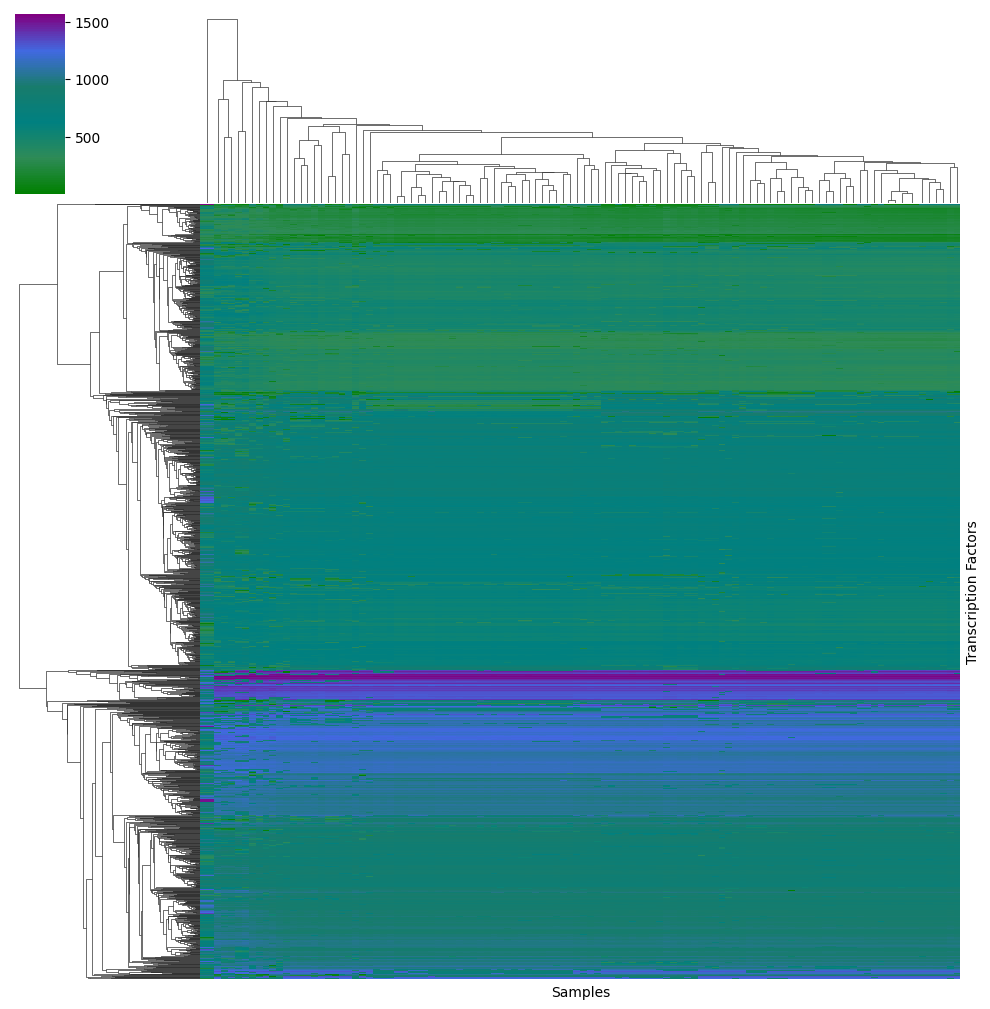

In [82]:
if has_rna_file:    
    down_chea_comb = pd.concat([chea_res[p]['down'] for p in chea_res], axis=1)
    g = sns.clustermap(down_chea_comb.astype(float), cmap=grn_prpl_cmap, xticklabels=False, yticklabels=False)
    ax = g.ax_heatmap
    ax.set_ylabel('Transcription Factors')
    ax.set_xlabel('Samples')
    g.savefig(f'figures/{rna_filename}_chea_dn_heatmap.png', dpi=300, bbox_inches='tight')
    g.savefig(f'figures/{rna_filename}_chea_dn_heatmap.svg', dpi=300, bbox_inches='tight')

In [83]:
if has_rna_file:    
    display(Markdown(f"__Figure {fig_counter}.__ Integrated Mean Rank from ChEA3 from down-regulated genes for all samples and all transcription factors based on z-scored expression."))
    fig_counter += 1
    display(FileLink(f'figures/{rna_filename}_chea_dn_heatmap.png', result_html_prefix='ChEA3 Down Heatmap PNG: '))
    display(FileLink(f'figures/{rna_filename}_chea_dn_heatmap.svg', result_html_prefix='ChEA3 Down Heatmap SVG: ')) 

__Figure 42.__ Integrated Mean Rank from ChEA3 from down-regulated genes for all samples and all transcription factors based on z-scored expression.

/Users/giacomomarino/X2KTR/figures/CPTAC3_HNSCC_tumor_counts_chea_dn_heatmap.png

/Users/giacomomarino/X2KTR/figures/CPTAC3_HNSCC_tumor_counts_chea_dn_heatmap.svg

### Top 20 Variable TFs - ChEA Heatmap (Down Genes)

__Figure 17.__ Integrated Mean Rank from ChEA3 from down-regulated genes for all samples and the top 20 most variable transcription factors based on z-scored expression.

/Users/giacomomarino/X2KTR/figures/CPTAC3_HNSCC_tumor_counts_top_var_tfs_dn_heatmap.png

/Users/giacomomarino/X2KTR/figures/CPTAC3_HNSCC_tumor_counts_top_var_tfs_dn_heatmap.svg

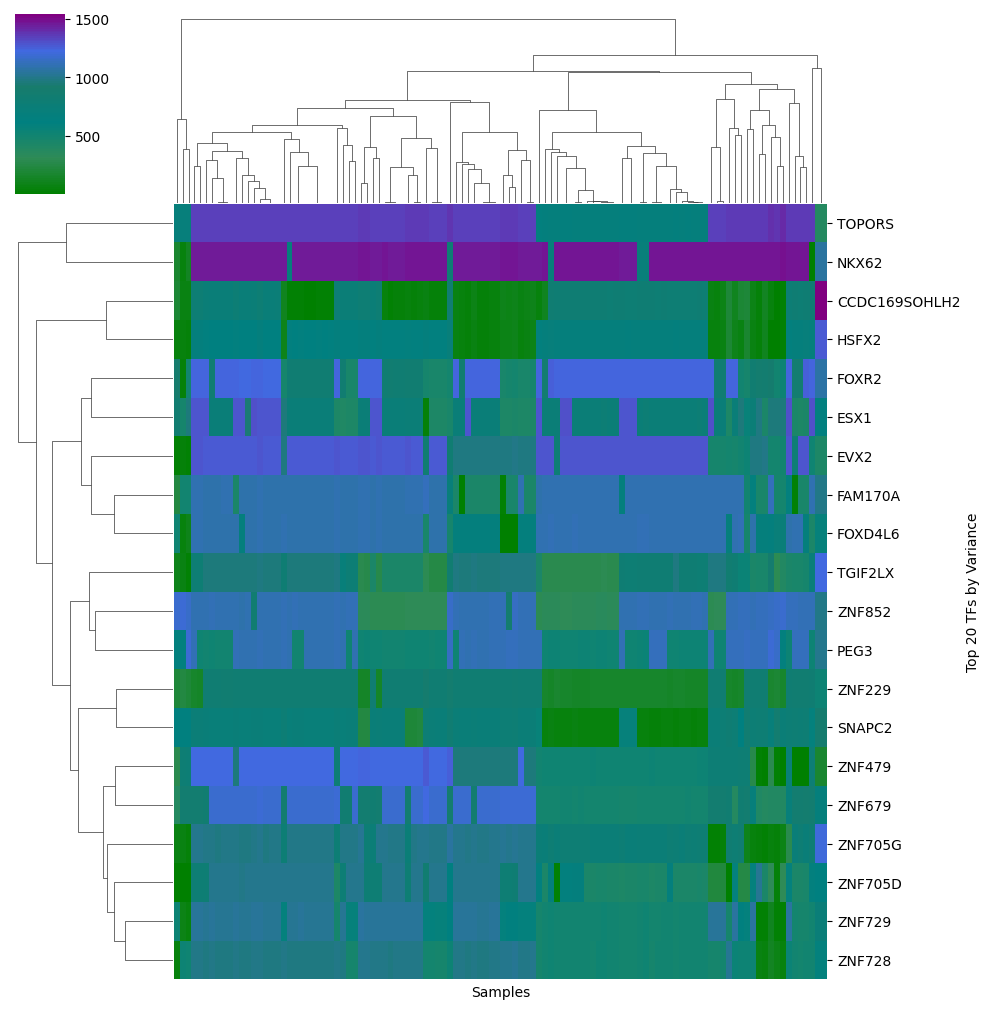

In [25]:
if has_rna_file:    
    top_20_var_tfs = down_chea_comb.var(axis=1).sort_values(ascending=False).index[:20]
    g = sns.clustermap(down_chea_comb.loc[top_20_var_tfs].astype(float), cmap=grn_prpl_cmap, xticklabels=False)
    ax = g.ax_heatmap
    ax.set_ylabel('Top 20 TFs by Variance')
    ax.set_xlabel('Samples')
    g.savefig(f'figures/{rna_filename}_top_var_tfs_dn_heatmap.png', dpi=300, bbox_inches='tight')
    g.savefig(f'figures/{rna_filename}_top_var_tfs_dn_heatmap.svg', dpi=300, bbox_inches='tight')

In [84]:
if has_rna_file:    
    display(Markdown(f"__Figure {fig_counter}.__ Integrated Mean Rank from ChEA3 from down-regulated genes for all samples and the top 20 most variable transcription factors based on z-scored expression."))
    fig_counter += 1
    display(FileLink(f'figures/{rna_filename}_top_var_tfs_dn_heatmap.png', result_html_prefix='Most Variable TFs Heatmap (down genes) PNG: '))
    display(FileLink(f'figures/{rna_filename}_top_var_tfs_dn_heatmap.svg', result_html_prefix='Most Variable TFs Heatmap (down genes) SVG: '))

__Figure 43.__ Integrated Mean Rank from ChEA3 from down-regulated genes for all samples and the top 20 most variable transcription factors based on z-scored expression.

/Users/giacomomarino/X2KTR/figures/CPTAC3_HNSCC_tumor_counts_top_var_tfs_dn_heatmap.png

/Users/giacomomarino/X2KTR/figures/CPTAC3_HNSCC_tumor_counts_top_var_tfs_dn_heatmap.svg

### Compute TF intermediates using Geneshot and ARCHS4 Coexpression

To identify potential intermediates between transcription factors and upstream kinases we utilize Geneshot[12] to augment our enriched transcription factor lists with co-expression from ARCHS4[9]. 

In [26]:
if has_rna_file:    
    ids = list(chea_res.keys())

    n_TFs = 20

    up_TFs = {}
    up_intermediates = {}
    with tqdm(total=len(ids)) as pbar:
        pbar.set_description("Augmenting TFs from up-genes...")
        for id in ids:
            up_TFs[id] = chea_res[id]['up'].astype(float).sort_values(by='Score', ascending=True).index[:n_TFs].to_list()
            up_intermediates[id] = geneshot_set_augment(gene_list=up_TFs[id])
            pbar.update(1)
    up_TFs = pd.DataFrame(up_TFs)
    up_intermediates = pd.DataFrame(up_intermediates)
    up_TFs.to_csv(f"results/up_TFs.csv", index=False)
    up_intermediates.to_csv(f"results/up_intermediates.csv", index=False)

    dn_TFs = {}
    dn_intermediates = {}
    with tqdm(total=len(ids)) as pbar:
        pbar.set_description("Augmenting TFs from down-genes...")
        for id in ids:
            dn_TFs[id] = chea_res[id]['down'].astype(float).sort_values(by='Score', ascending=True).index[:n_TFs].to_list()
            dn_intermediates[id] = geneshot_set_augment(gene_list=dn_TFs[id])
            pbar.update(1)
    dn_TFs = pd.DataFrame(dn_TFs)
    dn_intermediates = pd.DataFrame(dn_intermediates)
    dn_TFs.to_csv(f"results/dn_TFs.csv", index=False)
    dn_intermediates.to_csv(f"results/dn_intermediates.csv", index=False)

Augmenting TFs from down-genes...: 100%|██████████| 110/110 [02:51<00:00,  1.56s/it]


### Infer Kinases using KEA3 from TFs + Intermediates

To infer upstream kinases in the X2K (Expression to Kinases) pipeline we can then use the coexpressed intermediates and enriched transcription factors to infer kinases using KEA3[13].

In [27]:
if has_rna_file:    
    # Compute normalized kinase enrichment scores
    up_kinases = {}
    dn_kinases = {}
    x2k_up = {}
    x2k_dn = {}

    with tqdm(total=len(ids)) as pbar:
        pbar.set_description("Computing RNA-seq derived KEA scores...")
        for id in ids:
            up_geneset = list(set(list(up_TFs[id]) + list(up_intermediates[id])))
            dn_geneset = list(set(list(dn_TFs[id]) + list(dn_intermediates[id])))
            up_results = get_kea3_results(up_geneset)
            dn_results = get_kea3_results(dn_geneset)
            up_kinases[id] = up_results.astype(float).sort_values(by="Score", ascending=True).index.to_list()
            dn_kinases[id] = dn_results.astype(float).sort_values(by="Score", ascending=True).index.to_list()
            if len(x2k_up) == 0:
                KINASES = up_results.Score.index.to_list()
            x2k_up[id] = up_results.Score.loc[KINASES]
            x2k_dn[id] = dn_results.Score.loc[KINASES]
            pbar.update(1)

    pd.DataFrame(up_kinases).to_csv(f"results/up_kinases.csv", index=False)
    pd.DataFrame(dn_kinases).to_csv(f"results/dn_kinases.csv", index=False)
    x2k_up = pd.DataFrame(x2k_up, index=KINASES)
    x2k_dn = pd.DataFrame(x2k_dn, index=KINASES)
    x2k_up.to_csv(f"results/up_x2k_meanRank.csv")
    x2k_dn.to_csv(f"results/dn_x2k_meanRank.csv")

Computing RNA-seq derived KEA scores...: 100%|██████████| 110/110 [01:27<00:00,  1.26it/s]


#### X2K Heatmap - Up Genes

__Figure 18.__ Results of X2K (Expression2Kinases) pipeline for up-regulated genes visualized as hierarchically clustered heatmap for all kinases.

/Users/giacomomarino/X2KTR/figures/CPTAC3_HNSCC_tumor_counts_x2k_up_heatmap.png

/Users/giacomomarino/X2KTR/figures/CPTAC3_HNSCC_tumor_counts_x2k_up_heatmap.svg

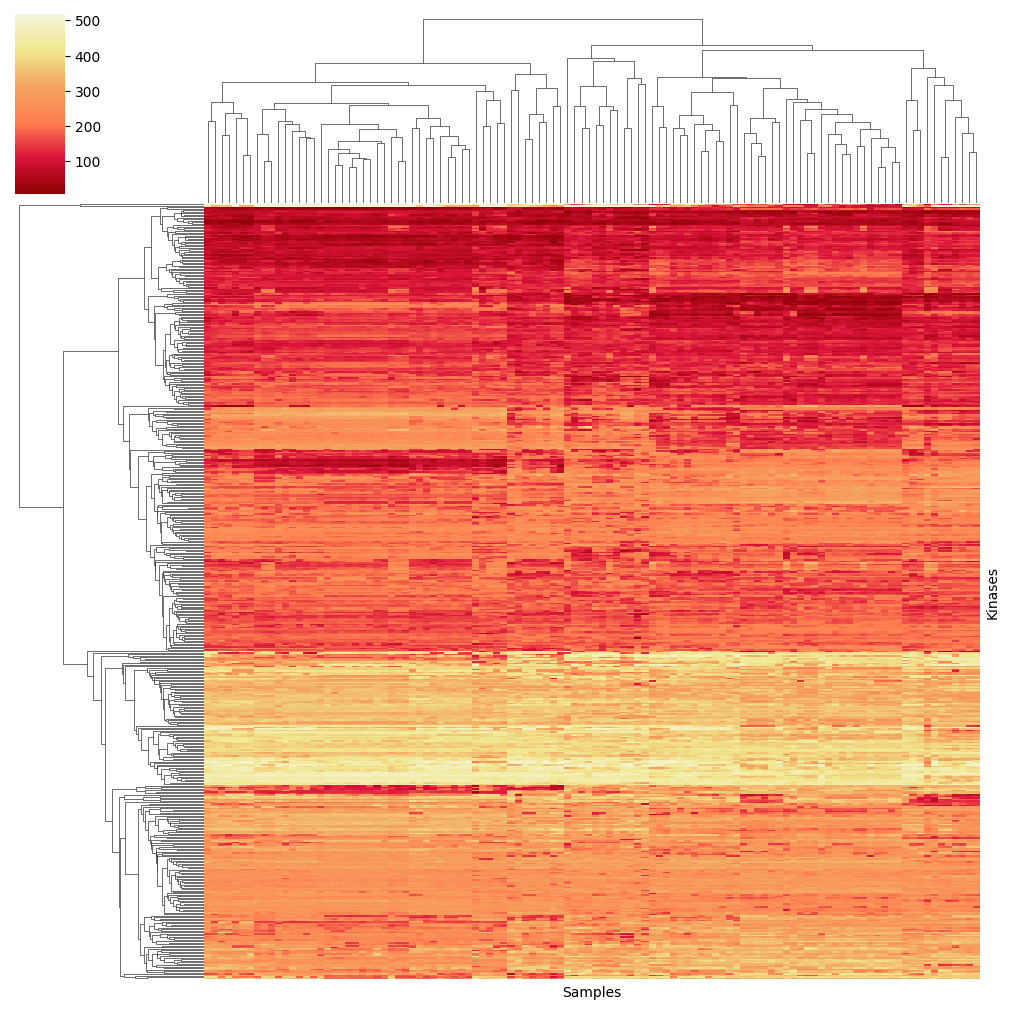

In [28]:
if has_rna_file:
    rd_ylw_cmap = LinearSegmentedColormap.from_list('red_scale', ["darkred", "crimson", "coral", "sandybrown", "khaki", "beige"], N=100)    
    g = sns.clustermap(x2k_up.astype(float), cmap=rd_ylw_cmap, xticklabels=False, yticklabels=False)
    ax = g.ax_heatmap
    ax.set_ylabel('Kinases')
    ax.set_xlabel('Samples')
    g.savefig(f'figures/{rna_filename}_x2k_up_heatmap.png', dpi=300, bbox_inches='tight')
    g.savefig(f'figures/{rna_filename}_x2k_up_heatmap.svg', dpi=300, bbox_inches='tight')

In [ ]:
if has_rna_file:    
    display(Markdown(f"__Figure {fig_counter}.__ Results of X2K (Expression2Kinases) pipeline for up-regulated genes visualized as hierarchically clustered heatmap for all kinases."))
    fig_counter += 1
    display(FileLink(f'figures/{rna_filename}_x2k_up_heatmap.png', result_html_prefix='X2K Up Heatmap PNG: '))
    display(FileLink(f'figures/{rna_filename}_x2k_up_heatmap.svg', result_html_prefix='X2K Up Heatmap SVG: '))

#### X2K Heatmap Top 20 Variable Kinases - Up Genes

__Figure 19.__ Results of X2K (Expression2Kinases) pipeline for up-regulated genes visualized as hierarchically clustered heatmap for 20 most variable kinases.

/Users/giacomomarino/X2KTR/figures/CPTAC3_HNSCC_tumor_counts_x2k_up_top20_heatmap.png

/Users/giacomomarino/X2KTR/figures/CPTAC3_HNSCC_tumor_counts_x2k_up_top20_heatmap.svg

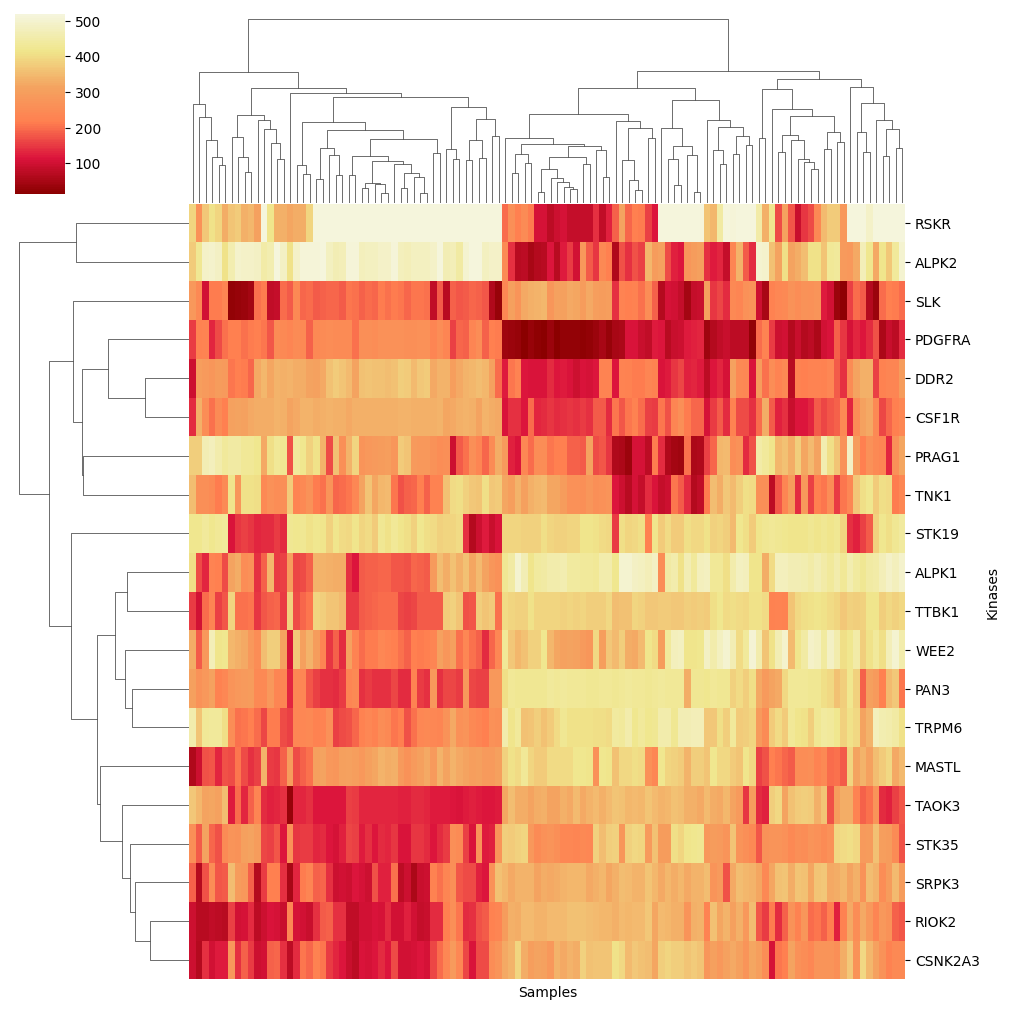

In [29]:
if has_rna_file:    
    top_20_var_x2k = x2k_up.var(axis=1).sort_values(ascending=False).index[:20]
    g = sns.clustermap(x2k_up.loc[top_20_var_x2k].astype(float), cmap=rd_ylw_cmap, xticklabels=False)
    ax = g.ax_heatmap
    ax.set_ylabel('Kinases')
    ax.set_xlabel('Samples')
    g.savefig(f'figures/{rna_filename}_x2k_up_top20_heatmap.png', dpi=300, bbox_inches='tight')
    g.savefig(f'figures/{rna_filename}_x2k_up_top20_heatmap.svg', dpi=300, bbox_inches='tight')

In [ ]:
if has_rna_file:
    display(Markdown(f"__Figure {fig_counter}.__ Results of X2K (Expression2Kinases) pipeline for up-regulated genes visualized as hierarchically clustered heatmap for 20 most variable kinases."))
    fig_counter += 1
    display(FileLink(f'figures/{rna_filename}_x2k_up_top20_heatmap.png', result_html_prefix='X2K Up Top 20 Kinases Heatmap PNG: '))
    display(FileLink(f'figures/{rna_filename}_x2k_up_top20_heatmap.svg', result_html_prefix='X2K Up Top 20 Kinases Heatmap SVG: ')) 

#### X2K Heatmap - Down Genes

__Figure 20.__ Results of X2K (Expression2Kinases) pipeline for down-regulated genes visualized as hierarchically clustered heatmap for all kinases.

/Users/giacomomarino/X2KTR/figures/CPTAC3_HNSCC_tumor_counts_x2k_dn_heatmap.png

/Users/giacomomarino/X2KTR/figures/CPTAC3_HNSCC_tumor_counts_x2k_dn_heatmap.svg

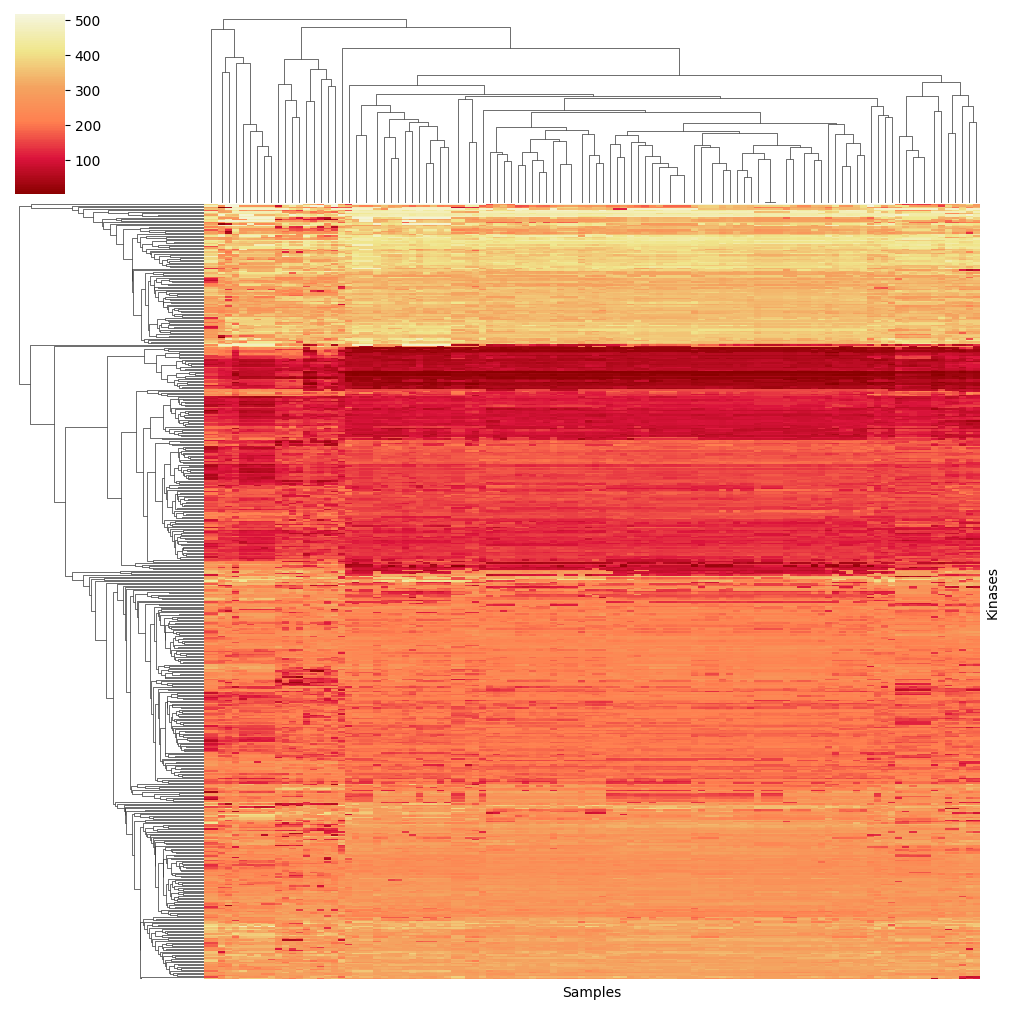

In [30]:
if has_rna_file:    
    g = sns.clustermap(x2k_dn.astype(float), cmap=rd_ylw_cmap, xticklabels=False, yticklabels=False)
    ax = g.ax_heatmap
    ax.set_ylabel('Kinases')
    ax.set_xlabel('Samples')
    g.savefig(f'figures/{rna_filename}_x2k_dn_heatmap.png', dpi=300, bbox_inches='tight')
    g.savefig(f'figures/{rna_filename}_x2k_dn_heatmap.svg', dpi=300, bbox_inches='tight')

In [ ]:
if has_rna_file:
    display(Markdown(f"__Figure {fig_counter}.__ Results of X2K (Expression2Kinases) pipeline for down-regulated genes visualized as hierarchically clustered heatmap for all kinases."))
    fig_counter += 1
    display(FileLink(f'figures/{rna_filename}_x2k_dn_heatmap.png', result_html_prefix='X2K Down Heatmap PNG: '))
    display(FileLink(f'figures/{rna_filename}_x2k_dn_heatmap.svg', result_html_prefix='X2K Down Heatmap SVG: '))

#### X2K Heatmap Top 20 Variable Kinases - Down Genes

__Figure 21.__ Results of X2K (Expression2Kinases) pipeline for down-regulated genes visualized as hierarchically clustered heatmap for 20 most variable kinases.

/Users/giacomomarino/X2KTR/figures/CPTAC3_HNSCC_tumor_counts_x2k_dn_top20_heatmap.png

/Users/giacomomarino/X2KTR/figures/CPTAC3_HNSCC_tumor_counts_x2k_dn_top20_heatmap.svg

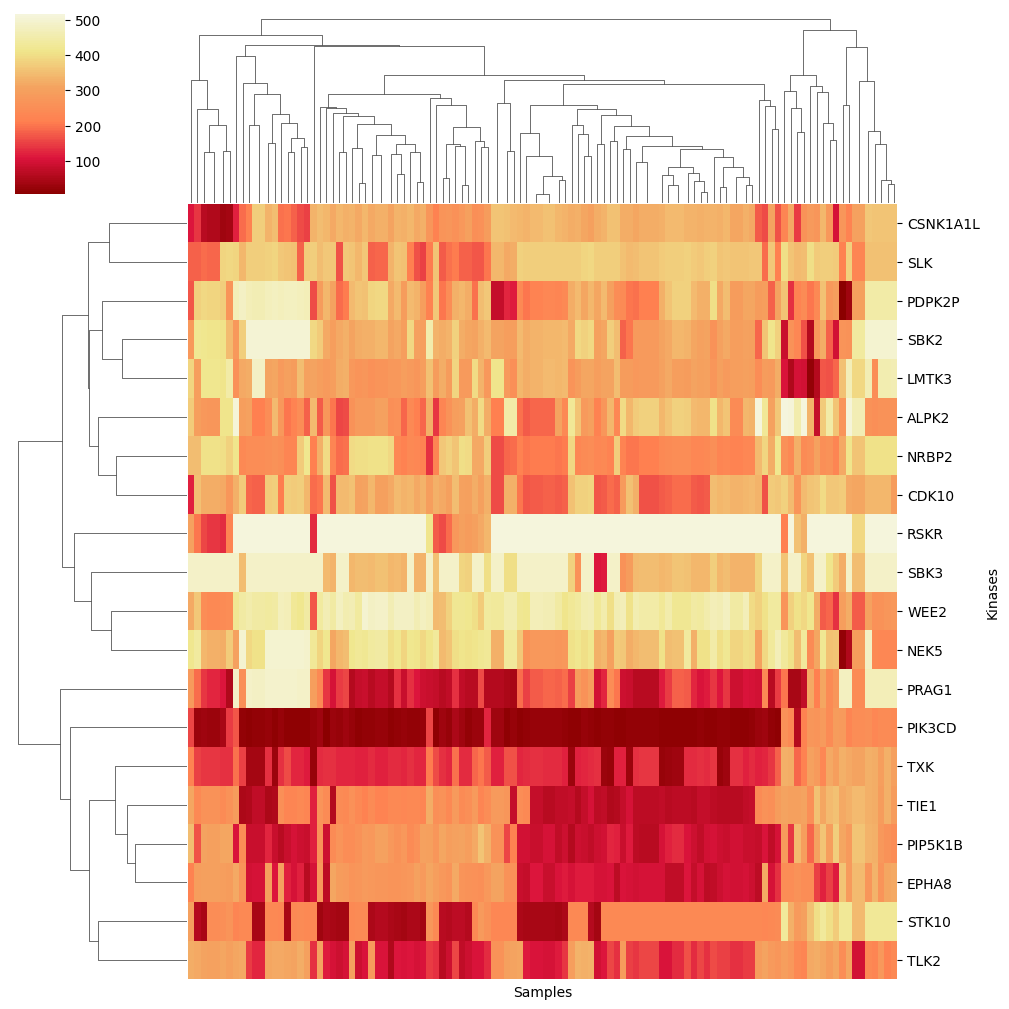

In [31]:
if has_rna_file:    
    top_20_var_x2k = x2k_dn.var(axis=1).sort_values(ascending=False).index[:20]
    g = sns.clustermap(x2k_dn.loc[top_20_var_x2k].astype(float), cmap=rd_ylw_cmap, xticklabels=False)
    ax = g.ax_heatmap
    ax.set_ylabel('Kinases')
    ax.set_xlabel('Samples')
    g.savefig(f'figures/{rna_filename}_x2k_dn_top20_heatmap.png', dpi=300, bbox_inches='tight')
    g.savefig(f'figures/{rna_filename}_x2k_dn_top20_heatmap.svg', dpi=300, bbox_inches='tight')

In [ ]:
if has_rna_file:
    display(Markdown(f"__Figure {fig_counter}.__ Results of X2K (Expression2Kinases) pipeline for down-regulated genes visualized as hierarchically clustered heatmap for 20 most variable kinases."))
    fig_counter += 1
    display(FileLink(f'figures/{rna_filename}_x2k_dn_top20_heatmap.png', result_html_prefix='X2K Down Top 20 Kinases Heatmap PNG: '))
    display(FileLink(f'figures/{rna_filename}_x2k_dn_top20_heatmap.svg', result_html_prefix='X2K Down Top 20 Kinases Heatmap SVG: '))

### Visualize Common X2K Pathways

X2K-inferred pathways are patient-specific, but to understand disease-level signaling mechanisms, it can be useful to identify the pathways that are most commonly predicted across the entire patient cohort.

#### Pathways inferred from up-genes:

Total N: 110
Edge weight threshold: 64


__Figure 22.__ Visualization of pathways commonly identified from up-genes.

/Users/giacomomarino/X2KTR/figures/up_x2k_pathways.png

/Users/giacomomarino/X2KTR/figures/up_x2k_pathways.png

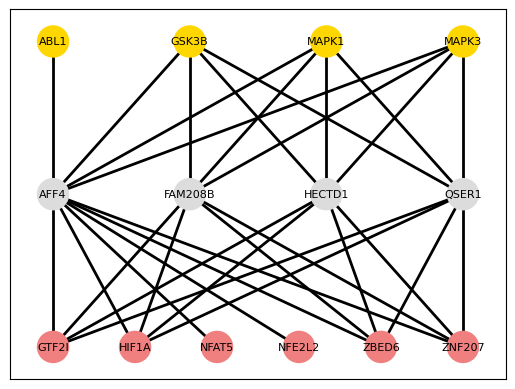

In [32]:
if has_rna_file:
    rank_threshold = 30 # cut-off of top-ranked kinases considered as enriched in a sample
    n_edges = 30 # desired number of edges to show in the plot
    dir = "up" # enrichment direction to visualize
    kinase_col = "#FFD700" # kinase color
    tf_col = "#F08080" # TF color

    # Build network 
    edges_df = pd.DataFrame(columns=['target', 'source'])
    nodes_df = pd.DataFrame(columns=['id', 'type', 'color'])

    TFs = pd.read_csv(f"results/{dir}_TFs.csv")
    intermediates = pd.read_csv(f"results/{dir}_intermediates.csv")
    kinases = pd.read_csv(f"results/{dir}_kinases.csv")
    samples = kinases.columns.to_list()

    TRANSCRIPTION_FACTORS = TFs.to_numpy().flatten().tolist()
    KINASES = kinases.to_numpy().flatten().tolist()

    for id in samples:
        new = pd.DataFrame([[tf, p] for p in intermediates[id].dropna() for tf in TFs[id].dropna()], columns=['target', 'source'])
        edges_df = pd.concat([edges_df, new])
        new = pd.DataFrame([[p, kinase] for kinase in kinases[id].dropna()[:rank_threshold] for p in intermediates[id].dropna()], columns=['target', 'source'])
        edges_df = pd.concat([edges_df, new])

    edges_df = edges_df.groupby(['target', 'source']).size().reset_index()
    edges_df.rename(columns={0: "count"}, inplace=True)
    edges_df['label'] = edges_df['count']
    edges_df = edges_df.loc[edges_df.source != edges_df.target]

    thresh = edges_df.sort_values(by='count', ascending=False).iloc[n_edges]['count']
    edges_show = edges_df.loc[edges_df['count'] >= thresh]
    
    nodes = pd.unique(edges_show[['target', 'source']].to_numpy().flatten().tolist())
    nodes = nodes[~pd.isnull(nodes)]
    nodes_df = pd.DataFrame({'id': nodes})
    nodes_df['type'] = 'intermediate'
    nodes_df['color'] = "#DCDCDC"
    nodes_df.loc[nodes_df['id'].isin(TRANSCRIPTION_FACTORS), 'type'] = 'TF'
    nodes_df.loc[nodes_df['id'].isin(KINASES), 'type'] = 'kinase'
    nodes_df.loc[nodes_df['type'] == 'TF', 'color'] = tf_col
    nodes_df.loc[nodes_df['type'] == 'kinase', 'color'] = kinase_col
    nodes_df['label'] = nodes_df['id']

    print(f"Total N: {len(samples)}")
    print(f"Edge weight threshold: {thresh}")

    # Create a graph
    G = nx.Graph()

    # Add nodes
    for idx, row in nodes_df.iterrows():
        G.add_node(row['id'], group=row['type'], color=row['color'])

    # Add edges
    for idx, row in edges_show.iterrows():
        G.add_edge(row['source'], row['target'])

    # Manually set positions
    pos = {}
    group_positions = {'kinase': 0.8, 'intermediate': 0.5, 'TF': 0.2} 
    group_nodes = {group: [] for group in group_positions.keys()}
    for node, data in G.nodes(data=True):
        group_nodes[data['group']].append(node)
    for group, nodes in group_nodes.items():
        x_positions = np.linspace(0, 1, len(nodes))
        for x, node in zip(x_positions, nodes):
            pos[node] = (x, group_positions[group])
    
    node_colors = [G.nodes[n]['color'] for n in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500)
    nx.draw_networkx_edges(G, pos, edgelist=edges_show.to_records(index=False), width=2)
    nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')

    plt.savefig(f'figures/{dir}_x2k_pathways.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'figures/{dir}_x2k_pathways.png', dpi=300, bbox_inches='tight')

In [ ]:
if has_rna_file:   
    display(Markdown(f"__Figure {fig_counter}.__ Visualization of pathways commonly identified from up-genes."))
    fig_counter += 1
    display(FileLink(f'figures/{dir}_x2k_pathways.png', result_html_prefix='Pathways Inferred from Up-Genes PNG: '))
    display(FileLink(f'figures/{dir}_x2k_pathways.png', result_html_prefix='Pathways Inferred from Up-Genes SVG: '))

#### Pathways inferred from down-genes:

Total N: 110
Edge weight threshold: 90


__Figure 23.__ Visualization of pathways commonly identified from down-genes.

/Users/giacomomarino/X2KTR/figures/dn_x2k_pathways.png

/Users/giacomomarino/X2KTR/figures/dn_x2k_pathways.png

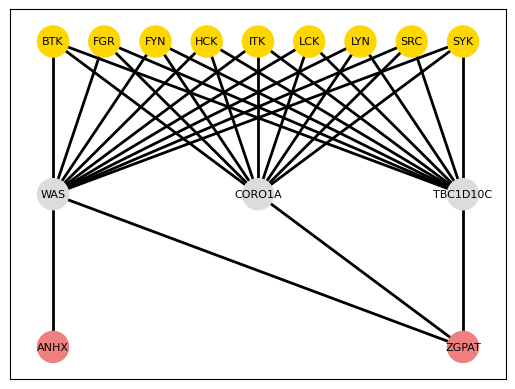

In [33]:
if has_rna_file:
    rank_threshold = 30 # cut-off of top-ranked kinases considered as enriched in a sample
    n_edges = 30 # desired number of edges to show in the plot
    dir = "dn" # enrichment direction to visualize
    kinase_col = "#FFD700" # kinase color
    tf_col = "#F08080" # TF color

    # Build network 
    edges_df = pd.DataFrame(columns=['target', 'source'])
    nodes_df = pd.DataFrame(columns=['id', 'type', 'color'])

    TFs = pd.read_csv(f"results/{dir}_TFs.csv")
    intermediates = pd.read_csv(f"results/{dir}_intermediates.csv")
    kinases = pd.read_csv(f"results/{dir}_kinases.csv")
    samples = kinases.columns.to_list()

    TRANSCRIPTION_FACTORS = TFs.to_numpy().flatten().tolist()
    KINASES = kinases.to_numpy().flatten().tolist()

    for id in samples:
        new = pd.DataFrame([[tf, p] for p in intermediates[id].dropna() for tf in TFs[id].dropna()], columns=['target', 'source'])
        edges_df = pd.concat([edges_df, new])
        new = pd.DataFrame([[p, kinase] for kinase in kinases[id].dropna()[:rank_threshold] for p in intermediates[id].dropna()], columns=['target', 'source'])
        edges_df = pd.concat([edges_df, new])

    edges_df = edges_df.groupby(['target', 'source']).size().reset_index()
    edges_df.rename(columns={0: "count"}, inplace=True)
    edges_df['label'] = edges_df['count']
    edges_df = edges_df.loc[edges_df.source != edges_df.target]

    thresh = edges_df.sort_values(by='count', ascending=False).iloc[n_edges]['count']
    edges_show = edges_df.loc[edges_df['count'] >= thresh]
    
    nodes = pd.unique(edges_show[['target', 'source']].to_numpy().flatten().tolist())
    nodes = nodes[~pd.isnull(nodes)]
    nodes_df = pd.DataFrame({'id': nodes})
    nodes_df['type'] = 'intermediate'
    nodes_df['color'] = "#DCDCDC"
    nodes_df.loc[nodes_df['id'].isin(TRANSCRIPTION_FACTORS), 'type'] = 'TF'
    nodes_df.loc[nodes_df['id'].isin(KINASES), 'type'] = 'kinase'
    nodes_df.loc[nodes_df['type'] == 'TF', 'color'] = tf_col
    nodes_df.loc[nodes_df['type'] == 'kinase', 'color'] = kinase_col
    nodes_df['label'] = nodes_df['id']

    print(f"Total N: {len(samples)}")
    print(f"Edge weight threshold: {thresh}")

    # Create a graph
    G = nx.Graph()

    # Add nodes
    for idx, row in nodes_df.iterrows():
        G.add_node(row['id'], group=row['type'], color=row['color'])

    # Add edges
    for idx, row in edges_show.iterrows():
        G.add_edge(row['source'], row['target'])

    # Manually set positions
    pos = {}
    group_positions = {'kinase': 0.8, 'intermediate': 0.5, 'TF': 0.2} 
    group_nodes = {group: [] for group in group_positions.keys()}
    for node, data in G.nodes(data=True):
        group_nodes[data['group']].append(node)
    for group, nodes in group_nodes.items():
        x_positions = np.linspace(0, 1, len(nodes))
        for x, node in zip(x_positions, nodes):
            pos[node] = (x, group_positions[group])
    
    node_colors = [G.nodes[n]['color'] for n in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500)
    nx.draw_networkx_edges(G, pos, edgelist=edges_show.to_records(index=False), width=2)
    nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')

    plt.savefig(f'figures/{dir}_x2k_pathways.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'figures/{dir}_x2k_pathways.png', dpi=300, bbox_inches='tight')

In [ ]:
if has_rna_file:
    display(Markdown(f"__Figure {fig_counter}.__ Visualization of pathways commonly identified from down-genes."))
    fig_counter += 1
    display(FileLink(f'figures/{dir}_x2k_pathways.png', result_html_prefix='Pathways Inferred from Down-Genes PNG: '))
    display(FileLink(f'figures/{dir}_x2k_pathways.png', result_html_prefix='Pathways Inferred from Down-Genes SVG: '))

# __PHOSPHOPROTEOMICS__

Using the uploaded phosphoproteomic data, we can identify upregulated and downregulated kinases using kinase enrichment analysis from KEA3 [13] and compare those kianses to the ones identified in the X2K analysis.

100%|██████████| 55270/55270 [00:05<00:00, 9837.71it/s] 


__Figure 24.__ Distribution of missing values in phosphoproteomic data.

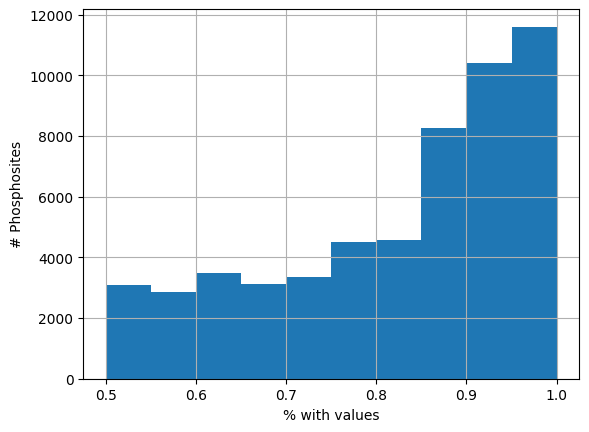

In [34]:
if has_phospho_file:
    percentages = []
    idx = []
    i = 0
    for _, row in tqdm(phospho_df.iterrows(), total=len(phospho_df)):
        value_counts = row.astype(float).isna().value_counts()
        pr = value_counts[0]/len(row)
        if pr > 0.8:
            idx.append(i)
        percentages.append(pr)
        i += 1
    ax = pd.Series(percentages).hist()
    ax.set_ylabel("# Phosphosites")
    ax.set_xlabel("% with values")

In [85]:
if has_phospho_file:
    display(Markdown(f"__Figure {fig_counter}.__ Distribution of missing values in phosphoproteomic data."))
    fig_counter += 1

IndentationError: unexpected indent (3993392379.py, line 2)

In [35]:
if has_phospho_file:
    phospho_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    phospho_df_imputed = phospho_df.iloc[idx].T.fillna(phospho_df.iloc[idx].mean(axis=1)).T.dropna()
    zscored_phospho = zscore(phospho_df_imputed)

#### Most Variable Phosphosites

In [86]:
if has_phospho_file:
    zscored_phospho_var = zscored_phospho.var(axis=1).sort_values(ascending=False)
    zscored_phospho_var_list = zscored_phospho_var.index[:100].tolist()
    display(zscored_phospho_var.head(10))
    display(Markdown(f"__Table {table_counter}.__ Top 10 most variable phosphosites."))
    table_counter += 1

idx
ENSG00000175084.12|ENSP00000363071.3|S32|PLGSPLSSPVFPRAG|1      0.435570
ENSG00000170454.6|ENSP00000252245.5|S535|GLGGSGSSVKFVSTT|1      0.390750
ENSG00000170807.12|ENSP00000411932.2|S15|RGLSKYESIDEDELL|1      0.373758
ENSG00000134765.10|ENSP00000257198.6|S779|QGIKTQQSFEMVKGG|1     0.331234
ENSG00000112739.17|ENSP00000337194.6|S87|RKEIIDASDKEGMSP|1      0.325810
ENSG00000143631.11|ENSP00000357789.1|S303|RVSQDRDSEGHSEDS|1     0.309501
ENSG00000163092.21|ENSP00000486198.1|S621|IKVVRGISMEENVKG|1     0.305947
ENSG00000125414.19|ENSP00000245503.5|S1482|ASQKEARSLGTELFK|1    0.305419
ENSG00000115310.18|ENSP00000337838.6|S806|YLESFKLSLDNTKDT|1     0.292126
ENSG00000143631.11|ENSP00000357789.1|S625|GSSVSQDSDSQGHSE|1     0.291693
dtype: float64

__Table 7.__ Top 10 most variable phosphosites.

__Figure 25.__ Hierarchically clustered heatmap of the top 100 most variable phosphosites.

/Users/giacomomarino/X2KTR/figures/HNSCC_phospho_observed_top_var_phosphosites_heatmap.png

/Users/giacomomarino/X2KTR/figures/HNSCC_phospho_observed_top_var_phosphosites_heatmap.svg

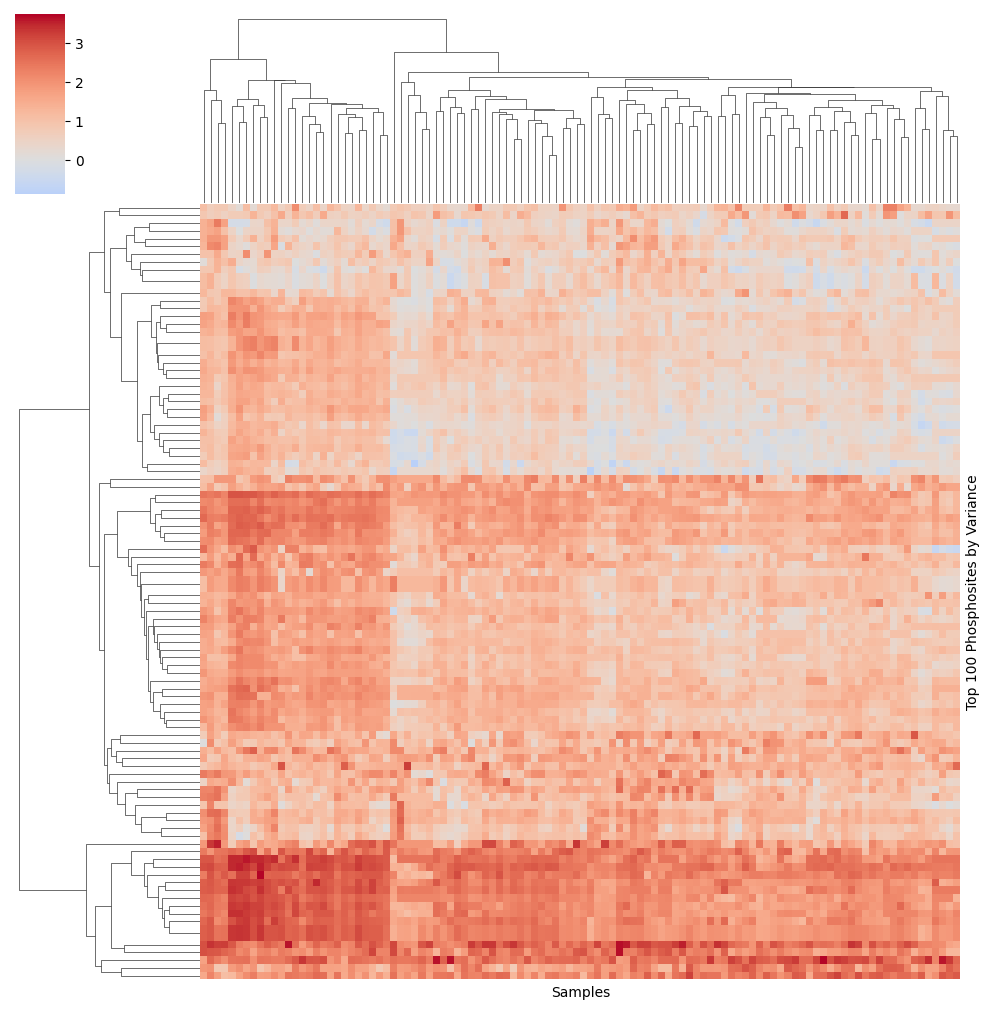

In [37]:
if has_phospho_file:    
    g = sns.clustermap(zscored_phospho.loc[zscored_phospho_var_list], cmap='coolwarm', center=0, xticklabels=False, yticklabels=False)
    ax = g.ax_heatmap
    ax.set_ylabel('Top 100 Phosphosites by Variance')
    ax.set_xlabel('Samples')
    g.savefig(f'figures/{phospho_filename}_top_var_phosphosites_heatmap.png', dpi=300, bbox_inches='tight')
    g.savefig(f'figures/{phospho_filename}_top_var_phosphosites_heatmap.svg', dpi=300, bbox_inches='tight')
    

In [ ]:
if has_phospho_file:
    display(Markdown(f"__Figure {fig_counter}.__ Hierarchically clustered heatmap of the top 100 most variable phosphosites."))
    fig_counter += 1
    display(FileLink(f'figures/{phospho_filename}_top_var_phosphosites_heatmap.png', result_html_prefix='Most Variable Phosphosites Heatmap PNG: '))
    display(FileLink(f'figures/{phospho_filename}_top_var_phosphosites_heatmap.svg', result_html_prefix='Most Variable Phosphosites Heatmap SVG: '))

In [38]:
if has_phospho_file:
    kea_res = {}
    for patient in tqdm(zscored_phospho.columns):
        kea_res[patient] = {}
        down_rows = zscored_phospho[patient].astype(float).sort_values(ascending=True)[:500]
        up_rows = zscored_phospho[patient].astype(float).sort_values(ascending=False)[:500]
        
        down_phopshosites = list(set(down_rows.index.map(lambda g: lookup(g.split('.')[0]) if lookup(g.split('.')[0]) else g.split('.')[0])))
        up_phopshosites = list(set(up_rows.index.map(lambda g: lookup(g.split('.')[0]) if lookup(g.split('.')[0]) else g.split('.')[0])))

        up_kinases = get_kea3_results(up_phopshosites, f'{patient}_up_phosphosites')
        down_kinases = get_kea3_results(down_phopshosites, f'{patient}_down_phosphosites')
        kea_res[patient]['up'] = up_kinases
        kea_res[patient]['down'] = down_kinases

100%|██████████| 108/108 [01:55<00:00,  1.07s/it]


#### Full KEA3 Heatmap - Up Phosphosites

__Figure 26.__ Integrated Mean Rank from KEA3 from up-regulated phosphosites for all samples and all kinases based on z-scored phosphorylation.

/Users/giacomomarino/X2KTR/figures/HNSCC_phospho_observed_kea_up_heatmap.png

/Users/giacomomarino/X2KTR/figures/HNSCC_phospho_observed_kea_up_heatmap.svg

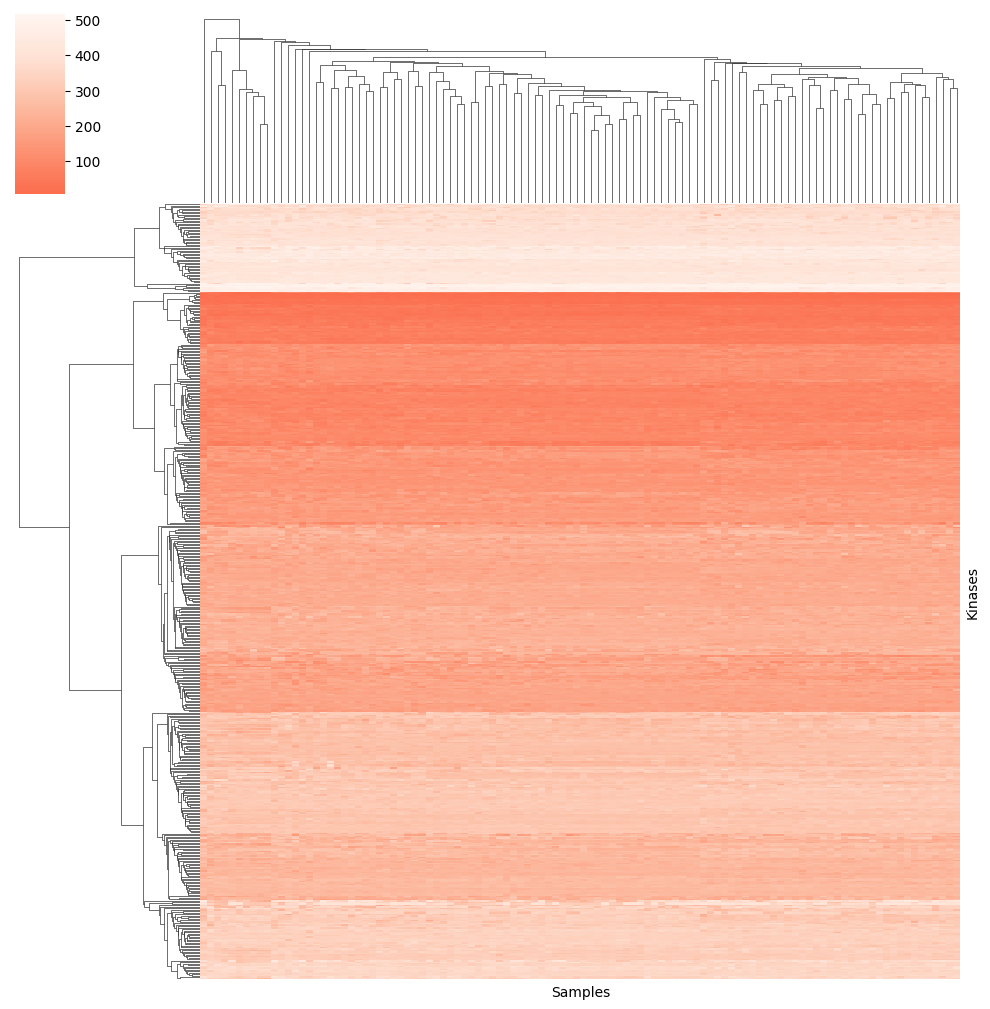

In [39]:
if has_phospho_file:    
    reds_reversed = cm.get_cmap('Reds').reversed()
    up_kea_comb = pd.concat([kea_res[p]['up'] for p in kea_res], axis=1)
    g = sns.clustermap(up_kea_comb.astype(float), cmap=reds_reversed, center=0, xticklabels=False, yticklabels=False)
    ax = g.ax_heatmap
    ax.set_ylabel('Kinases')
    ax.set_xlabel('Samples')
    g.savefig(f'figures/{phospho_filename}_kea_up_heatmap.png', dpi=300, bbox_inches='tight')
    g.savefig(f'figures/{phospho_filename}_kea_up_heatmap.svg', dpi=300, bbox_inches='tight')

In [ ]:
if has_phospho_file:
    display(Markdown(f"__Figure {fig_counter}.__ Integrated Mean Rank from KEA3 from up-regulated phosphosites for all samples and all kinases based on z-scored phosphorylation."))
    fig_counter += 1
    display(FileLink(f'figures/{phospho_filename}_kea_up_heatmap.png', result_html_prefix='KEA3 Up Heatmap PNG: '))
    display(FileLink(f'figures/{phospho_filename}_kea_up_heatmap.svg', result_html_prefix='KEA3 Up Heatmap SVG: '))

#### KEA3 Heatmap Top 20 Variable Kinases - Up Phosphosites

__Figure 27.__ Integrated Mean Rank from KEA3 from up-regulated phosphosites for all samples and top 20 most variable kinases based on z-scored phosphorylation.

/Users/giacomomarino/X2KTR/figures/HNSCC_phospho_observed_kea_up_top_var_heatmap.png

/Users/giacomomarino/X2KTR/figures/HNSCC_phospho_observed_kea_up_top_var_heatmap.svg

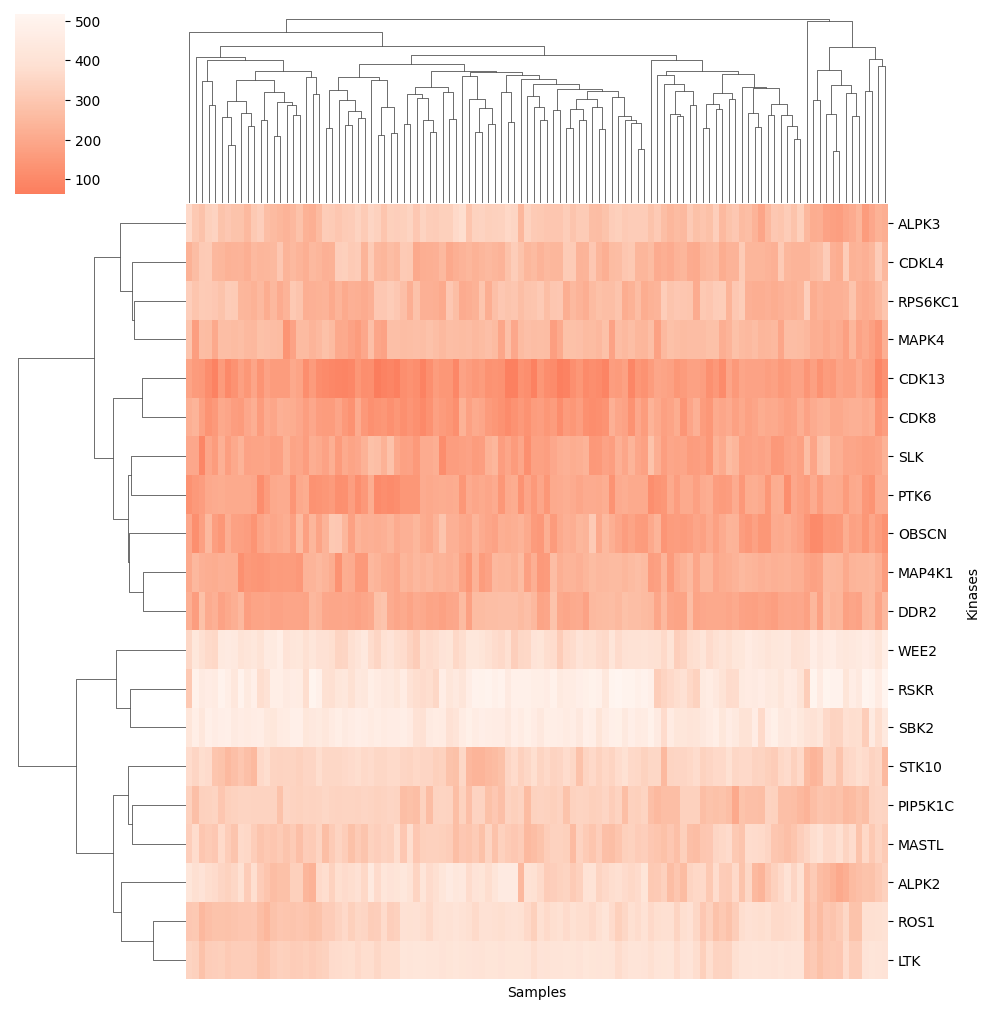

In [40]:
if has_phospho_file:   
    top_20_var_kinases = up_kea_comb.var(axis=1).sort_values(ascending=False).index[0:20]
    g = sns.clustermap(up_kea_comb.loc[top_20_var_kinases].astype(float), cmap=reds_reversed, center=0, xticklabels=False)
    ax = g.ax_heatmap
    ax.set_ylabel('Kinases')
    ax.set_xlabel('Samples')
    g.savefig(f'figures/{phospho_filename}_kea_up_top_var_heatmap.png', dpi=300, bbox_inches='tight')
    g.savefig(f'figures/{phospho_filename}_kea_up_top_var_heatmap.svg', dpi=300, bbox_inches='tight')

In [ ]:
if has_phospho_file:
    display(Markdown(f"__Figure {fig_counter}.__ Integrated Mean Rank from KEA3 from up-regulated phosphosites for all samples and top 20 most variable kinases based on z-scored phosphorylation."))
    fig_counter += 1
    display(FileLink(f'figures/{phospho_filename}_kea_up_top_var_heatmap.png', result_html_prefix='KEA3 Up Top 20 Variable Kinases Heatmap PNG: '))
    display(FileLink(f'figures/{phospho_filename}_kea_up_top_var_heatmap.svg', result_html_prefix='KEA3 Up Top 20 Variable Kinases Heatmap SVG: '))

#### Full KEA3 Heatmap - Down Phosphosites

__Figure 28.__ Integrated Mean Rank from KEA3 from down-regulated phosphosites for all samples and all kinases based on z-scored phosphorylation.

/Users/giacomomarino/X2KTR/figures/HNSCC_phospho_observed_kea_dn_heatmap.png

/Users/giacomomarino/X2KTR/figures/HNSCC_phospho_observed_kea_dn_heatmap.svg

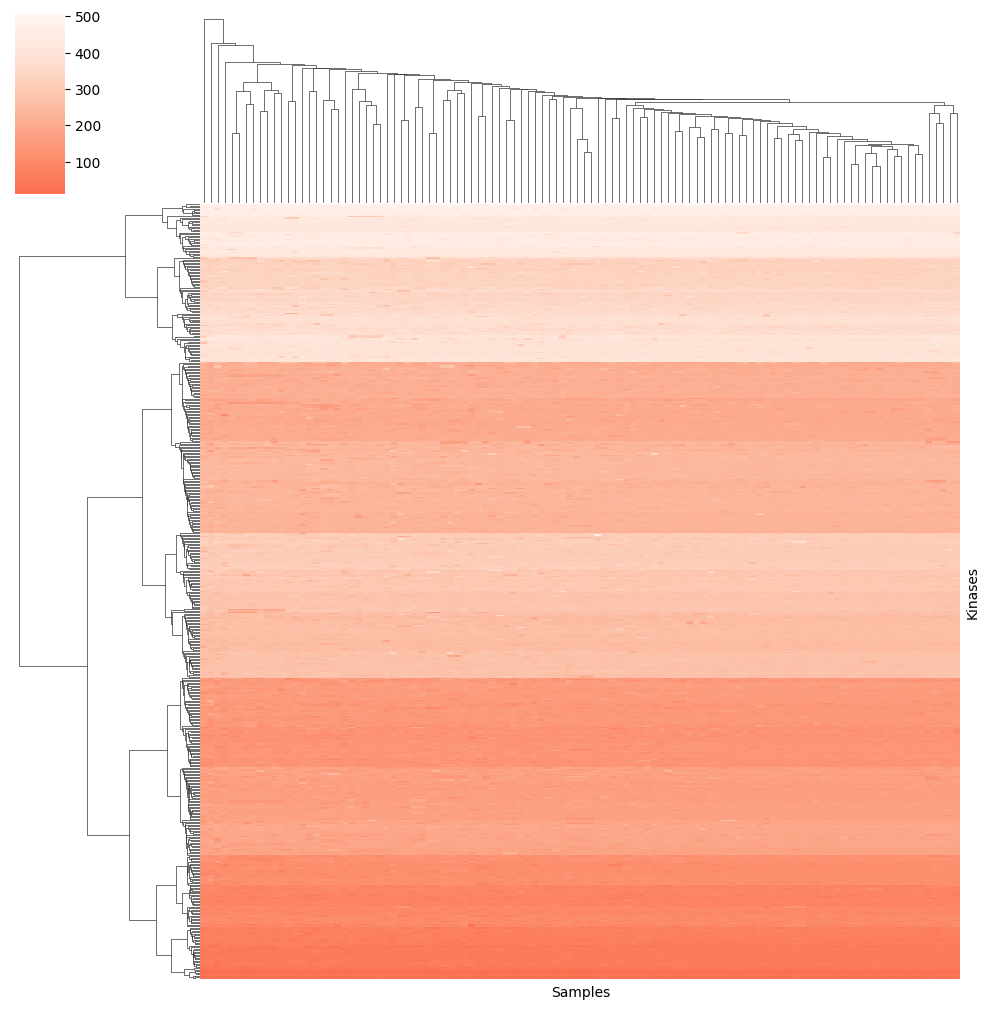

In [41]:
if has_phospho_file:    
    dn_kea_comb = pd.concat([kea_res[p]['down'] for p in kea_res], axis=1)
    g = sns.clustermap(dn_kea_comb.astype(float), cmap=reds_reversed, center=0, xticklabels=False, yticklabels=False)
    ax = g.ax_heatmap
    ax.set_ylabel('Kinases')
    ax.set_xlabel('Samples')
    g.savefig(f'figures/{phospho_filename}_kea_dn_heatmap.png', dpi=300, bbox_inches='tight')
    g.savefig(f'figures/{phospho_filename}_kea_dn_heatmap.svg', dpi=300, bbox_inches='tight')

In [87]:
if has_phospho_file:    
    display(Markdown(f"__Figure {fig_counter}.__ Integrated Mean Rank from KEA3 from down-regulated phosphosites for all samples and all kinases based on z-scored phosphorylation."))
    fig_counter += 1
    display(FileLink(f'figures/{phospho_filename}_kea_dn_heatmap.png', result_html_prefix='KEA3 Down Heatmap PNG: '))
    display(FileLink(f'figures/{phospho_filename}_kea_dn_heatmap.svg', result_html_prefix='KEA3 Down Heatmap SVG: '))

__Figure 44.__ Integrated Mean Rank from KEA3 from down-regulated phosphosites for all samples and all kinases based on z-scored phosphorylation.

/Users/giacomomarino/X2KTR/figures/HNSCC_phospho_observed_kea_dn_heatmap.png

/Users/giacomomarino/X2KTR/figures/HNSCC_phospho_observed_kea_dn_heatmap.svg

#### KEA3 Heatmap Top 20 Variable Kinases - Down Phosphosites

__Figure 29.__ Integrated Mean Rank from KEA3 from down-regulated phosphosites for all samples and top 20 most variable kinases based on z-scored phosphorylation.

/Users/giacomomarino/X2KTR/figures/HNSCC_phospho_observed_kea_dn_top_var_heatmap.png

/Users/giacomomarino/X2KTR/figures/HNSCC_phospho_observed_kea_dn_top_var_heatmap.svg

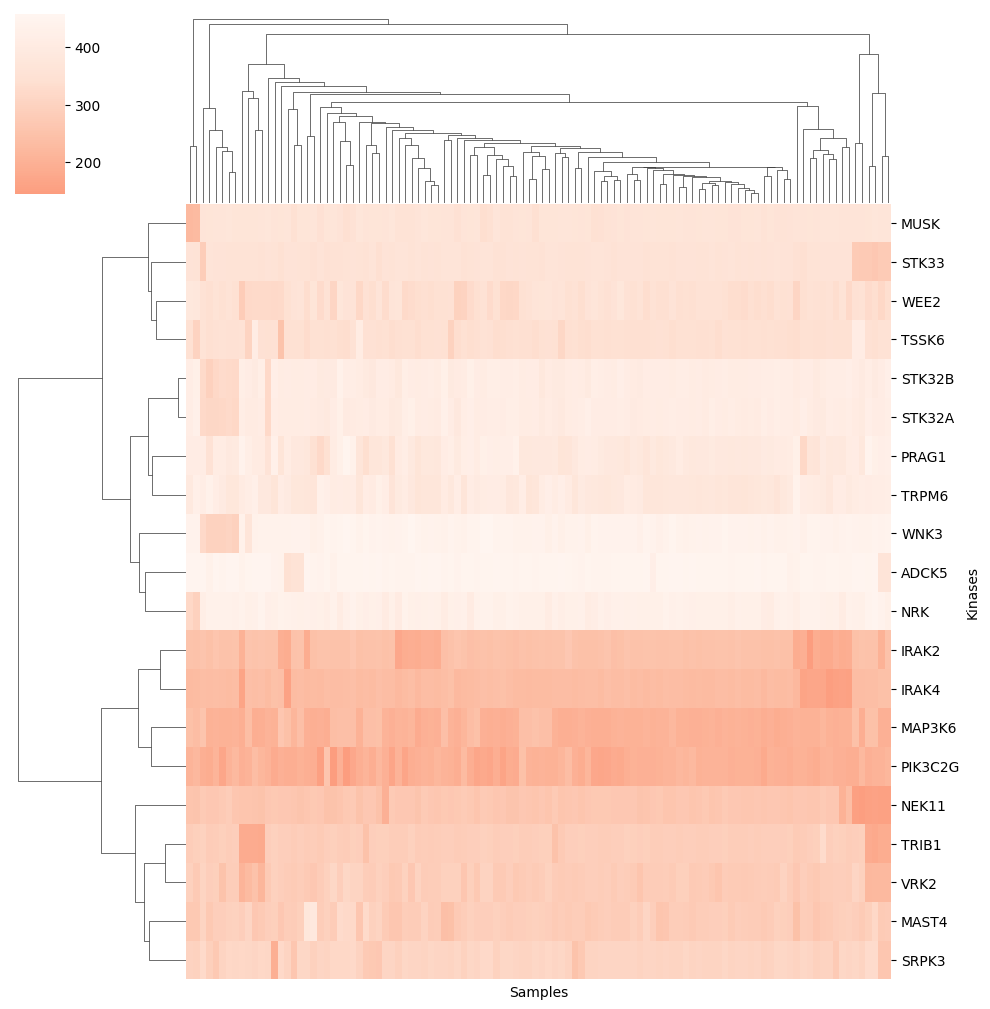

In [42]:
if has_phospho_file:
    top_20_var_kinases = dn_kea_comb.var(axis=1).sort_values(ascending=False).index[0:20]
    g = sns.clustermap(dn_kea_comb.loc[top_20_var_kinases].astype(float), cmap=reds_reversed, center=0, xticklabels=False)
    ax = g.ax_heatmap
    ax.set_ylabel('Kinases')
    ax.set_xlabel('Samples')
    g.savefig(f'figures/{phospho_filename}_kea_dn_top_var_heatmap.png', dpi=300, bbox_inches='tight')
    g.savefig(f'figures/{phospho_filename}_kea_dn_top_var_heatmap.svg', dpi=300, bbox_inches='tight')

In [88]:
if has_phospho_file:    
    display(Markdown(f"__Figure {fig_counter}.__ Integrated Mean Rank from KEA3 from down-regulated phosphosites for all samples and top 20 most variable kinases based on z-scored phosphorylation."))
    fig_counter += 1
    display(FileLink(f'figures/{phospho_filename}_kea_dn_top_var_heatmap.png', result_html_prefix='KEA3 Down Top 20 Variable Kinases Heatmap PNG: '))
    display(FileLink(f'figures/{phospho_filename}_kea_dn_top_var_heatmap.svg', result_html_prefix='KEA3 Down Top 20 Variable Kinases Heatmap SVG: '))

__Figure 45.__ Integrated Mean Rank from KEA3 from down-regulated phosphosites for all samples and top 20 most variable kinases based on z-scored phosphorylation.

/Users/giacomomarino/X2KTR/figures/HNSCC_phospho_observed_kea_dn_top_var_heatmap.png

/Users/giacomomarino/X2KTR/figures/HNSCC_phospho_observed_kea_dn_top_var_heatmap.svg

### Transcriptomics + Phosphoproteomics
#### Kinases enriched in both X2K and phospho- pipelines

In [43]:
if has_rna_file and has_phospho_file:
    rank_threshold = 30

    rec_kinases = {}
    for id  in kea_res:
        up = x2k_up[id].astype(float).sort_values(ascending=True).index.to_list()
        up_phospho = kea_res[id]['up'].astype(float).sort_values(by='Score', ascending=True).index.to_list()
        rec_kinases[id] = list(set(up[:rank_threshold]) & set(up_phospho[:rank_threshold]))
    up_up_df = pd.DataFrame.from_dict(rec_kinases, orient='index').T
    up_up_df.to_csv(f"results/recovered_up_phospho_up_genes.csv", index=False)

    rec_kinases = {}
    for id  in kea_res:
        dn = x2k_dn[id].astype(float).sort_values(ascending=True).index.to_list()
        dn_phospho = kea_res[id]['down'].astype(float).sort_values(by='Score', ascending=True).index.to_list()
        rec_kinases[id] = list(set(dn[:rank_threshold]) & set(dn_phospho[:rank_threshold]))
    dn_dn_df = pd.DataFrame.from_dict(rec_kinases, orient='index').T
    dn_dn_df.to_csv(f"results/recovered_dn_phospho_dn_genes.csv", index=False)

    rec_kinases = {}
    for id in kea_res:
        dn = x2k_dn[id].astype(float).sort_values(ascending=True).index.to_list()
        up_phospho = kea_res[id]['up'].astype(float).sort_values(by='Score', ascending=True).index.to_list()
        rec_kinases[id] = list(set(dn[:rank_threshold]) & set(up_phospho[:rank_threshold]))
    up_dn_df = pd.DataFrame.from_dict(rec_kinases, orient='index').T
    up_dn_df.to_csv(f"results/recovered_up_phospho_dn_genes.csv", index=False)

    rec_kinases = {}
    for id in kea_res:
        up = x2k_up[id].astype(float).sort_values(ascending=True).index.to_list()
        dn_phospho = kea_res[id]['down'].astype(float).sort_values(by='Score', ascending=True).index.to_list()
        rec_kinases[id] = list(set(up[:rank_threshold]) & set(dn_phospho[:rank_threshold]))
    dn_up_df = pd.DataFrame.from_dict(rec_kinases, orient='index').T
    dn_up_df.to_csv(f"results/recovered_dn_phospho_up_genes.csv", index=False)

In [44]:
if has_rna_file and has_phospho_file:   
    display(up_up_df.head())
    display(Markdown(f"__Table {table_counter}.__ Kinases recovered from both the X2K pipeline and the phosphoproteomic data for up-genes and up-phosphosites."))
    table_counter += 1
    display(FileLink(f"results/recovered_up_phospho_up_genes.csv", result_html_prefix='Download Recovered Kinases (up-up):'))

C3L-00997 C3N-03849 C3N-03487 C3N-01858 C3L-04791 C3N-04273 C3N-03664  \
0     GSK3B      CDK9     GSK3B      CDK9      CDK9      CDK9      EGFR   
1      EGFR     GSK3B      EGFR     GSK3B     GSK3B     GSK3B     MAPK3   
2     MAPK3      CDK2     MAPK3   EIF2AK2       FYN     MAPK3     PRKCD   
3       ILK      AKT1     PRKCD     MAPK3      EGFR      CLK2       SRC   
4     PRKCD   CSNK2A1       SRC      CDK1     PDPK1      CLK1      AKT1   

  C3N-03781 C3L-00999 C3N-01859  ... C3N-00828 C3N-00297 C3N-00295 C3N-00829  \
0     GSK3B     GSK3B      CDK9  ...      CDK9       FYN      CDK9      CDK9   
1       FYN       FYN     GSK3B  ...      EGFR     PRKCE     GSK3B     GSK3B   
2      EGFR       CSK     MAPK3  ...     PDPK1      EGFR      CLK2     MAPK3   
3     MAPK3      EGFR      CLK2  ...     MAPK3     MAPK3      CDK2      CLK2   
4       SRC       SRC      CLK1  ...       SRC     PRKCD     MAPK1      CLK1   

  C3N-00306 C3N-00846 C3L-02617 C3N-00498 C3N-00299 C3N-00307  
0      CDK9     GSK3B      CDK9      CDK9     GSK3B       FYN  
1     GSK3B     MAPK3     GSK3B     GSK3B       FYN      EGFR  
2     MAPK3      CLK1     MAPK3     MAPK3   EIF2AK2     MAPK3  
3      CDK2      CLK2      CLK2      CDK2      EGFR       ILK  
4      AKT1      AKT1      CLK1   CSNK2A1       SRC       SRC  

[5 rows x 108 columns]

*Table 2. Kinases recovered from both the X2K pipeline and the phosphoproteomic data for up-genes and up-phosphosites.

/Users/giacomomarino/X2KTR/results/recovered_up_phospho_up_genes.csv

In [45]:
if has_rna_file and has_phospho_file:      
    display(dn_dn_df.head())
    display(Markdown(f"__Table {table_counter}.__ Kinases recovered from both the X2K pipeline and the phosphoproteomic data for down-genes and down-phosphosites."))
    table_counter += 1
    display(FileLink(f"results/recovered_dn_phospho_dn_genes.csv", result_html_prefix='Download Recovered Kinases (down-down):'))

C3L-00997 C3N-03849 C3N-03487 C3N-01858 C3L-04791 C3N-04273 C3N-03664  \
0     GSK3B       FYN       FYN       FYN       FYN     GSK3B       FYN   
1      PLK1     PRKCD       SRC      EGFR       SRC      PLK1     MAPK3   
2       FYN       SRC     MAPK1       ATM     MAPK1       FYN       SRC   
3       SRC      AKT1    MAPK14       SRC    MAPK14      EGFR      AKT1   
4      CDK2     MAPK1     PRKCD      CDK2      ABL1       SRC      PTK2   

  C3N-03781 C3L-00999 C3N-01859  ... C3N-00828 C3N-00297 C3N-00295 C3N-00829  \
0     GSK3B       FYN       FYN  ...       FYN       FYN     GSK3B     GSK3B   
1      PLK1       SRC     MAPK3  ...     MAPK3       SRC      PLK1      PLK1   
2       FYN      AKT1     PRKCD  ...       SRC     MAPK1       FYN       FYN   
3      EGFR     MAPK1       ATM  ...      AKT1    MAPK14      EGFR      RAF1   
4       SRC    MAPK14       SRC  ...     MAPK1     PRKCA    MAP3K7      EGFR   

  C3N-00306 C3N-00846 C3L-02617 C3N-00498 C3N-00299 C3N-00307  
0       FYN       FYN       FYN       FYN       FYN       FYN  
1       SRC     PRKCD       SRC     PRKCD       SRC       ATM  
2      AKT1       SRC    MAPK14       SRC      AKT1       SRC  
3     MAPK1      AKT1     PRKCA    MAPK14     MAPK1      AKT1  
4    MAPK14     MAPK1      ABL1     PRKCA    MAPK14     MAPK1  

[5 rows x 108 columns]

*Table 3. Kinases recovered from both the X2K pipeline and the phosphoproteomic data for down-genes and down-phosphosites.

/Users/giacomomarino/X2KTR/results/recovered_dn_phospho_dn_genes.csv

In [46]:
if has_rna_file and has_phospho_file:      
    display(up_dn_df.head())
    display(Markdown(f"__Table {table_counter}.__ Kinases recovered from both the X2K pipeline and the phosphoproteomic data for up-genes and down-phosphosites."))
    table_counter += 1
    display(FileLink(f"results/recovered_up_phospho_dn_genes.csv", result_html_prefix='Download Recovered Kinases (up-down):'))

C3L-00997 C3N-03849 C3N-03487 C3N-01858 C3L-04791 C3N-04273 C3N-03664  \
0      CDK9       CSK       FYN      CDK9       FYN     GSK3B       FYN   
1     GSK3B       FYN       CSK       FYN       CSK       FYN       CSK   
2       FYN       SRC       LCK      CDK6     MAPK3     PRKCZ     MAPK3   
3   CSNK2A2      AKT1     MAPK3      EGFR     PTK2B      PAK1     PRKCD   
4       SRC     MAPK1     PRKCD     MAPK3       SRC      EGFR       SRC   

  C3N-03781 C3L-00999 C3N-01859  ... C3N-00828 C3N-00297 C3N-00295 C3N-00829  \
0     GSK3B       FYN       FYN  ...       FYN       FYN      CDK9      CDK9   
1       FYN       LCK       CSK  ...       CSK       CSK     GSK3B     GSK3B   
2      PAK1       SRC     MAPK3  ...     MAPK3     PRKCZ       FYN       FYN   
3      EGFR      AKT1     PRKCD  ...     PRKCD     PRKCD      EGFR      RAF1   
4     MAPK3     PRKCD       SRC  ...       SRC       SRC   CSNK2A2      EGFR   

  C3N-00306 C3N-00846 C3L-02617 C3N-00498 C3N-00299 C3N-00307  
0       FYN       FYN       FYN       FYN       FYN       FYN  
1       LCK       CSK       CSK       CSK       CSK       CSK  
2       SRC       LCK     PDPK1     MAPK3       LCK       LCK  
3      AKT1       SRC     MAPK3     PRKCD       SRC     MAPK3  
4     MAPK1      AKT1     PRKCD       SRC      AKT1     PTK2B  

[5 rows x 108 columns]

*Table 4. Kinases recovered from both the X2K pipeline and the phosphoproteomic data for up-genes and down-phosphosites.

/Users/giacomomarino/X2KTR/results/recovered_up_phospho_dn_genes.csv

In [47]:
if has_rna_file and has_phospho_file:
    display(dn_up_df.head())
    display(Markdown(f"__Table {table_counter}.__ Kinases recovered from both the X2K pipeline and the phosphoproteomic data for down-genes and up-phosphosites."))
    table_counter += 1
    display(FileLink(f"results/recovered_dn_phospho_up_genes.csv", result_html_prefix='Download Recovered Kinases (down-up):'))

C3L-00997 C3N-03849 C3N-03487 C3N-01858 C3L-04791 C3N-04273 C3N-03664  \
0     GSK3B     GSK3B     GSK3B     GSK3B     GSK3B     GSK3B      EGFR   
1      EGFR      CHUK      EGFR      PLK1      PLK1    CSNK1E     MAPK3   
2     NTRK1     IKBKB       SRC       ATM       FYN       ATM     IKBKB   
3       ILK       ATM     MAPK1      CDK2      EGFR      CDK2       SRC   
4       SRC      CDK2     PRKCD       ATR    MAP3K7       ATR      AKT1   

  C3N-03781 C3L-00999 C3N-01859  ... C3N-00828 C3N-00297 C3N-00295 C3N-00829  \
0     GSK3B     GSK3B     GSK3B  ...     GSK3B       FYN     GSK3B     GSK3B   
1       FYN       FYN      PLK1  ...      EGFR      EGFR    CSNK1E     MAPK3   
2      EGFR      EGFR     MAPK3  ...     MAPK3     MAPK3       ATM       ATM   
3       SRC     PRKCD    MAP3K7  ...    MAP3K7       SRC      CDK2      CDK2   
4     MAPK1       SRC    CSNK1E  ...     IKBKB      AKT1     MAPK1       ATR   

  C3N-00306 C3N-00846 C3L-02617 C3N-00498 C3N-00299 C3N-00307  
0     GSK3B     GSK3B     GSK3B     GSK3B     GSK3B       FYN  
1      PLK1      PLK1    CSNK1E     IKBKB       FYN      EGFR  
2      CHUK      CLK2       ATM    CSNK1E      EGFR       ILK  
3    CSNK1E     CHEK2      CDK2       ATM      CHUK       SRC  
4       ATM       ATM       ATR      CDK2     IKBKB      AKT1  

[5 rows x 108 columns]

*Table 5. Kinases recovered from both the X2K pipeline and the phosphoproteomic data for down-genes and up-phosphosites.

/Users/giacomomarino/X2KTR/results/recovered_dn_phospho_up_genes.csv

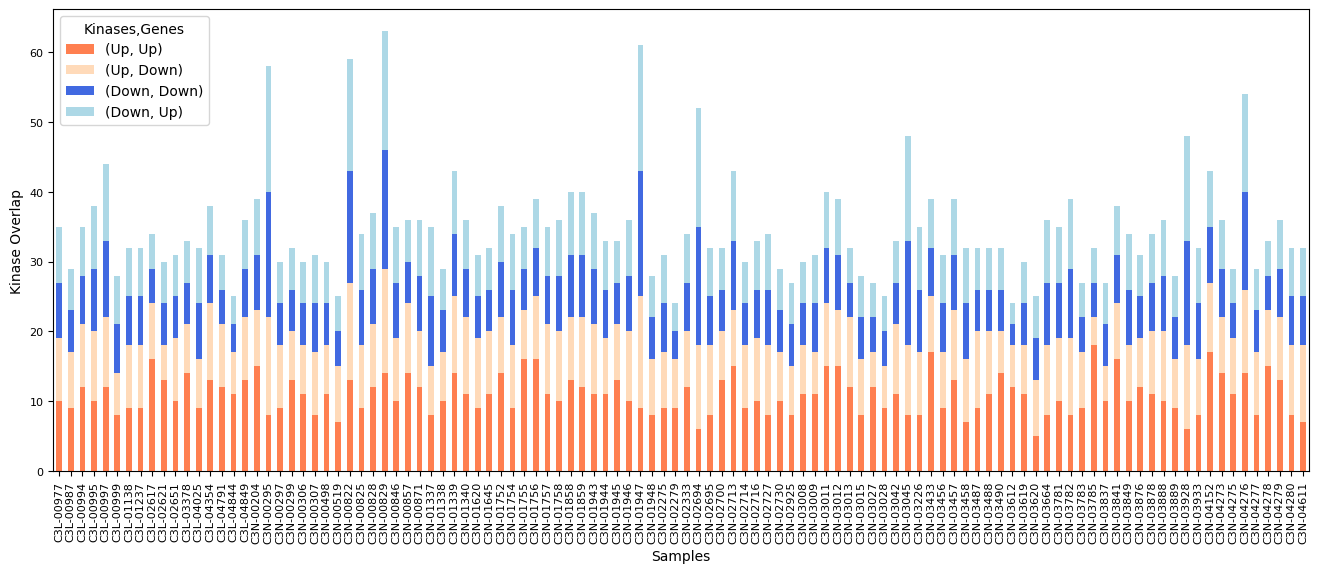

__Figure 30.__ Overlap of kinases recovered from both the X2K pipeline and the phosphoproteomic data for up/down genes and phosphosites per patient.

/Users/giacomomarino/X2KTR/figures/kinase_recovery.png

/Users/giacomomarino/X2KTR/figures/kinase_recovery.svg

<Figure size 640x480 with 0 Axes>

In [48]:
if has_rna_file and has_phospho_file:
    up_up = pd.read_csv("results/recovered_up_phospho_up_genes.csv")
    up_dn = pd.read_csv("results/recovered_up_phospho_dn_genes.csv")
    dn_up = pd.read_csv("results/recovered_dn_phospho_dn_genes.csv")
    dn_dn = pd.read_csv("results/recovered_dn_phospho_dn_genes.csv")

    dat = []
    for id in up_up.columns:
        dat.append([id, 'Up', 'Up', up_up.shape[0]-sum(up_up[id].isna())])
        dat.append([id, 'Up', 'Down', up_dn.shape[0]-sum(up_dn[id].isna())])
        dat.append([id, 'Down', 'Down', dn_dn.shape[0]-sum(dn_dn[id].isna())])
        dat.append([id, 'Down', 'Up', dn_up.shape[0]-sum(dn_up[id].isna())])

    dat = pd.DataFrame(dat, columns=["id", "Kinases", "Genes", "Overlap"])
    dat = dat.pivot(index=['id'], columns=['Kinases', 'Genes'], values='Overlap')
    g = dat.plot(kind='bar', stacked=True, color=['coral', 'peachpuff', 'royalblue', 'lightblue'], fontsize=8, figsize=(len(up_up.columns)*0.15, 6))
    g.set_ylabel("Kinase Overlap")
    g.set_xlabel("Samples")
    g.legend(title="Kinases,Genes", loc='best')
    plt.show()
    plt.savefig("figures/kinase_recovery.svg", dpi=300, bbox_inches='tight')
    plt.savefig("figures/kinase_recovery.png", dpi=300, bbox_inches='tight')
    display(Markdown(f"__Figure {fig_counter}.__ Overlap of kinases recovered from both the X2K pipeline and the phosphoproteomic data for up/down genes and phosphosites per patient."))
    fig_counter += 1
    display(FileLink('figures/kinase_recovery.png', result_html_prefix='Barchart of Kinase Recovery PNG: '))
    display(FileLink('figures/kinase_recovery.svg', result_html_prefix='Barchart of Kinase Recovery SVG: '))

# __PROTEOMICS__

Using the uploaded proetomic matrix, we can annotate the kinase and cell-surface protein targets we identified earlier in the pipeline to ensure they are also expressed at the protein level. 

100%|██████████| 11561/11561 [00:01<00:00, 10028.86it/s]


__Figure 31.__ Distribution of missing values in proteomic data.

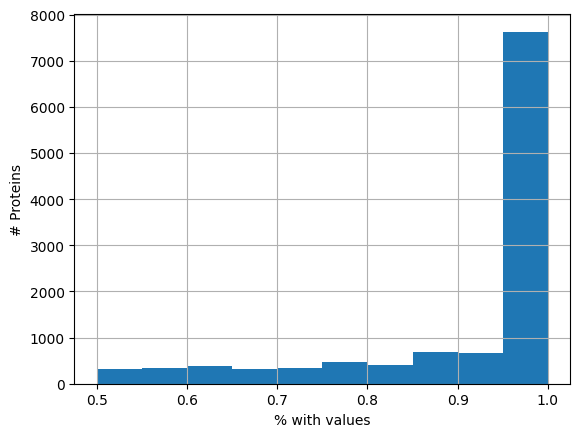

In [49]:
if has_prot_file:
    percentages = []
    idx = []
    i = 0
    for _, row in tqdm(prot_df.iterrows(), total=len(prot_df)):
        value_counts = row.astype(float).isna().value_counts()
        pr = value_counts[0]/len(row)
        if pr > 0.8:
            idx.append(i)
        percentages.append(pr)
        i += 1
    ax = pd.Series(percentages).hist()
    ax.set_ylabel("# Proteins")
    ax.set_xlabel("% with values")

In [ ]:
if has_prot_file:
    display(Markdown(f"__Figure {fig_counter}.__ Distribution of missing values in proteomic data."))
    fig_counter += 1

In [50]:
if has_prot_file:
    prot_df_imputed = prot_df.iloc[idx].T.fillna(prot_df.iloc[idx].mean(axis=1)).T.astype(float)
    zscored_prot = zscore(prot_df_imputed, axis=0)

In [96]:
if has_prot_file:
    top_var_proteins = zscored_prot.var(axis=1).sort_values(ascending=False)
    top_var_proteins_list = top_var_proteins.index[:100].tolist()
    df = pd.DataFrame(top_var_proteins, columns=['Variance'])
    df.index.names = ['Protein']
    display(df.head(10))
    display(Markdown(f"__Table {table_counter}.__ Top 10 most variable proteins based on z-scored expression."))
    table_counter += 1

Variance
Protein          
SPRR4    0.406859
KHDC1L   0.376113
LCE3E    0.353840
LCE3D    0.339177
DEFA3    0.311464
MAGEA10  0.301103
KRT75    0.284838
SPRR2F   0.282892
SPRR5    0.275516
CHGA     0.274381

__Table 11.__ Top 10 most variable proteins based on z-scored expression.

### Top 100 Proteins by Variance

__Figure 32.__ Hierarchically clustered heatmap of the top 100 most variable proteins.

/Users/giacomomarino/X2KTR/figures/HNSCC_proteomics_tumor_top_var_proteins_heatmap.png

/Users/giacomomarino/X2KTR/figures/HNSCC_proteomics_tumor_top_var_proteins_heatmap.svg

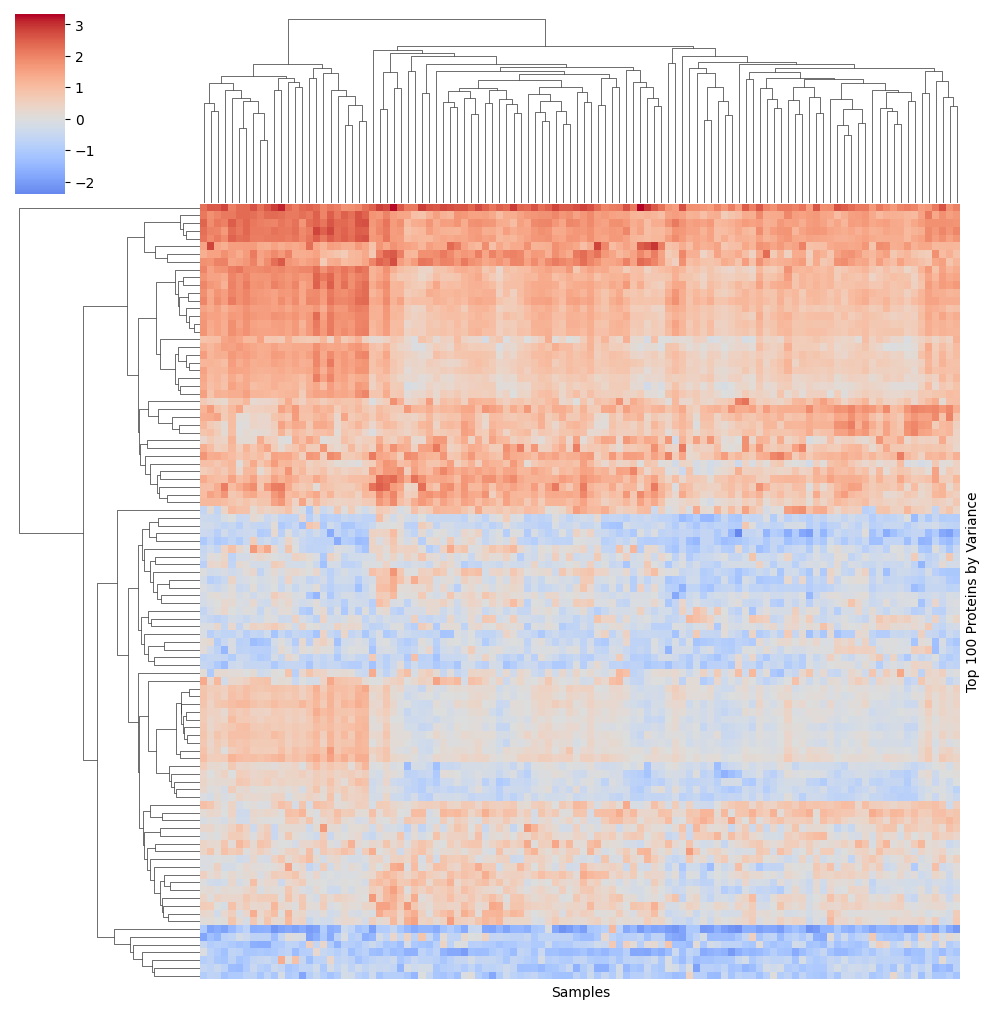

In [52]:
if has_prot_file:
    g = sns.clustermap(zscored_prot.loc[top_var_proteins_list], cmap='coolwarm', center=0, xticklabels=False, yticklabels=False)
    ax = g.ax_heatmap
    ax.set_ylabel('Top 100 Proteins by Variance')
    ax.set_xlabel('Samples')
    g.savefig(f'figures/{prot_filename}_top_var_proteins_heatmap.png', dpi=300, bbox_inches='tight')
    g.savefig(f'figures/{prot_filename}_top_var_proteins_heatmap.svg', dpi=300, bbox_inches='tight')

In [ ]:
if has_prot_file:
    display(Markdown(f"__Figure {fig_counter}.__ Hierarchically clustered heatmap of the top 100 most variable proteins."))
    fig_counter += 1
    display(FileLink(f'figures/{prot_filename}_top_var_proteins_heatmap.png', result_html_prefix='Most Variable Proteins Heatmap PNG: '))
    display(FileLink(f'figures/{prot_filename}_top_var_proteins_heatmap.svg', result_html_prefix='Most Variable Proteins Heatmap SVG: '))

### Annotated Cell-Surface Targets with Proteomic Expression

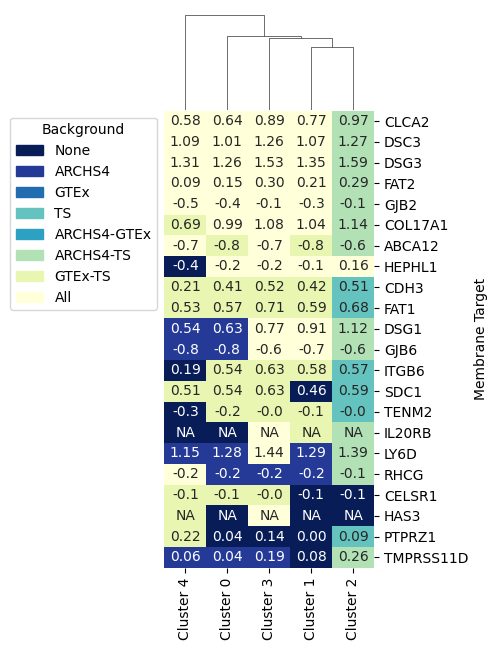

__Figure 33.__ Membrane target matrix annotated with average z-scored expression from proteomic data.

/Users/giacomomarino/X2KTR/results/CPTAC3_HNSCC_tumor_counts_prot_membrane_target_mat.csv

/Users/giacomomarino/X2KTR/figures/CPTAC3_HNSCC_tumor_counts_prot_membrane_target_matrix.png

/Users/giacomomarino/X2KTR/figures/CPTAC3_HNSCC_tumor_counts_prot_membrane_target_matrix.svg

In [53]:
if has_rna_file and has_prot_file:
    annot_data = []
    for t in membrane_target_mat.index:
        if t in zscored_prot.index:
            row = []
            for cluster in membrane_target_mat.columns:
                c = cluster.split(' ')[1]
                cluster_samples = list(leiden_df[leiden_df['leiden'] == c].index.values)
                cluster_samples = list(set(cluster_samples).intersection(zscored_prot.columns))
                clus_mean = (zscored_prot.loc[t][cluster_samples]).mean()
                row.append(str(clus_mean)[0:4])
            annot_data.append(row)
        else:
            annot_data.append(['NA']*membrane_target_mat.shape[1])
    h = membrane_target_mat.shape[0]
    g = sns.clustermap(membrane_target_mat, annot=annot_data, fmt='', figsize=(4,0.3*h+2*(h<15)), cmap=YlGnBu, cbar_pos=None, dendrogram_ratio=0.1-(h<40)*0.01*(h-30), row_cluster=False, xticklabels=True, yticklabels=True, standard_scale=1)
    g.ax_row_dendrogram.legend(handles=[Rectangle((0, 0), 0, 0, color=val, label=key) for key, val in cmap.items()],
                                    title='Background', loc='upper right')

    plt.show()

    g.savefig(f'figures/{rna_filename}_prot_membrane_target_matrix.png', dpi=300, bbox_inches='tight')
    g.savefig(f'figures/{rna_filename}_prot_membrane_target_matrix.svg', dpi=300, bbox_inches='tight')
    membrane_target_mat.to_csv(f'results/{rna_filename}_prot_membrane_target_mat.csv')
    display(Markdown(f"__Figure {fig_counter}.__ Membrane target matrix annotated with average z-scored expression from proteomic data."))
    fig_counter += 1
    display(FileLink(f'results/{rna_filename}_prot_membrane_target_mat.csv', result_html_prefix='Download Membrane Target Matrix: '))
    display(FileLink(f'figures/{rna_filename}_prot_membrane_target_matrix.png', result_html_prefix='Membrane Target Matrix PNG: '))
    display(FileLink(f'figures/{rna_filename}_prot_membrane_target_matrix.svg', result_html_prefix='Membrane Target Matrix SVG: '))


## References

[1] Traag VA, Waltman L, van Eck NJ. From Louvain to Leiden: guaranteeing well-connected communities. Sci Rep. 2019 Mar 26;9(1):5233. doi: 10.1038/s41598-019-41695-z.

[2] Chen EY, Tan CM, Kou Y, Duan Q, Wang Z, Meirelles GV, Clark NR, Ma'ayan A. Enrichr: interactive and collaborative HTML5 gene list enrichment analysis tool. BMC Bioinformatics. 2013 Apr 15;14:128. doi: 10.1186/1471-2105-14-128.

[3] Ashburner M, Ball CA, Blake JA, Botstein D, Butler H, Cherry JM, Davis AP, Dolinski K, Dwight SS, Eppig JT, Harris MA, Hill DP, Issel-Tarver L, Kasarskis A, Lewis S, Matese JC, Richardson JE, Ringwald M, Rubin GM, Sherlock G. Gene ontology: tool for the unification of biology. The Gene Ontology Consortium. Nat Genet. 2000 May;25(1):25-9. doi: 10.1038/75556.

[4] Pico AR, Kelder T, van Iersel MP, Hanspers K, Conklin BR, Evelo C. WikiPathways: pathway editing for the people. PLoS Biol. 2008 Jul 22;6(7):e184. doi: 10.1371/journal.pbio.0060184.

[5] Eppig JT, Smith CL, Blake JA, Ringwald M, Kadin JA, Richardson JE, Bult CJ. Mouse Genome Informatics (MGI): Resources for Mining Mouse Genetic, Genomic, and Biological Data in Support of Primary and Translational Research. Methods Mol Biol. 2017;1488:47-73. doi: 10.1007/978-1-4939-6427-7_3.

[6] Binder JX, Pletscher-Frankild S, Tsafou K, Stolte C, O'Donoghue SI, Schneider R, Jensen LJ. COMPARTMENTS: unification and visualization of protein subcellular localization evidence. Database (Oxford). 2014 Feb 25;2014:bau012. doi: 10.1093/database/bau012.

[7] Thul PJ, Lindskog C. The human protein atlas: A spatial map of the human proteome. Protein Sci. 2018 Jan;27(1):233-244. doi: 10.1002/pro.3307. Epub 2017 Oct 10.

[8] GTEx Consortium. The Genotype-Tissue Expression (GTEx) project. Nat Genet. 2013 Jun;45(6):580-5. doi: 10.1038/ng.2653.

[9] Lachmann A, Torre D, Keenan AB, Jagodnik KM, Lee HJ, Wang L, Silverstein MC, Ma'ayan A. Massive mining of publicly available RNA-seq data from human and mouse. Nature Communications 9. Article number: 1366 (2018), doi: 10.1038/s41467-018-03751-6.

[10] Tabula Sapiens Consortium. The Tabula Sapiens: A multiple-organ, single-cell transcriptomic atlas of humans. Science. 2022 May 13;376(6594):eabl4896. doi: 10.1126/science.abl4896

[11] Keenan AB, Torre D, Lachmann A, Leong AK, Wojciechowicz ML, Utti V, Jagodnik KM, Kropiwnicki E, Wang Z, Ma'ayan A. ChEA3: transcription factor enrichment analysis by orthogonal omics integration. Nucleic Acids Res. 2019 Jul 2;47(W1):W212-W224. doi: 10.1093/nar/gkz446.

[12] Lachmann A, Schilder BM, Wojciechowicz ML, Torre D, Kuleshov MV, Keenan AB, Ma'ayan A. Geneshot: search engine for ranking genes from arbitrary text queries. Nucleic Acids Res. 2019 Jul 2;47(W1):W571-W577. doi: 10.1093/nar/gkz393.

[13] Kuleshov MV, Xie Z, London ABK, Yang J, Evangelista JE, Lachmann A, Shu I, Torre D, Ma'ayan A. KEA3: improved kinase enrichment analysis via data integration. Nucleic Acids Res. 2021 Jul 2;49(W1):W304-W316. doi: 10.1093/nar/gkab359.
